In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
plt.rcParams["font.family"] = "Arial"  # Set global font to Arial

### fit with percentage, with fixed A/B but unfixed A + B

In [2]:
from scipy.optimize import curve_fit

def adsorption_ratio2(x, f, k):
    """
    Model:  (f * k * x) / (1 + (1-f)* k * x)

    Parameters
    ----------
    x : array‑like
        Independent variable (e.g., R_sol or concentration).
    f, k : float
        Fit parameters:
        f – fraction of accessible sites (dimensionless)
        k – equilibrium constant

    Returns
    -------
    y : ndarray
        Model prediction at each x.
    """
    x = np.asarray(x, dtype=float)
    return (f * k * x) / (1 + (1-f)* k * x)
 
def fit_adsorption_ratio2(xdata, ydata, p0=(0.5, 1.0)):
    """
    Returns
    -------
    popt : ndarray  -- best‑fit [A, B, k]
    pcov : ndarray  -- parameter covariance matrix
    """
    x = np.asarray(xdata, dtype=float)
    y = np.asarray(ydata, dtype=float)

    # keep only finite pairs
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        raise ValueError("Not enough finite points to perform the fit.")

    popt, pcov = curve_fit(
        adsorption_ratio2,
        x[mask],
        y[mask],
        p0=p0,
        maxfev=5000
    )
    return popt, pcov


In [3]:
df = pd.read_csv("MOL_surface_adsorption_250427.csv", delimiter = ',')
unique_acid = df["Acid"].unique()

TFA
TFA


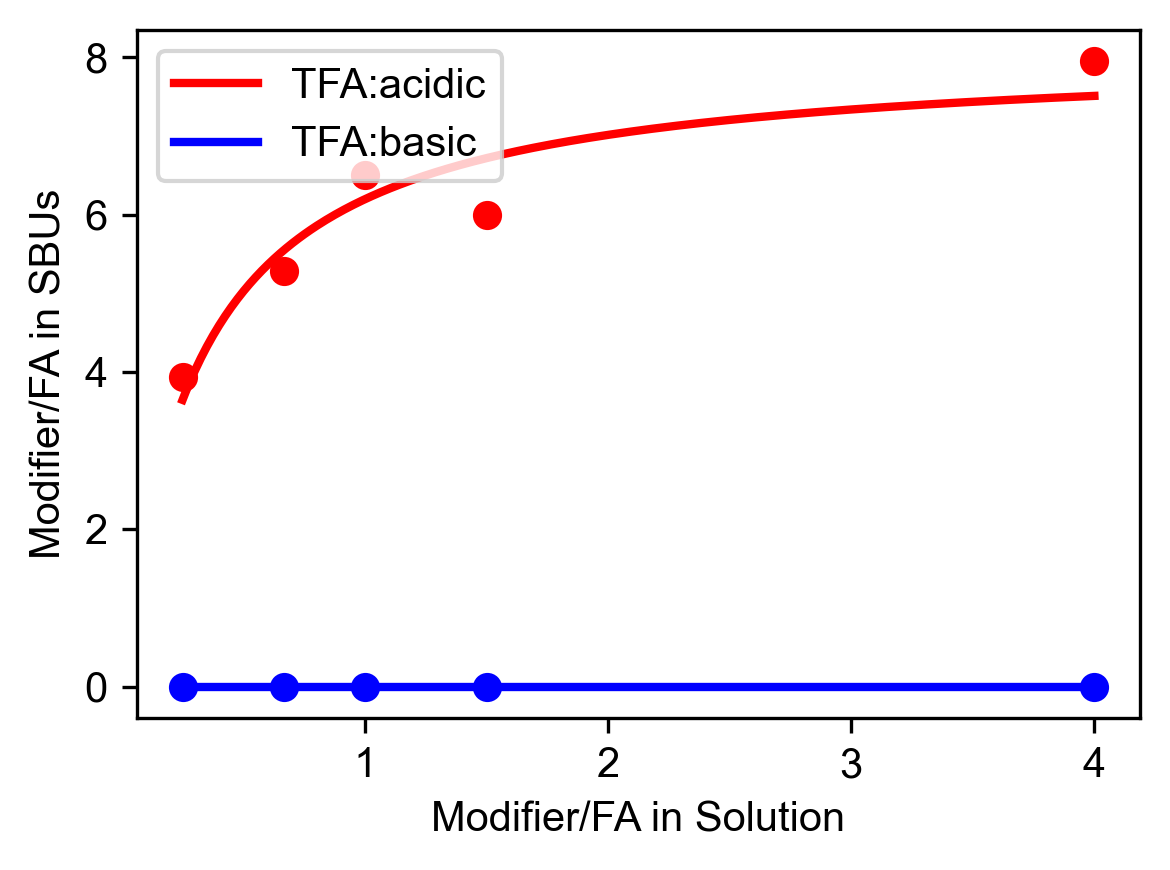

TA
TA


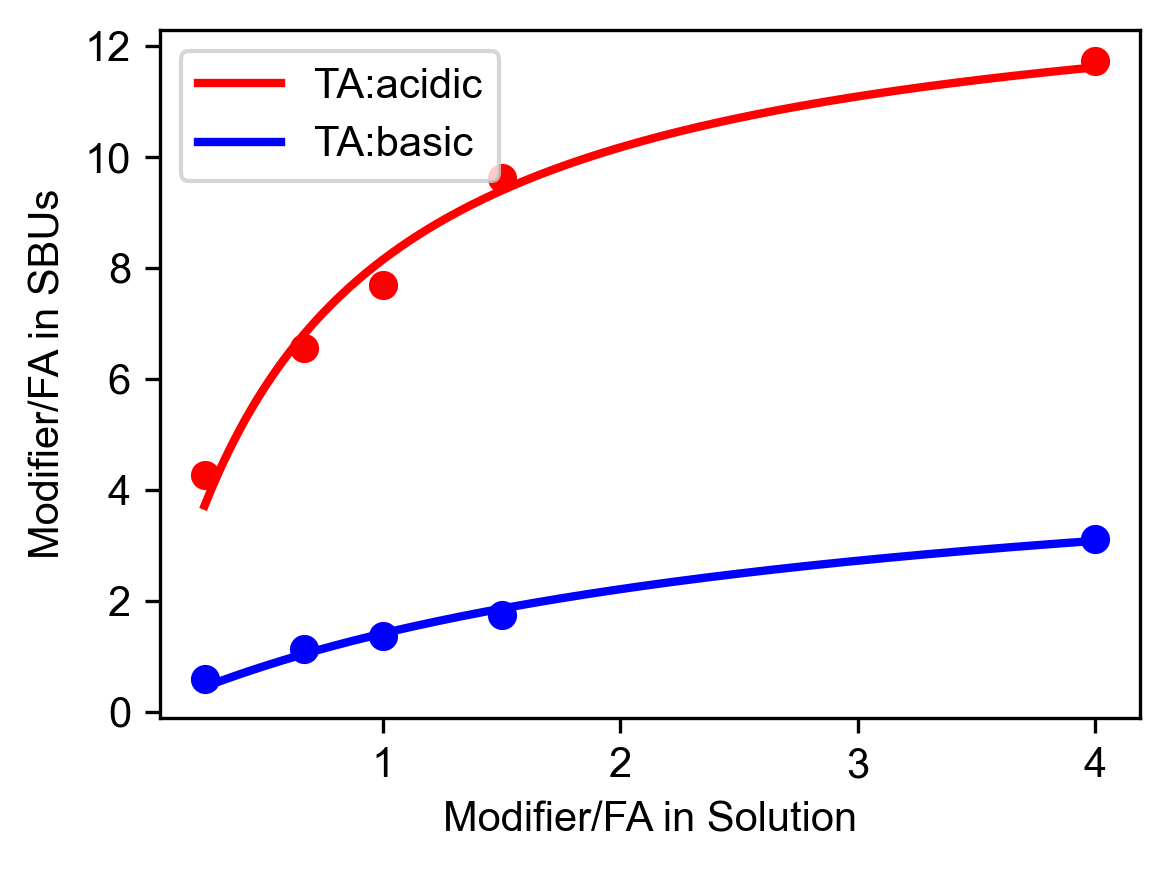

SA
SA


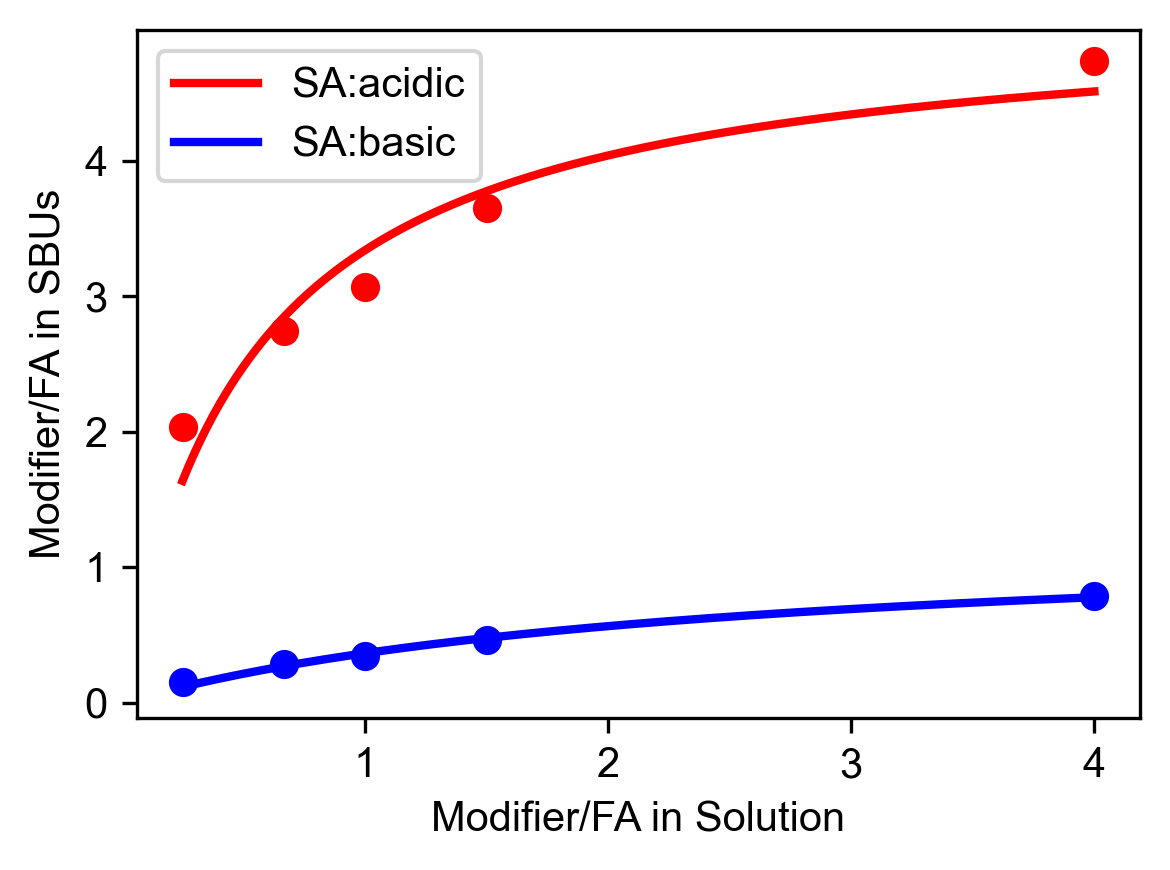

PA


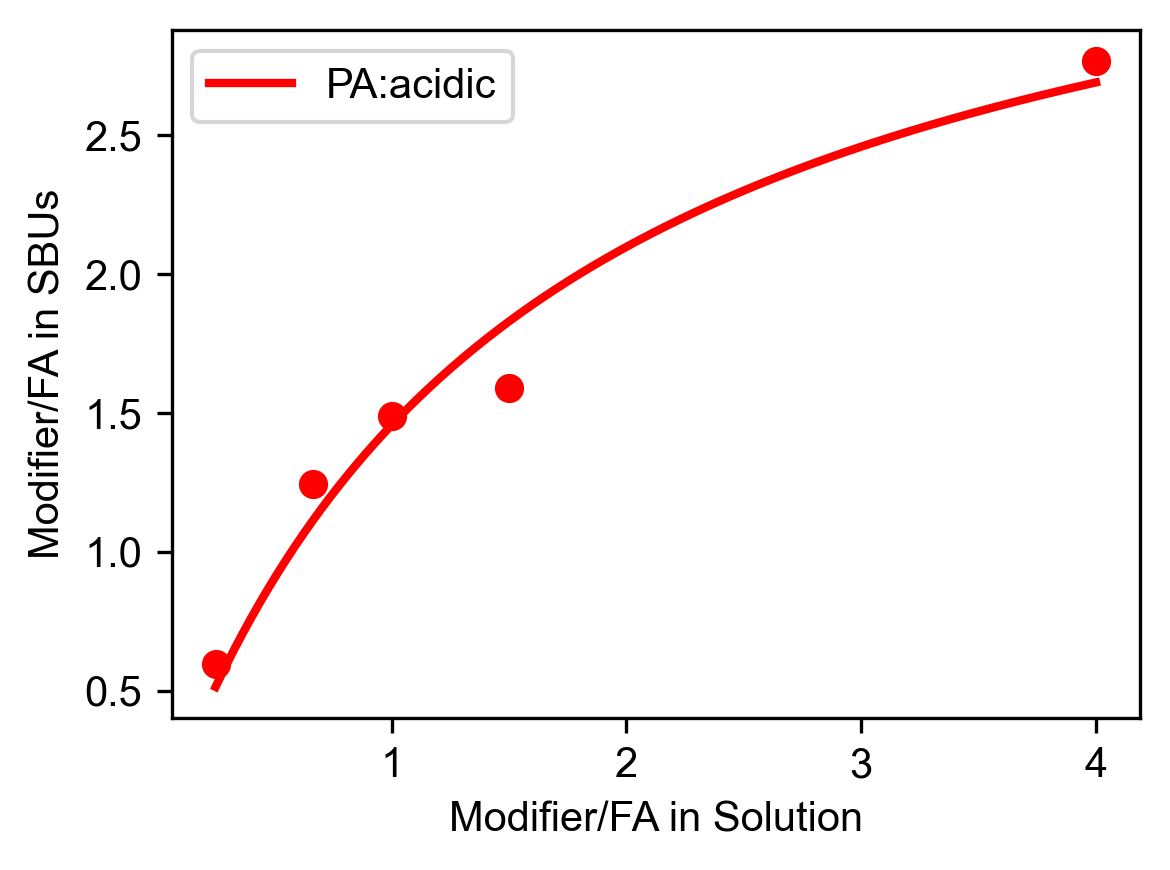

NFA
NFA


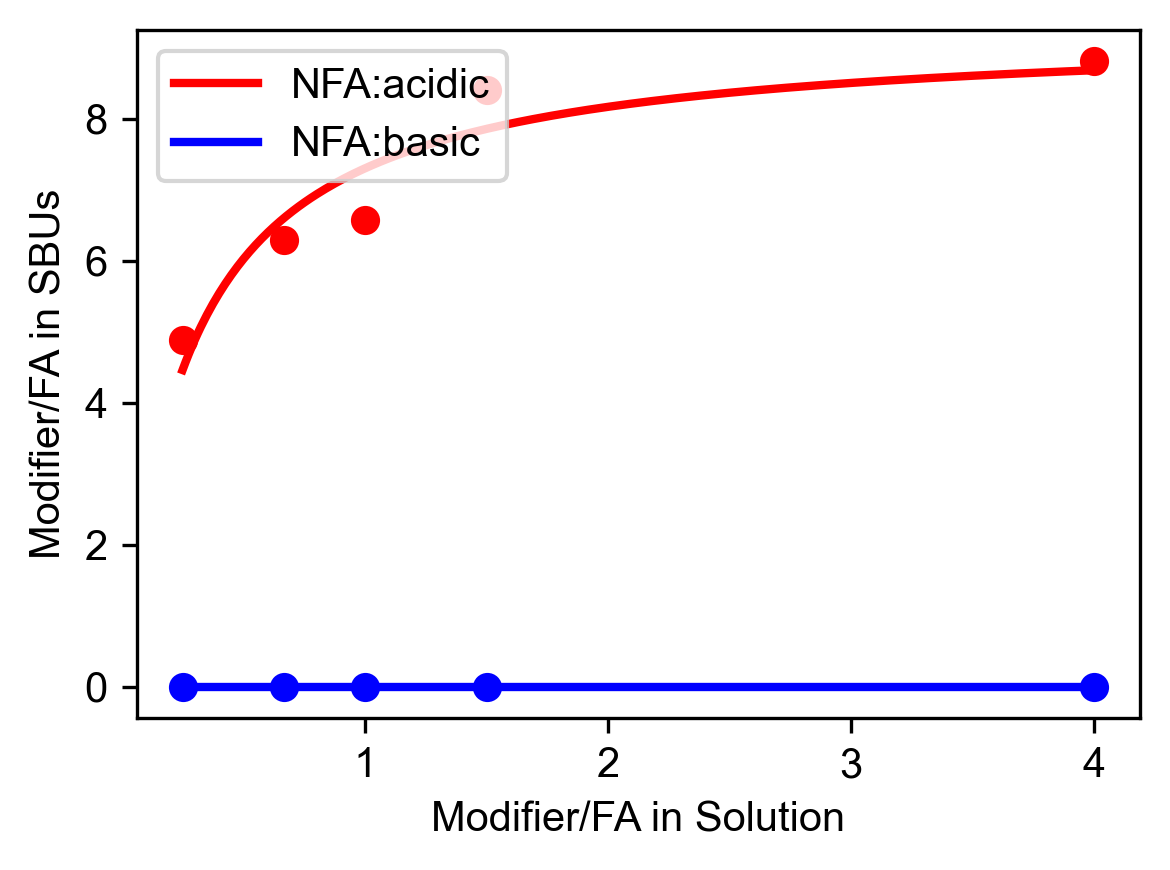

MA
MA


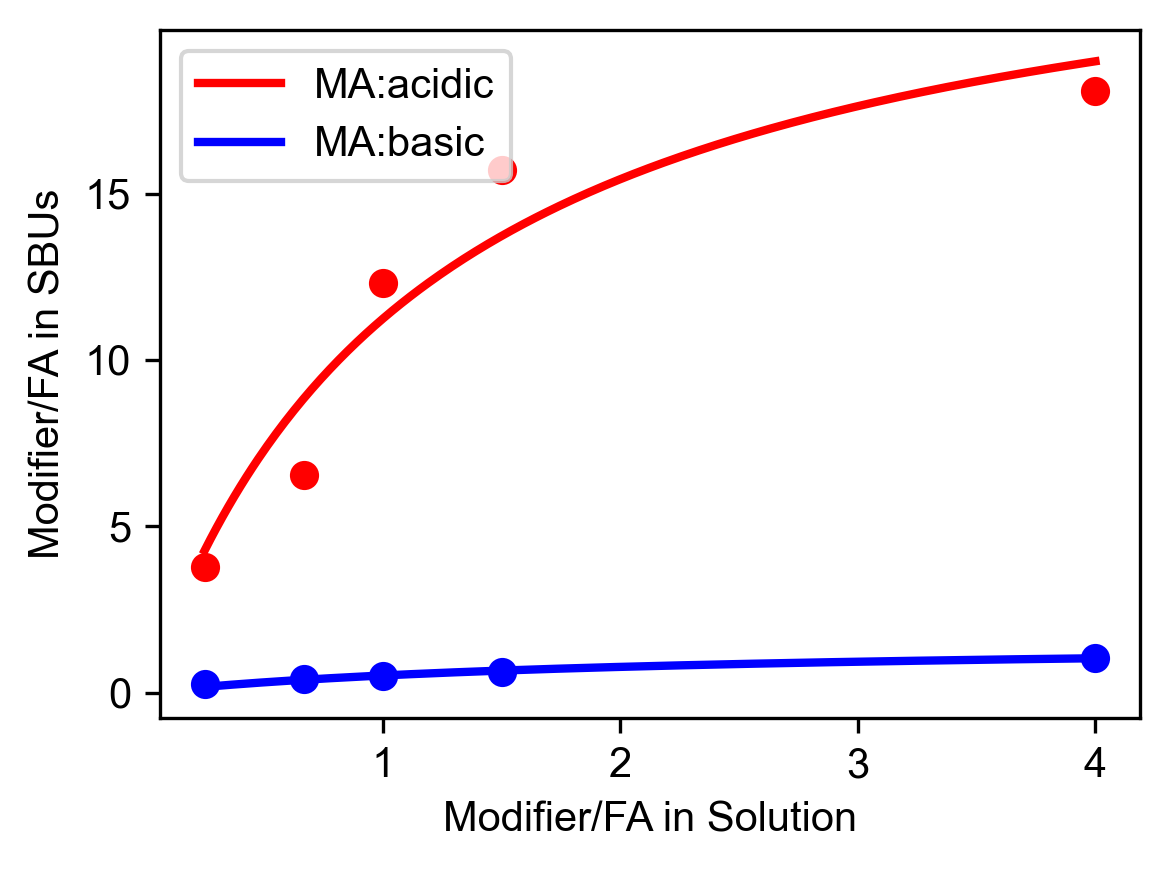

HPA
HPA


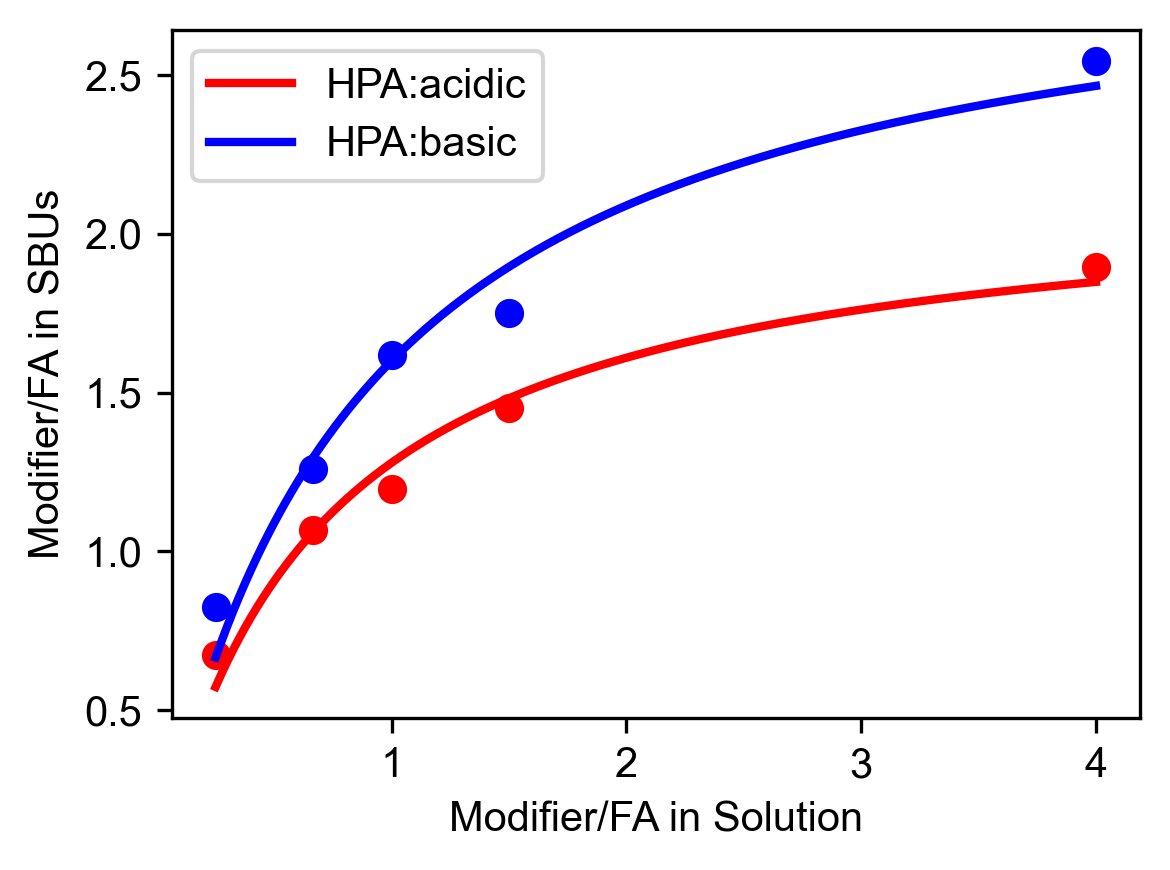

HAc
HAc


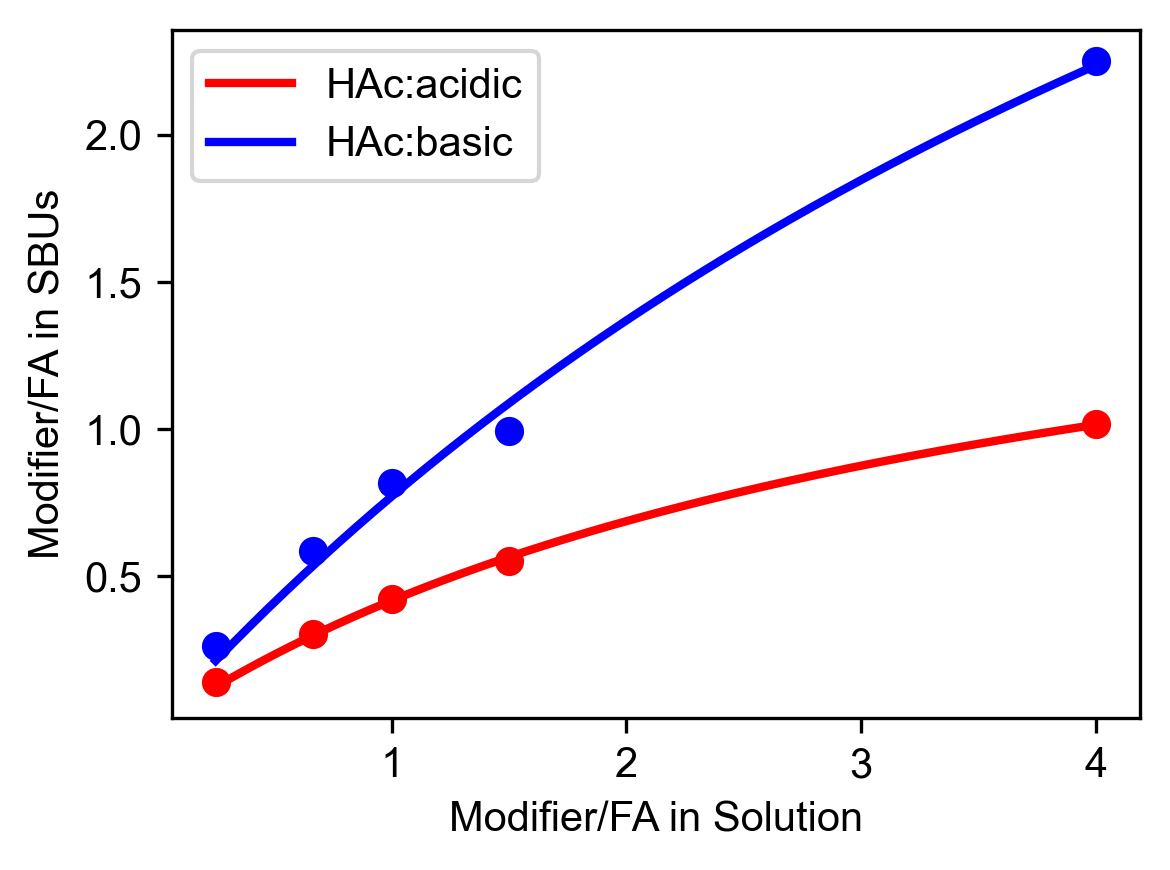

GA
GA


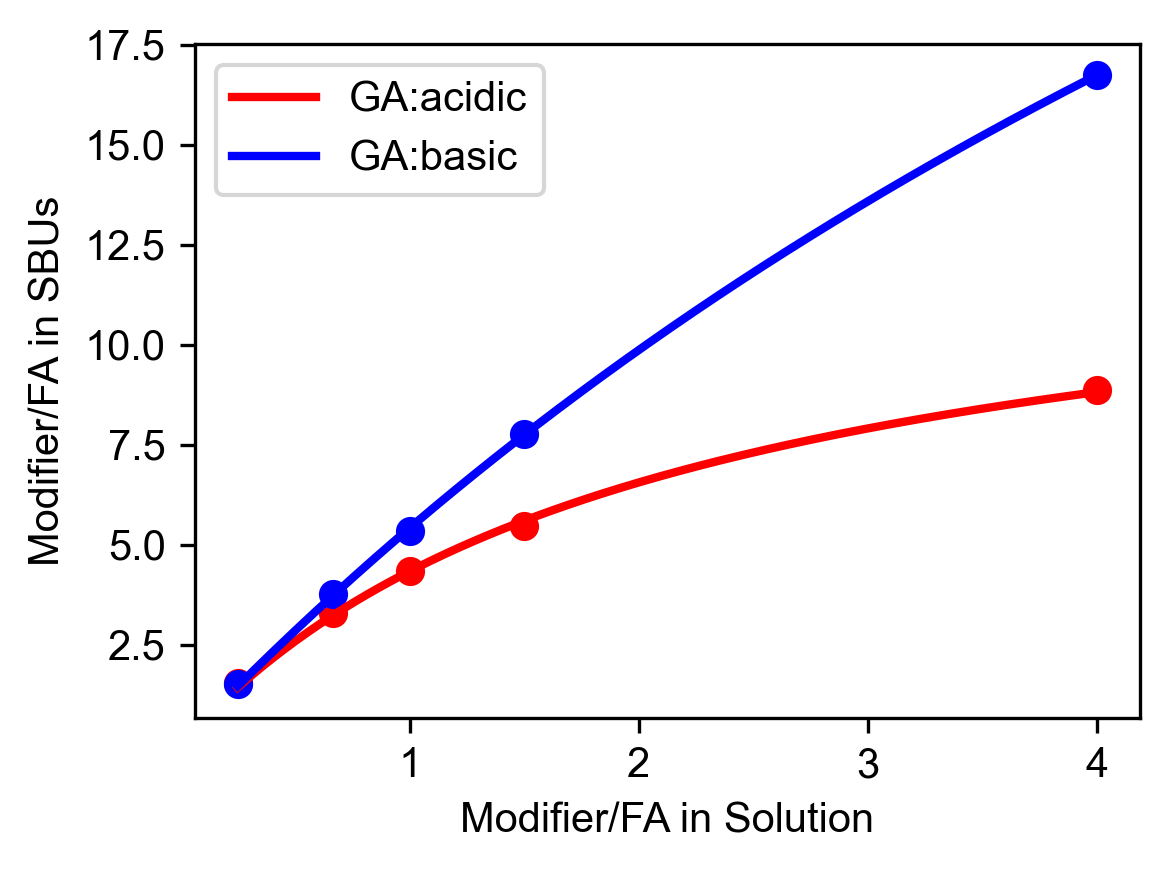

Boc-P
Boc-P


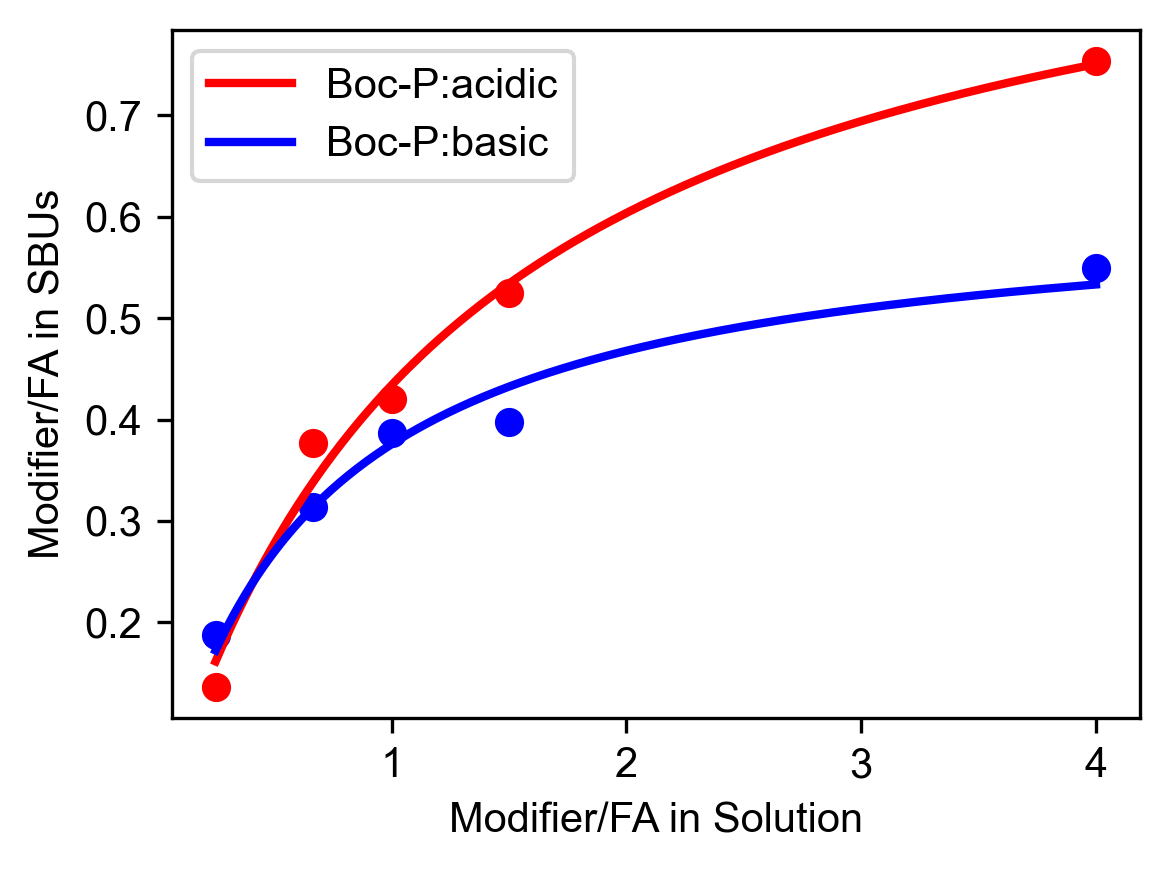

BA
BA


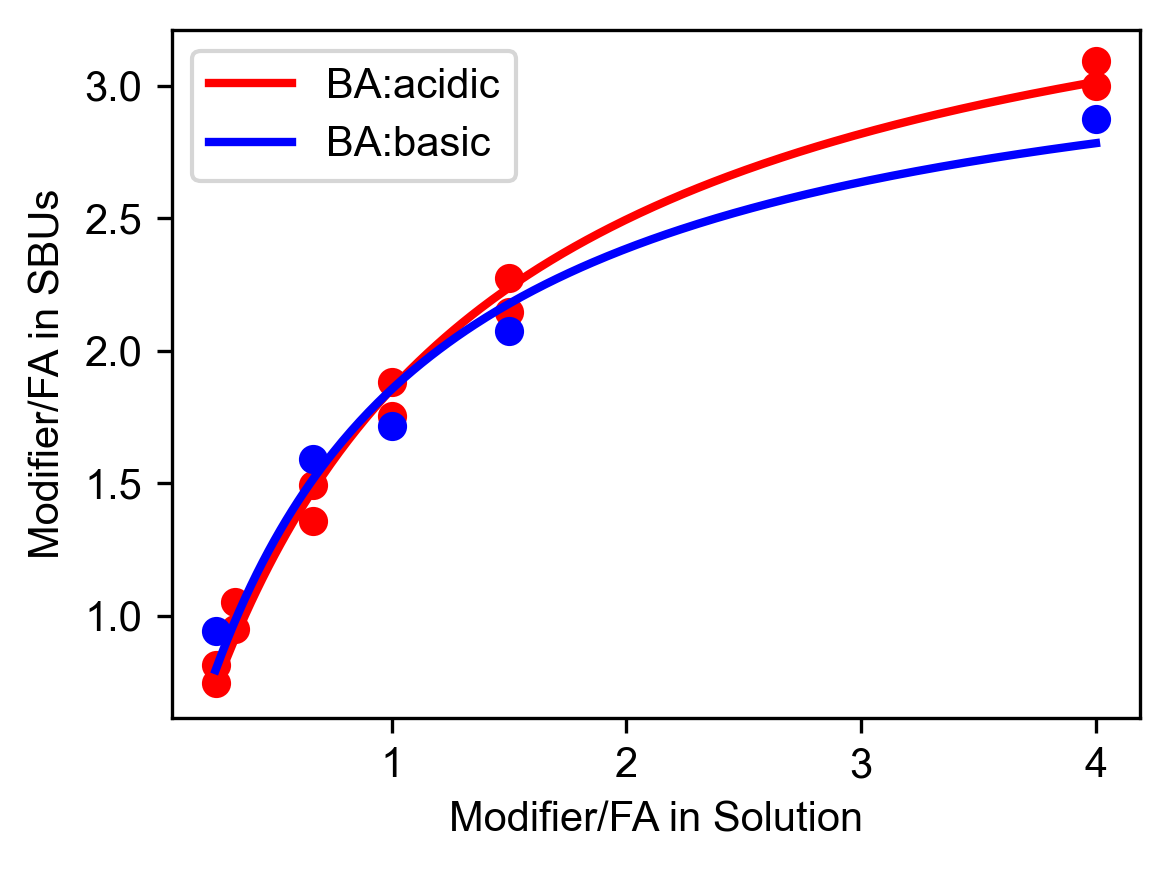

FBA
FBA


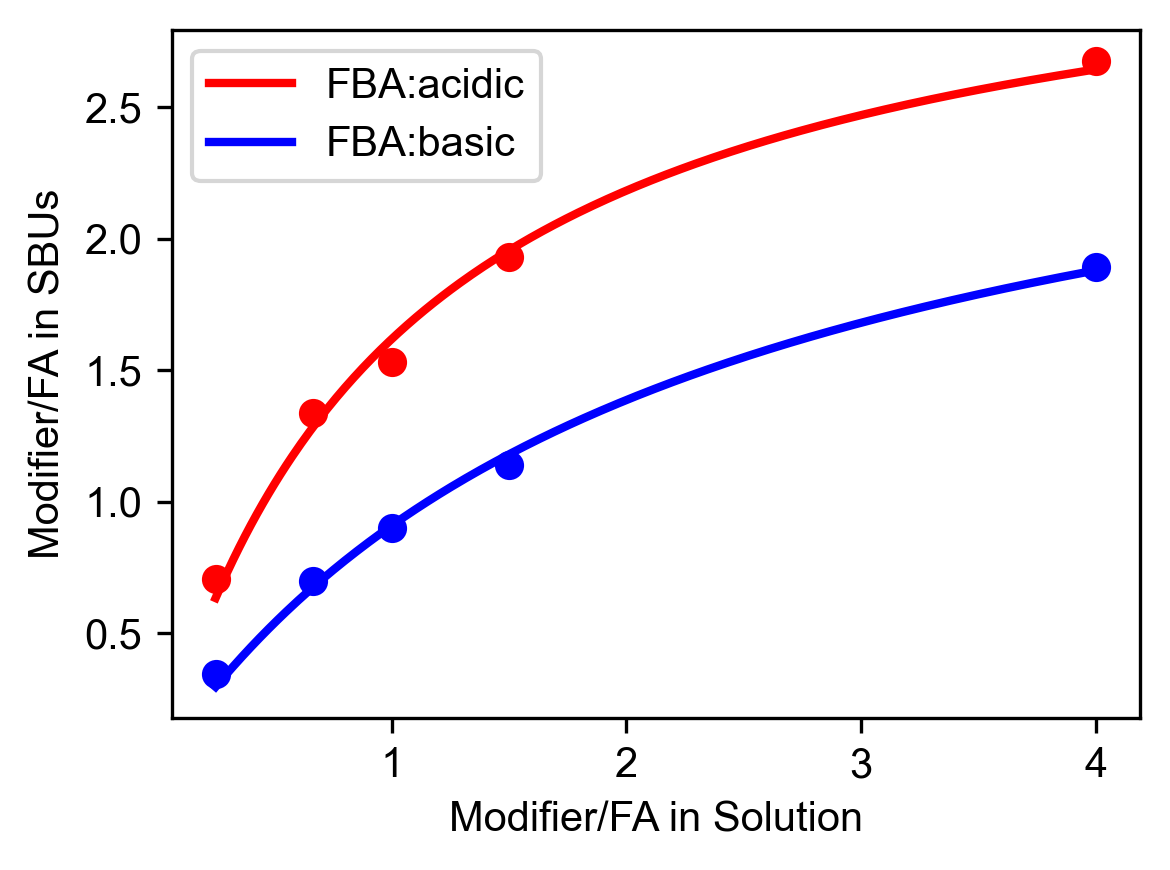

CA
CA


c:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


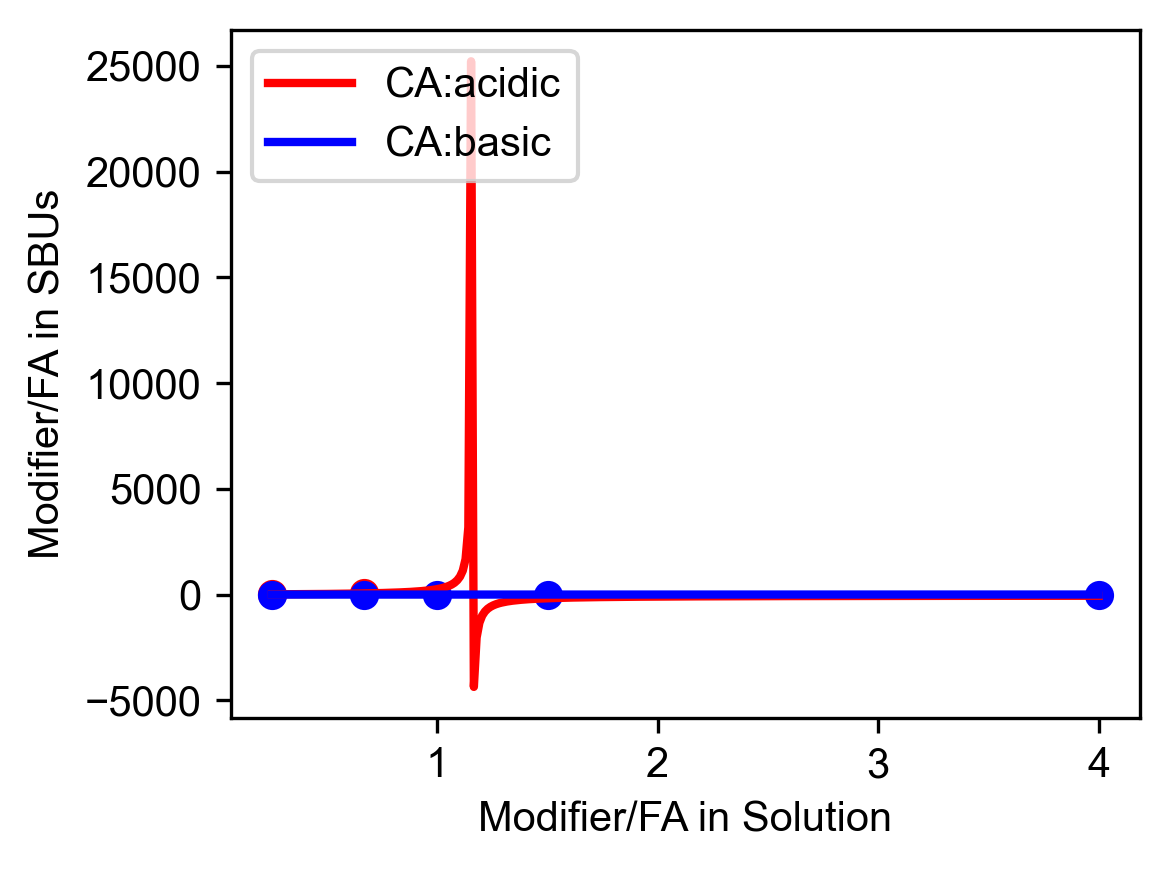

BMH


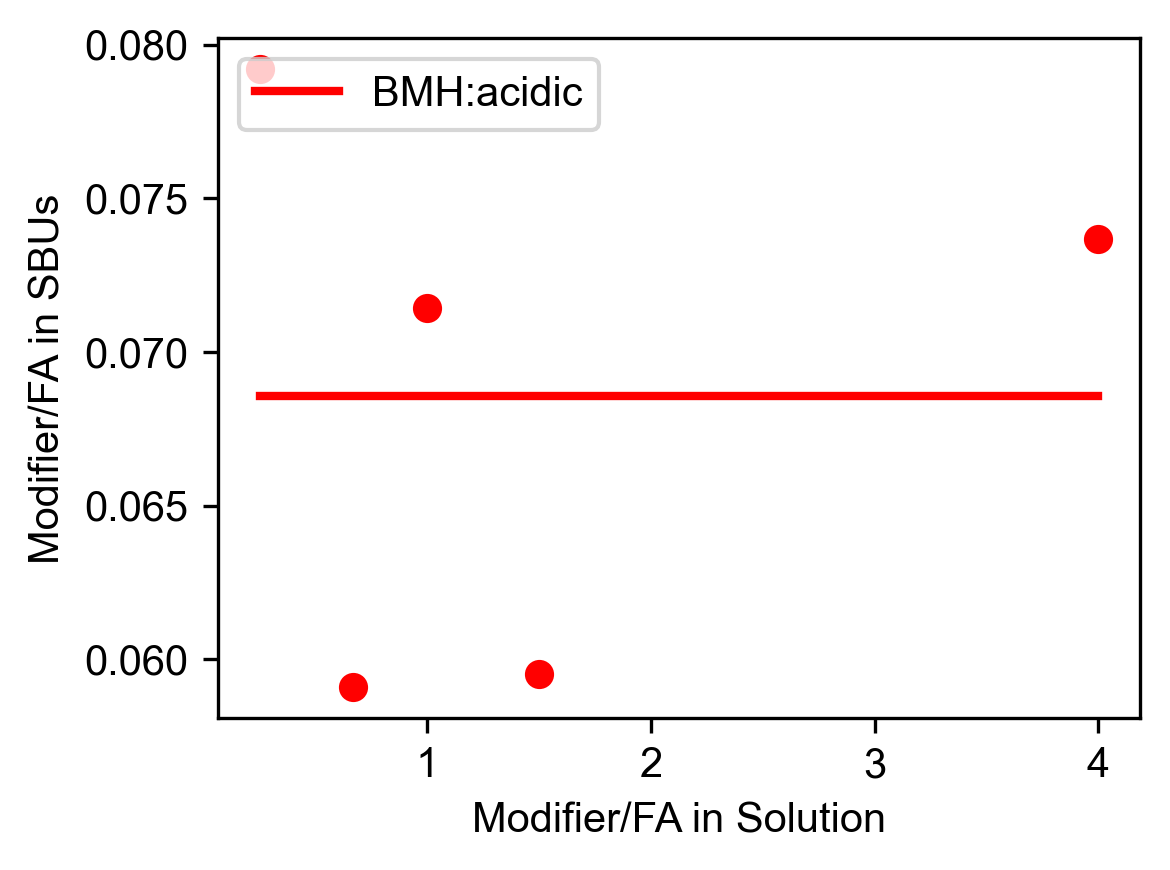

In [4]:
summary = []
color = ["red", "blue"]

for acid_temp in unique_acid:
    df_by_acid = df.loc[df["Acid"] == acid_temp]
    
    plt.rcParams['font.family'] = 'Arial'
    fig, ax = plt.subplots(figsize=(4, 3), dpi = 300)

    count = 0 
    for experiment_type in df_by_acid["Experiment"].unique():
        
        try:
            print(acid_temp)
            this_curve = df_by_acid.loc[df_by_acid["Experiment"] == experiment_type]
            
            x = this_curve["Acid conc (mM)"]/this_curve["FA conc (mM)"]
            y = this_curve["acid/SBU"]/this_curve["FA/SBU"]

            popt = fit_adsorption_ratio2(x.values,y.values)[0]
            A = (this_curve["acid/SBU"] + this_curve["FA/SBU"])*popt[0]
            B = (this_curve["acid/SBU"] + this_curve["FA/SBU"])*(1 - popt[0])
            
            # Generate smooth curve for plotting
            x_fit = np.linspace(np.nanmin(x), np.nanmax(x), 300)
            y_fit = adsorption_ratio2(x_fit, *popt)

            summary.append({
                "Acid": acid_temp,
                "Experiment": experiment_type,
                "A": np.around(A.values, 2),
                "mean_A": np.around(A.values.mean(), 2),
                "std_A": np.around(A.values.std(), 2),
                
                "B": np.around(B.values, 2),
                "mean_B": np.around(B.values.mean(), 2),
                "std_B": np.around(B.values.std(), 2),
                
                "percentage": popt[0], #f: fraction of accessible sites
                "k": popt[1] #k: equilibrium constant
            })


            # -----------------------------
            # 4.  Plot
            # -----------------------------
            ax.plot(x_fit, y_fit, linewidth=2, label= acid_temp + ":" + experiment_type, c = color[count])
            ax.scatter(x, y, c = color[count])
            ax.set_xlabel(f'Modifier/FA in Solution')
            ax.set_ylabel(f'Modifier/FA in SBUs')
            ax.legend(loc='upper left')
            count = count + 1 
        except:
            print(acid_temp, experiment_type)
            count = count + 1
            
    plt.tight_layout()
    plt.show()
summary1 = pd.DataFrame(summary)

In [5]:
display(summary1)

Acid Experiment                                                  A  \
0     TFA     acidic                     [3.03, 2.99, 2.94, 3.13, 3.08]   
1     TFA      basic                          [0.0, 0.0, 0.0, 0.0, 0.0]   
2      TA     acidic                     [2.61, 2.57, 2.59, 2.53, 2.55]   
3      TA      basic                     [2.34, 2.42, 2.49, 2.46, 2.42]   
4      SA     acidic                     [2.88, 2.88, 2.86, 2.94, 2.79]   
5      SA      basic                     [2.08, 2.11, 2.13, 2.07, 2.15]   
6      PA     acidic                      [1.78, 1.8, 1.85, 1.88, 1.69]   
7     NFA     acidic                     [3.72, 3.74, 3.56, 3.56, 3.61]   
8     NFA      basic                          [0.0, 0.0, 0.0, 0.0, 0.0]   
9      MA     acidic                       [2.2, 2.25, 2.05, 2.03, 2.3]   
10     MA      basic                      [1.7, 1.76, 1.82, 1.92, 2.05]   
11    HPA     acidic                      [2.1, 2.12, 2.14, 2.15, 2.13]   
12    HPA      basic                     [2.45, 2.56, 2.48, 2.61, 2.71]   
13    HAc     acidic                     [2.16, 2.17, 2.16, 2.18, 2.22]   
14    HAc      basic                      [2.9, 3.05, 2.96, 2.95, 3.14]   
15     GA     acidic                      [3.3, 3.25, 3.18, 3.29, 3.16]   
16     GA      basic                     [4.18, 4.14, 4.11, 4.04, 3.92]   
17  Boc-P     acidic                     [1.34, 1.56, 1.51, 1.56, 1.74]   
18  Boc-P      basic                      [1.2, 1.25, 1.17, 1.27, 1.34]   
19     BA     acidic  [2.79, 2.75, 2.74, 2.72, 2.73, 2.73, 2.72, 2.6...   
20     BA      basic                     [2.86, 2.89, 2.89, 2.87, 2.87]   
21    FBA     acidic                       [2.6, 2.57, 2.57, 2.56, 2.5]   
22    FBA      basic                     [2.63, 2.71, 2.66, 2.71, 2.73]   
23     CA     acidic                      [5.74, 5.27, 4.8, 4.57, 3.22]   
24     CA      basic                       [0.27, 0.6, 0.7, 0.99, 1.03]   
25    BMH     acidic                     [0.13, 0.11, 0.14, 0.15, 0.14]   

    mean_A  std_A                                                  B  mean_B  \
0     3.03   0.07                     [0.37, 0.37, 0.36, 0.39, 0.38]    0.38   
1     0.00   0.00                      [3.46, 3.6, 3.58, 3.64, 3.74]    3.60   
2     2.57   0.03                     [0.19, 0.19, 0.19, 0.19, 0.19]    0.19   
3     2.43   0.05                     [0.46, 0.48, 0.49, 0.48, 0.48]    0.48   
4     2.87   0.05                     [0.56, 0.56, 0.56, 0.58, 0.55]    0.56   
5     2.11   0.03                      [1.67, 1.69, 1.7, 1.66, 1.72]    1.69   
6     1.80   0.06                      [0.48, 0.48, 0.49, 0.5, 0.45]    0.48   
7     3.64   0.08                       [0.4, 0.4, 0.38, 0.38, 0.39]    0.39   
8     0.00   0.00                        [3.42, 3.6, 3.5, 3.58, 3.6]    3.54   
9     2.16   0.11                     [0.09, 0.09, 0.08, 0.08, 0.09]    0.09   
10    1.85   0.12                     [1.09, 1.13, 1.17, 1.24, 1.32]    1.19   
11    2.13   0.02                     [0.97, 0.97, 0.98, 0.99, 0.98]    0.98   
12    2.56   0.09                      [0.81, 0.85, 0.82, 0.87, 0.9]    0.85   
13    2.18   0.02                     [1.11, 1.12, 1.11, 1.13, 1.14]    1.12   
14    3.00   0.09                      [0.48, 0.5, 0.49, 0.48, 0.52]    0.49   
15    3.24   0.06                     [0.25, 0.24, 0.24, 0.24, 0.24]    0.24   
16    4.08   0.09                     [0.08, 0.07, 0.07, 0.07, 0.07]    0.07   
17    1.55   0.13                     [1.36, 1.58, 1.53, 1.58, 1.76]    1.56   
18    1.24   0.06                     [1.93, 2.02, 1.88, 2.04, 2.15]    2.01   
19    2.73   0.03  [0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.7...    0.72   
20    2.88   0.01                     [0.86, 0.86, 0.86, 0.86, 0.86]    0.86   
21    2.56   0.04                     [0.78, 0.77, 0.77, 0.76, 0.74]    0.76   
22    2.69   0.04                      [0.9, 0.93, 0.91, 0.93, 0.93]    0.92   
23    4.72   0.85                [-0.14, -0.13, -0.12, -0.1

In [6]:
# Save the summary DataFrame to a CSV file
summary1.to_csv('adsorption_summary.csv', index=False)
print(f"Summary data saved to 'adsorption_summary.csv'")

Summary data saved to 'adsorption_summary.csv'


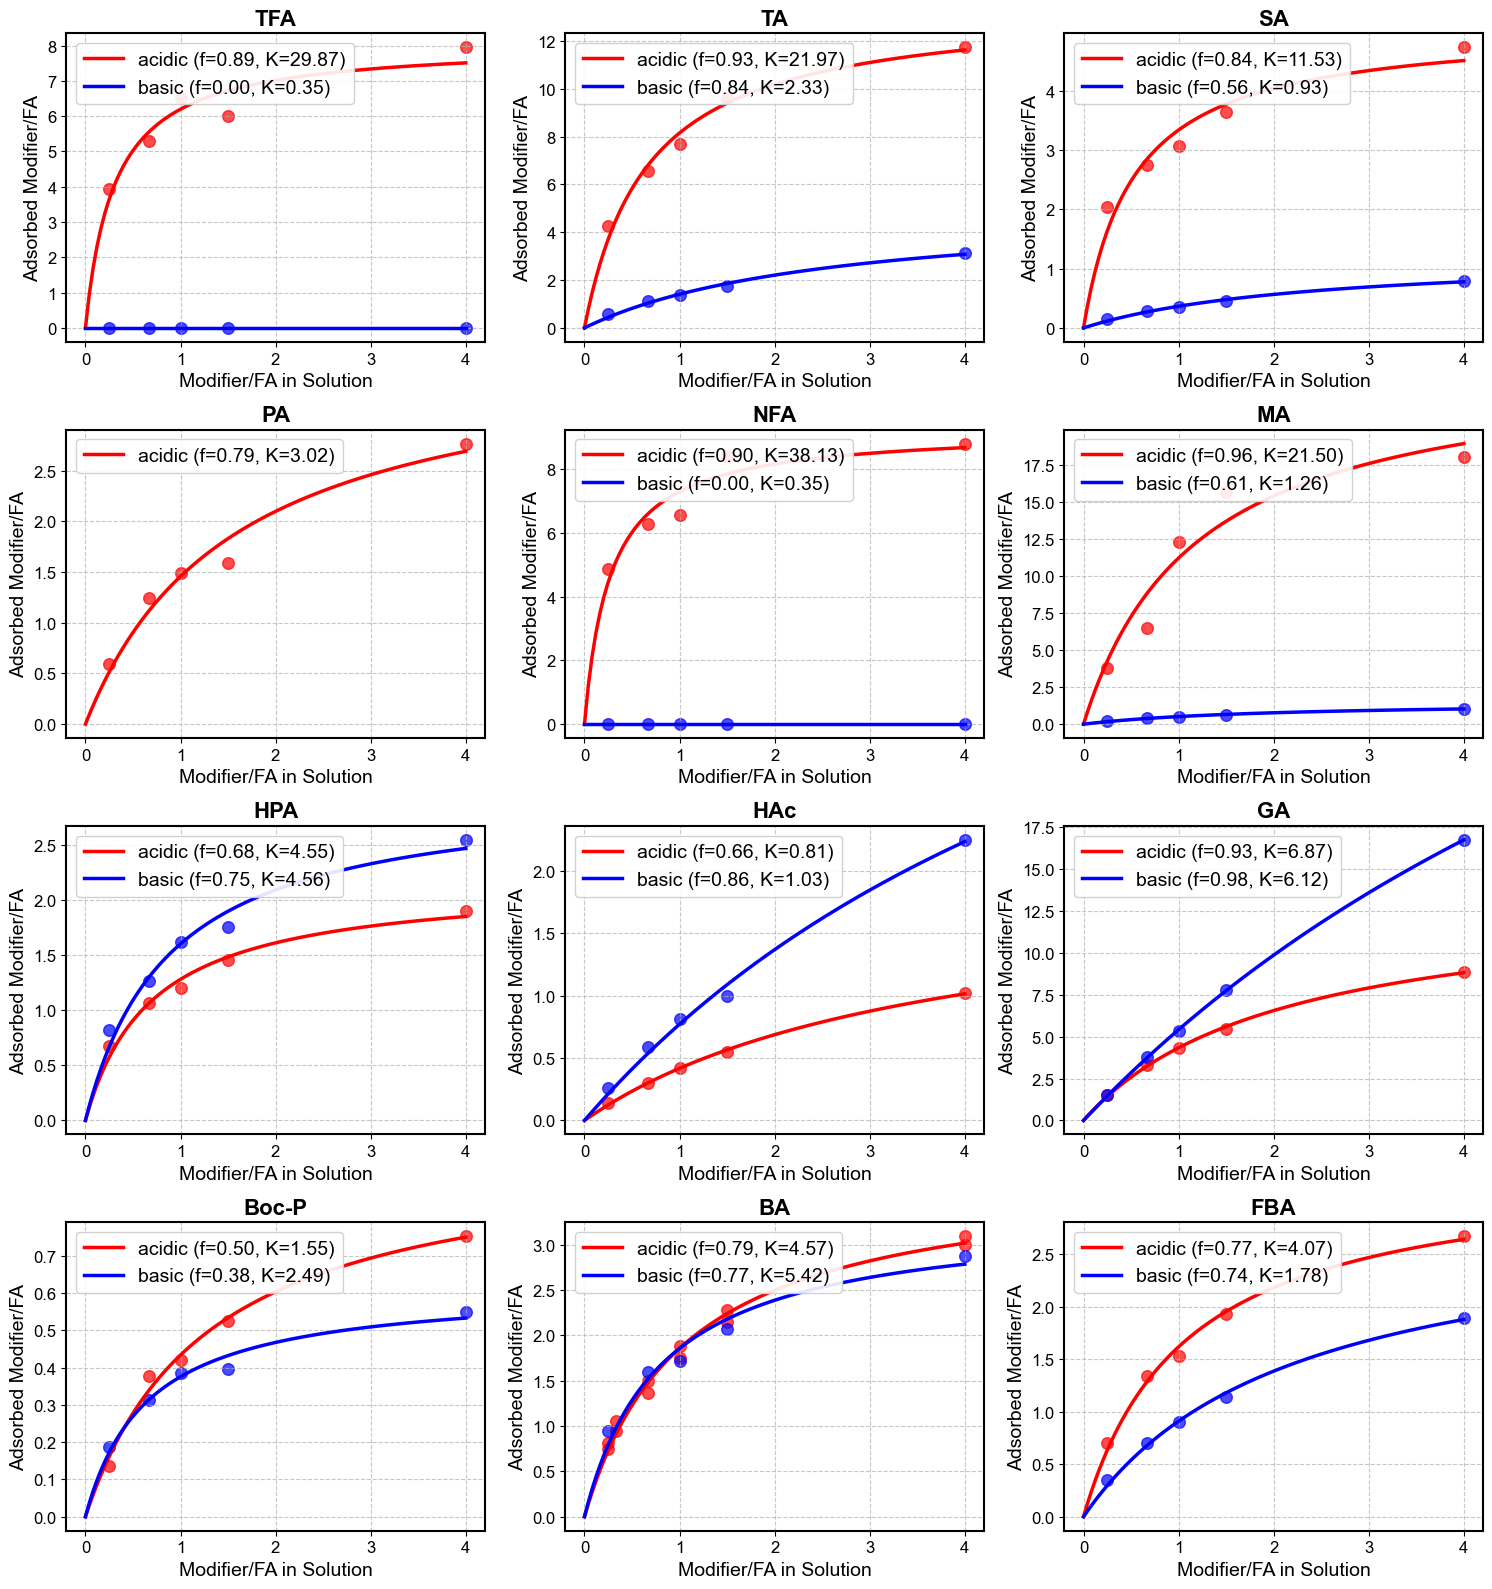

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Create a figure with a more compact layout - using less width for the subplots
fig = plt.figure(figsize=(30, 16))
# Create a grid with 4 rows and 6 columns, but only use the left half for these plots
# This leaves the right half of the figure available for other plots
gs = GridSpec(4, 6, figure=fig)

# Get unique acids excluding 'CA'
acids = df[df['Acid'] != 'CA']['Acid'].unique()

# Create a color map for consistent coloring
color_map = plt.cm.tab10
experiment_colors = {'acidic': 'red', 'basic': 'blue'}

# Set font sizes for publication quality
TITLE_SIZE = 16
LABEL_SIZE = 14
TICK_SIZE = 12
LEGEND_SIZE = 14

# Function to plot the fitting curve
def plot_acid_data(ax, acid_name):
    acid_data = summary1[summary1['Acid'] == acid_name]
    
    for idx, row in acid_data.iterrows():
        experiment_type = row['Experiment']
        f = row['percentage']  # fraction of accessible sites
        k = row['k']  # equilibrium constant
        
        # Generate x values for the fitting curve
        x_fit = np.linspace(0, 4., 100)
        
        # Calculate y values using adsorption_ratio2 function
        y_fit = adsorption_ratio2(x_fit, f, k)
        
        # Get original data points
        # Get the real data from df for this acid and experiment type
        acid_df = df[(df['Acid'] == acid_name) & (df['Experiment'] == experiment_type)]
        x_points = acid_df['Acid conc (mM)'].values/acid_df['FA conc (mM)'].values  # Actual x values from the data
        y_points = acid_df['acid/SBU'].values/acid_df['FA/SBU'].values  # Actual y values from the data
        
        # Plot the fitting curve and scatter points
        ax.plot(x_fit, y_fit, linewidth=2.5, label=f"{experiment_type} (f={f:.2f}, K={k:.2f})", 
                color=experiment_colors[experiment_type])
        ax.scatter(x_points, y_points, color=experiment_colors[experiment_type], alpha=0.7, s=70)
    
    ax.set_title(f"{acid_name}", fontsize=TITLE_SIZE, fontweight='bold')
    ax.set_xlabel('Modifier/FA in Solution', fontsize=LABEL_SIZE)
    ax.set_ylabel('Adsorbed Modifier/FA', fontsize=LABEL_SIZE)
    ax.tick_params(axis='both', which='major', labelsize=TICK_SIZE)
    ax.legend(loc='upper left', fontsize=LEGEND_SIZE, framealpha=0.9)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add a box around the plot for better definition
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

# Plot each acid in its own subplot
for i, acid in enumerate(acids[:12]):  # Limit to 12 acids to fit in the grid
    row = i // 3
    col = i % 3
    # Use only the left half of the grid (columns 0, 1, 2)
    ax = fig.add_subplot(gs[row, col])
    plot_acid_data(ax, acid)

plt.tight_layout()
plt.show()


2. Fit the two independent curves

In [8]:
import numpy as np
from scipy.optimize import curve_fit

# ----------------------------------------------------------------------
# vectorised model for BOTH curves
# ----------------------------------------------------------------------
def _two_curve_model(xcat, n1, A, B, k):
    """
    xcat : concatenated x-data  (len = n1 + n2)
    n1   : length of first data block
    A, B, k : shared parameters
    """
    x1, x2 = xcat[:n1], xcat[n1:]

    ycat = np.empty_like(xcat, dtype=float)
    ycat[:n1]  = A / (k * x1 + 1) + B               # curve 1
    ycat[n1:]  = (k * x2 / (k * x2 + 1)) * A        # curve 2
    return ycat

# ----------------------------------------------------------------------
# public helper
# ----------------------------------------------------------------------
def fit_two_curves_shared(x1, y1, x2, y2, p0=(1., 0., 1.),
                          bounds=([0., 0., 0.], [np.inf, np.inf, np.inf])):
    """
    Simultaneous least‑squares fit with shared (A, B, k).

    Parameters
    ----------
    x1, y1 : 1‑D array‑like     data for curve 1
    x2, y2 : 1‑D array‑like     data for curve 2
    p0     : tuple              initial (A, B, k)
    bounds : 2‑tuple/list       ([Amin, Bmin, kmin], [Amax, Bmax, kmax])

    Returns
    -------
    popt : ndarray   best‑fit [A, B, k]
    pcov : ndarray   covariance matrix
    """

    # ­­­­­‑‑ clean NaN / Inf
    m1 = np.isfinite(x1) & np.isfinite(y1)
    m2 = np.isfinite(x2) & np.isfinite(y2)
    if m1.sum() + m2.sum() < 3:
        raise ValueError("Need at least three finite points total.")

    x1c, y1c = np.asarray(x1)[m1], np.asarray(y1)[m1]
    x2c, y2c = np.asarray(x2)[m2], np.asarray(y2)[m2]

    # ­­­­­‑‑ concatenate
    xcat  = np.concatenate([x1c,  x2c])
    ycat  = np.concatenate([y1c,  y2c])
    n1    = len(x1c)            # border index for the model

    # ­­­­­‑‑ wrapper with fixed n1 for curve_fit
    model = lambda x, A, B, k: _two_curve_model(x, n1, A, B, k)

    popt, pcov = curve_fit(model, xcat, ycat, p0=p0,
                           bounds=bounds, maxfev=5000)
    return popt, pcov


In [9]:
popt, pcov = fit_two_curves_shared(x, this_curve["FA/SBU"].values, x, this_curve["acid/SBU"].values,
                                   p0=(2., 0.5, 10.),
                                   bounds=([0, 0, 0], [6, 6, np.inf]))
print("A, B, k  =", popt)

A, B, k  = [0.24137569 1.86778424 1.18220252]


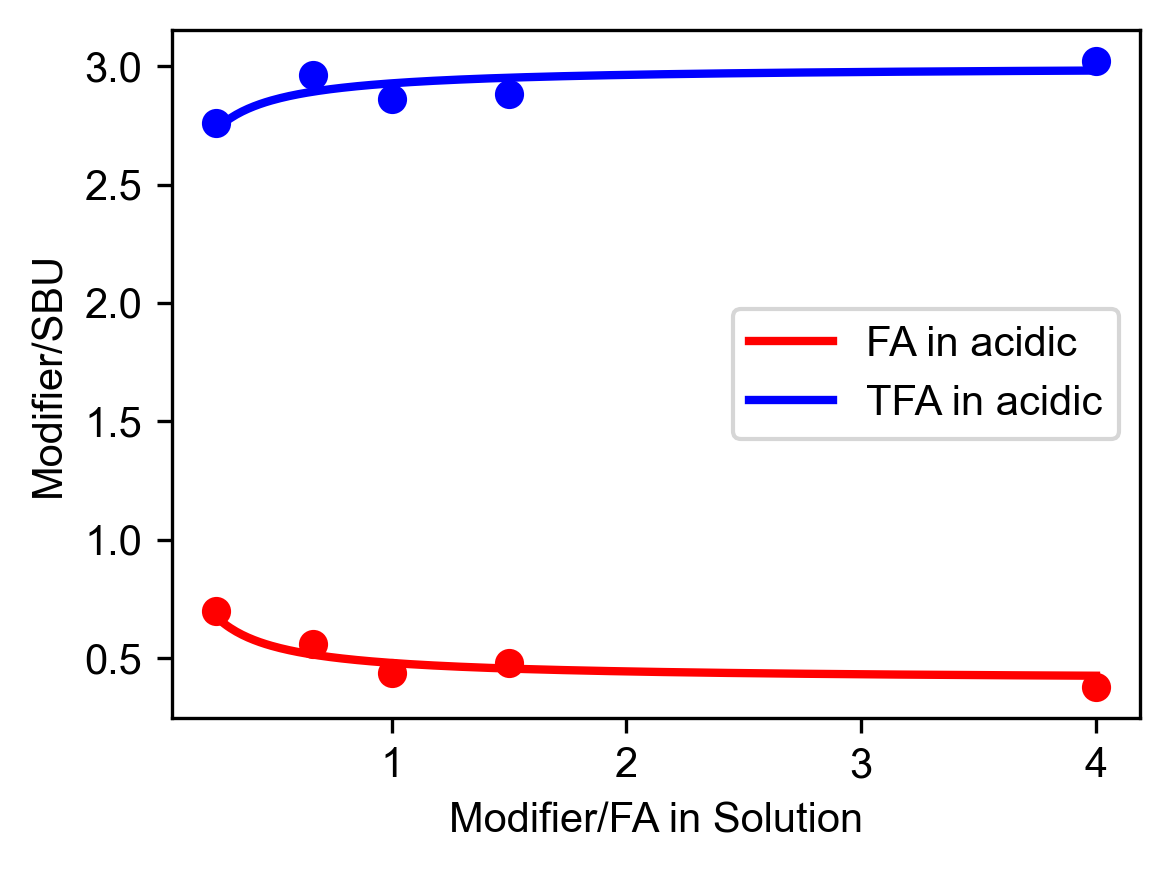

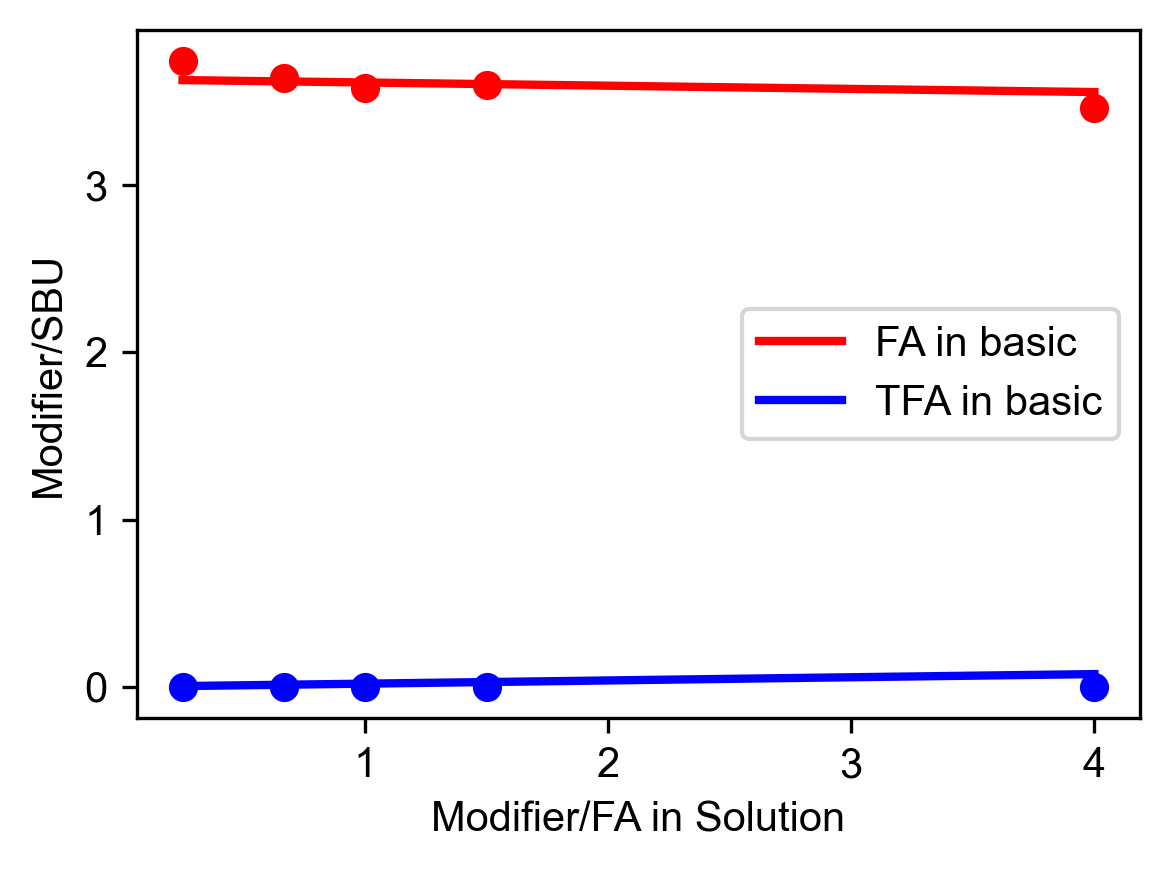

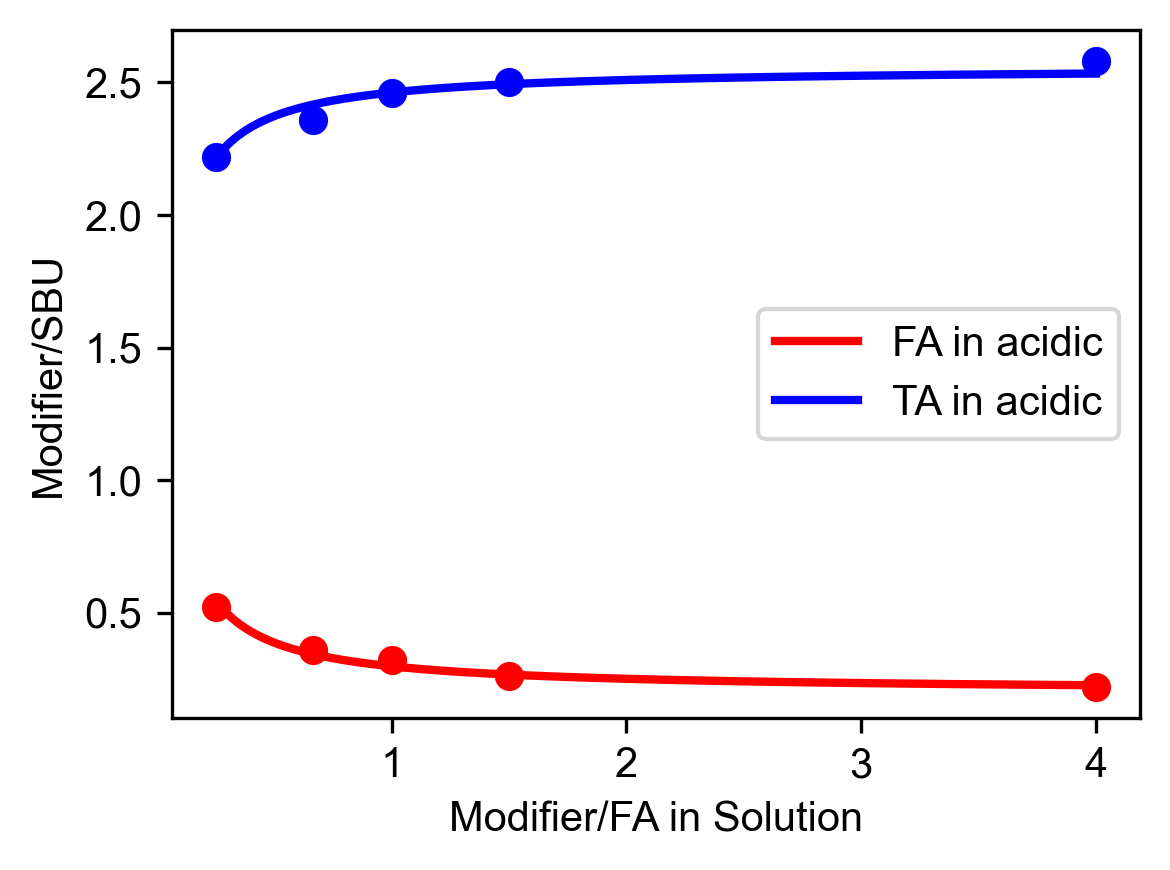

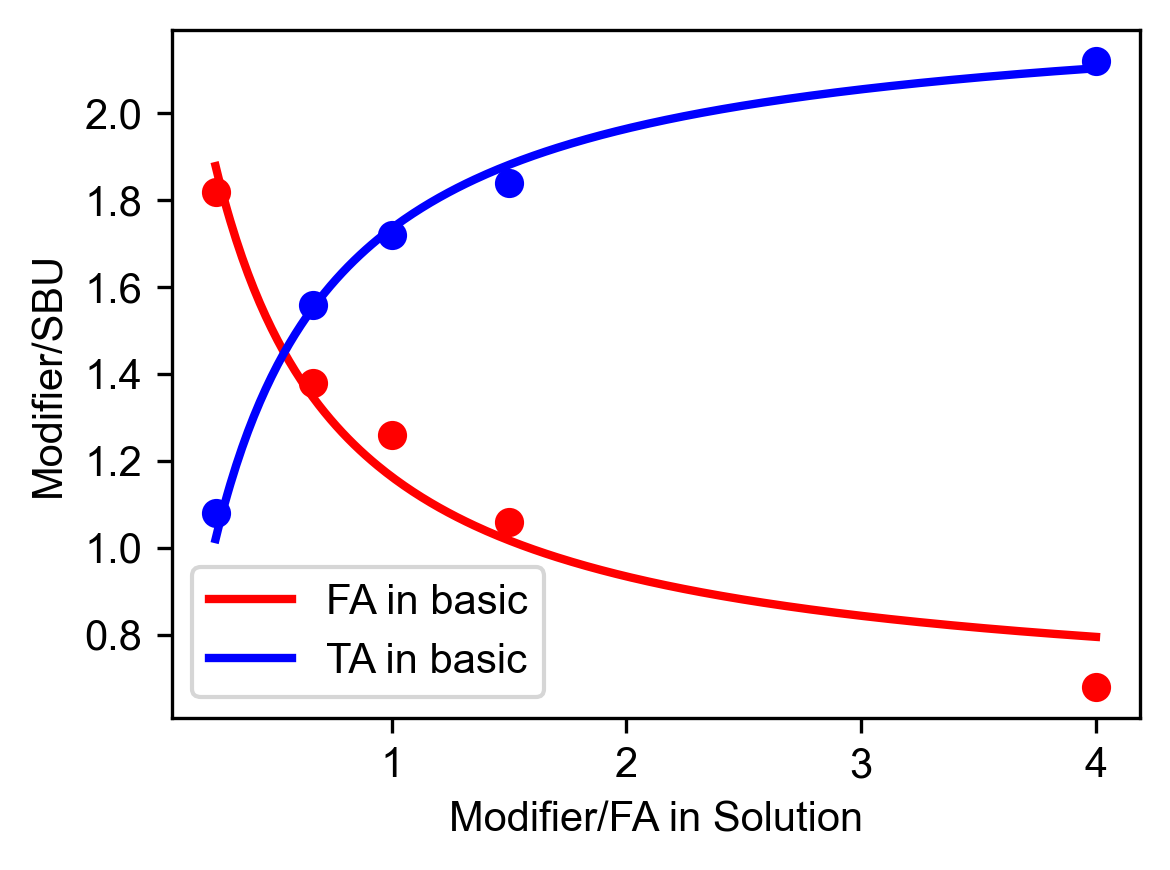

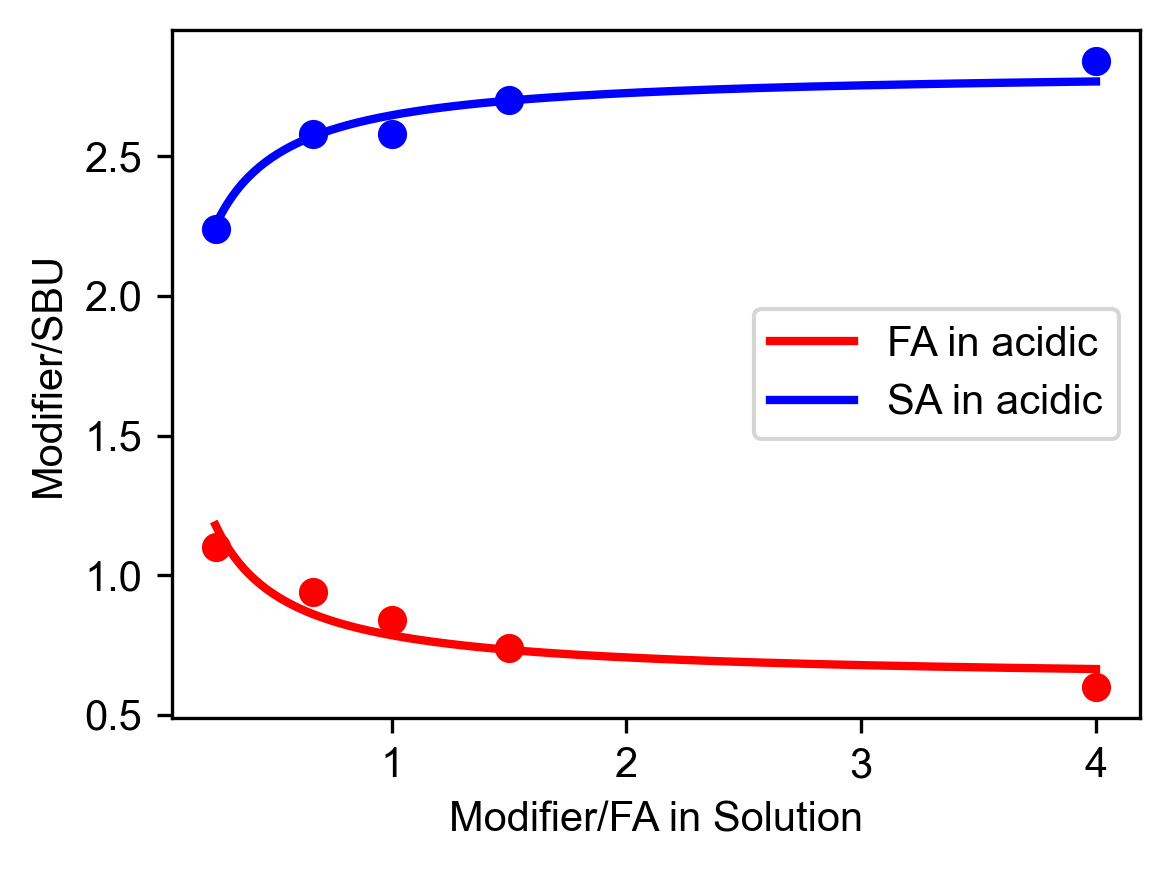

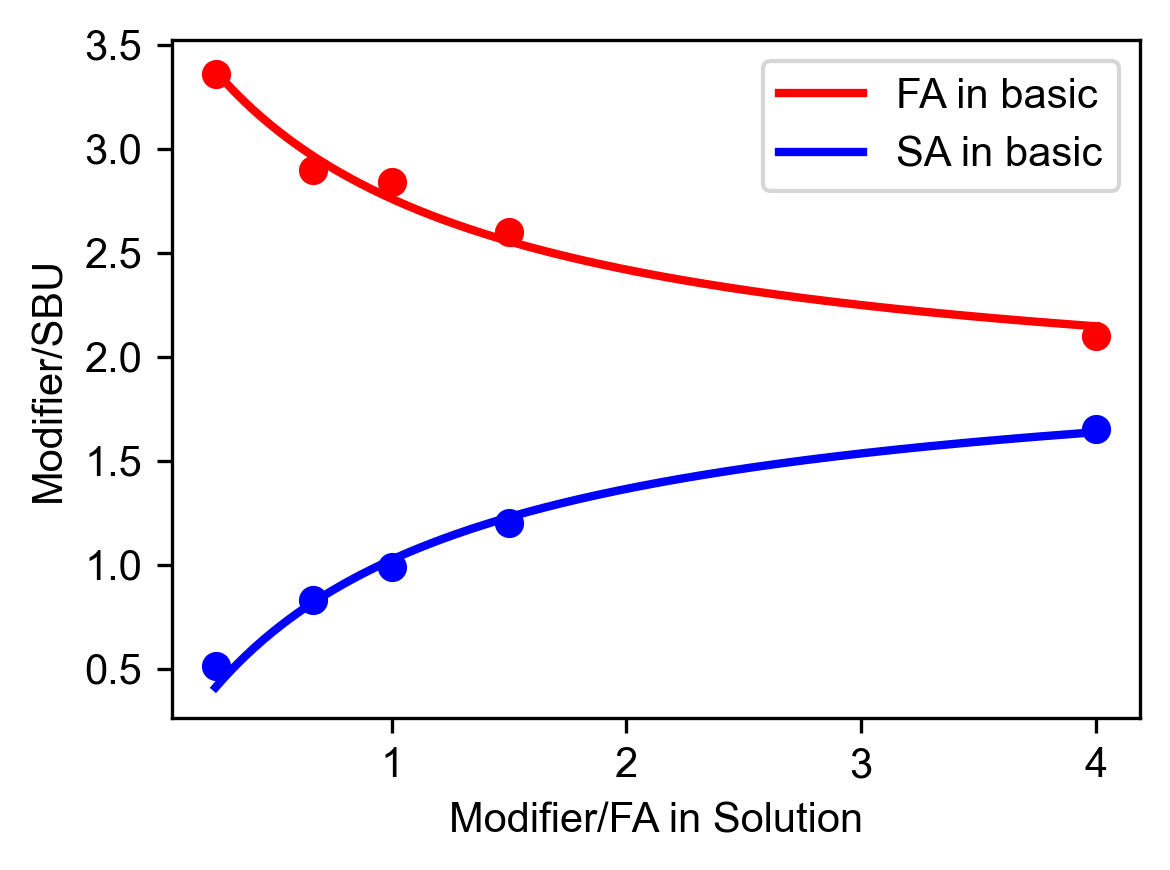

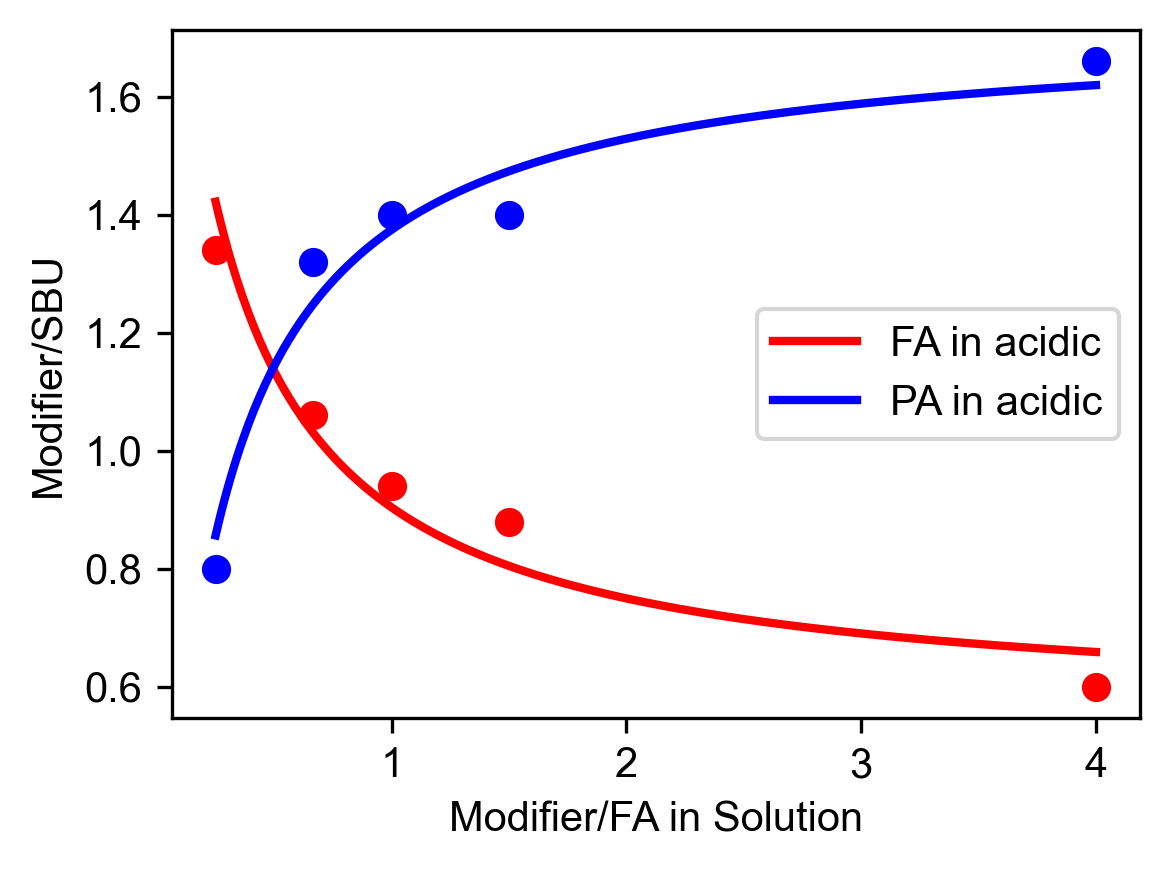

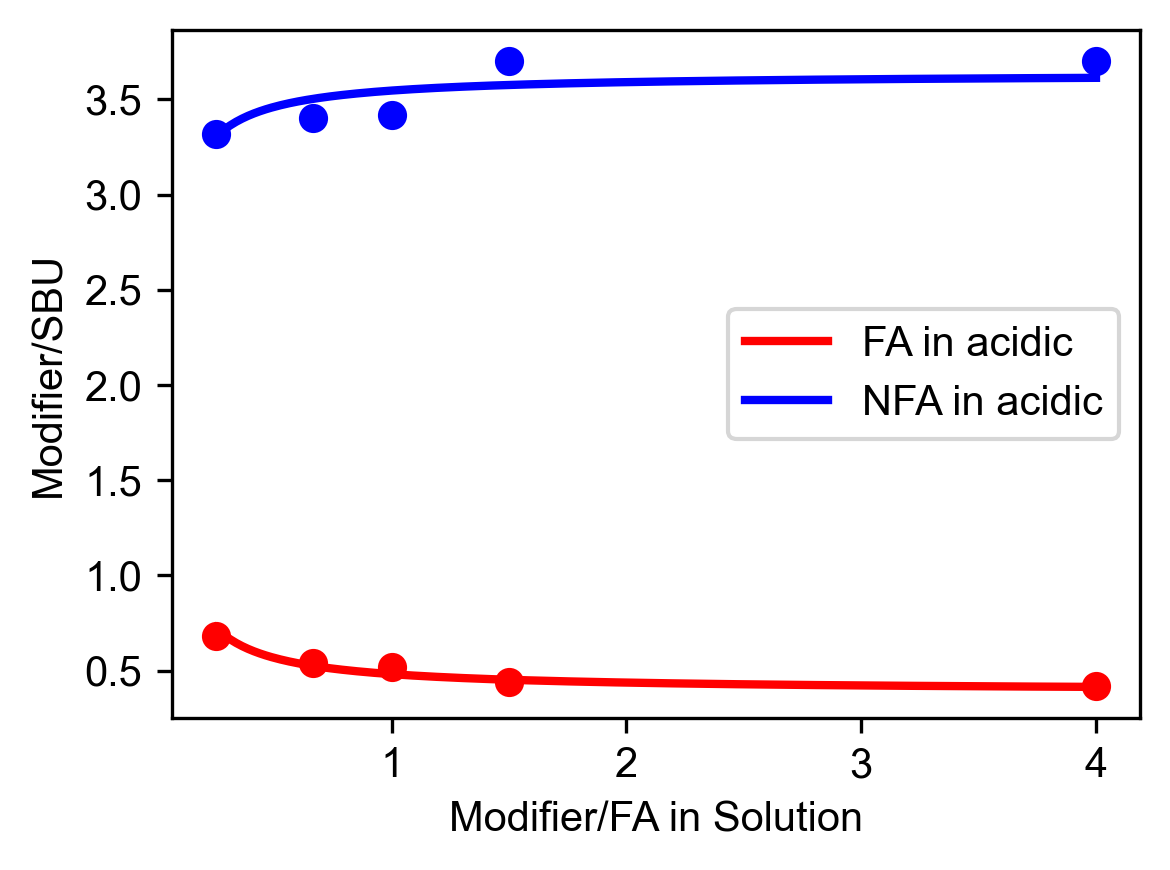

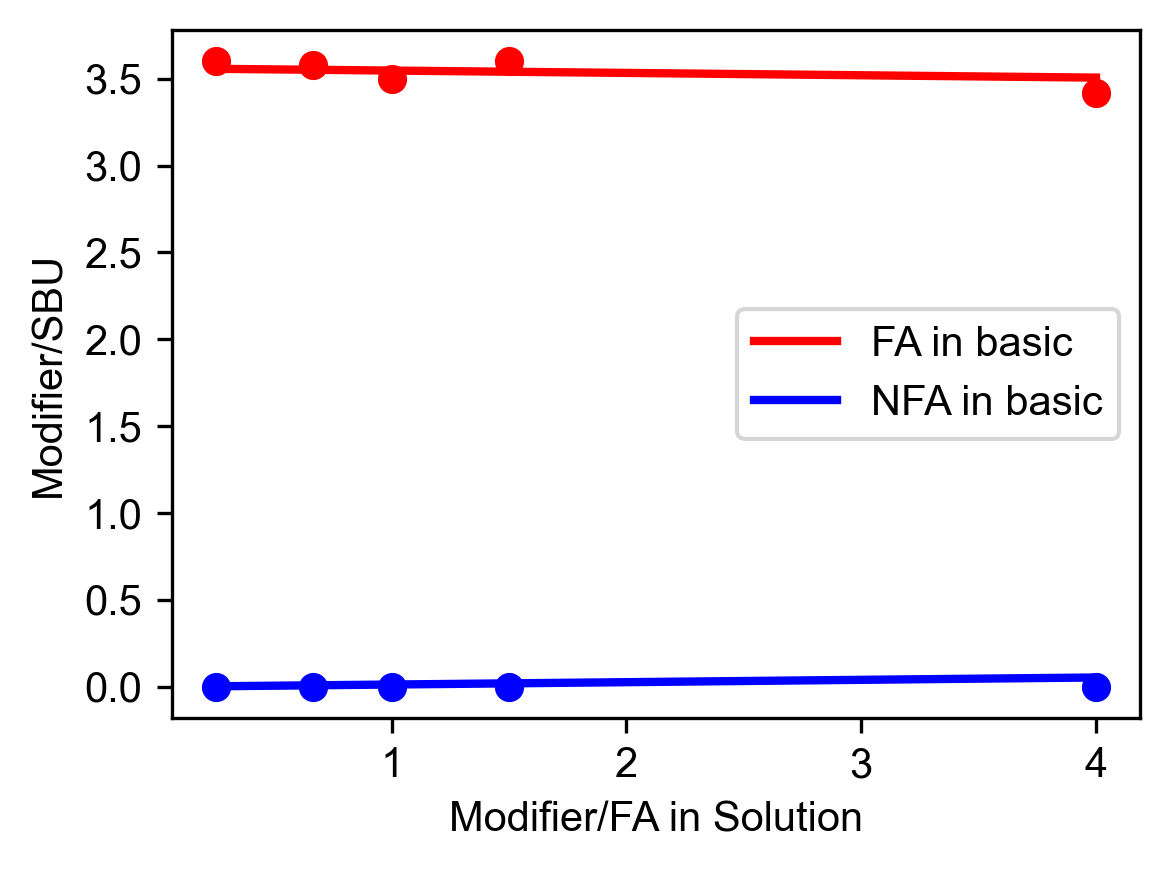

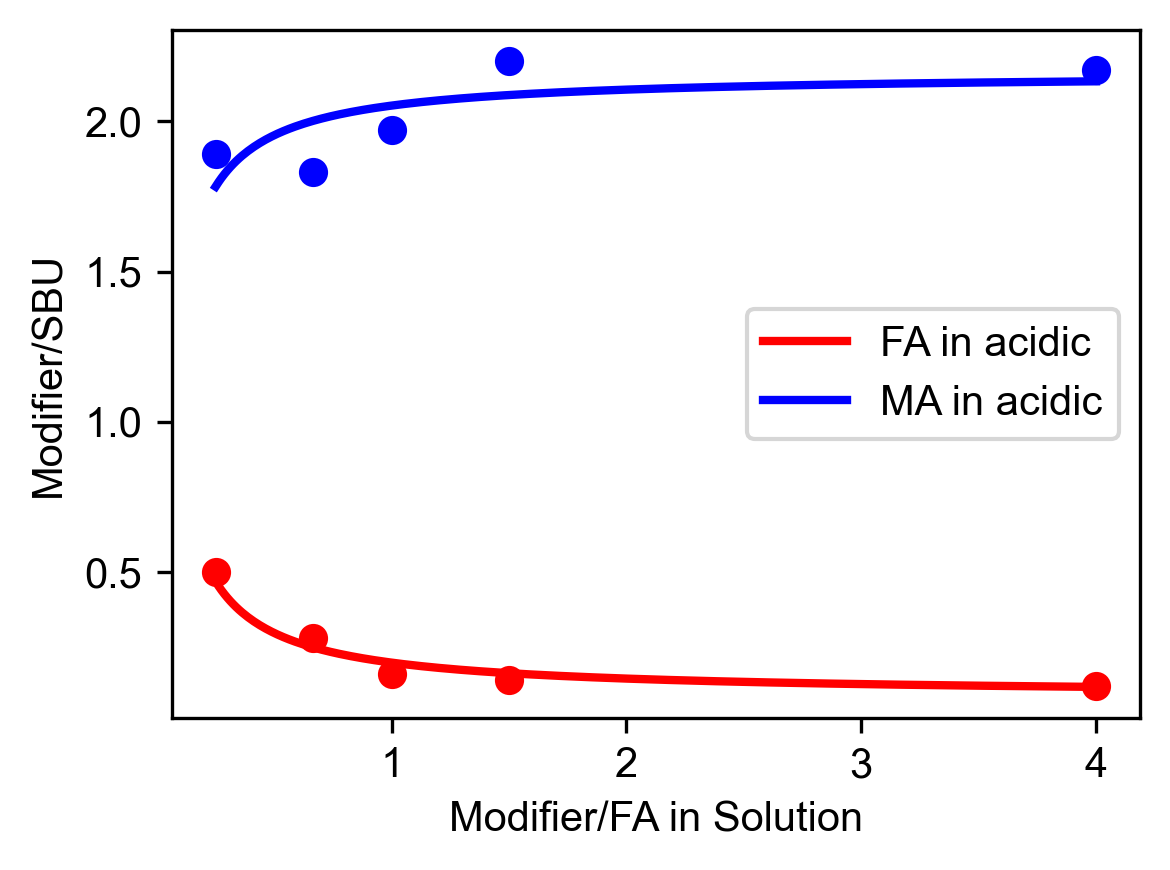

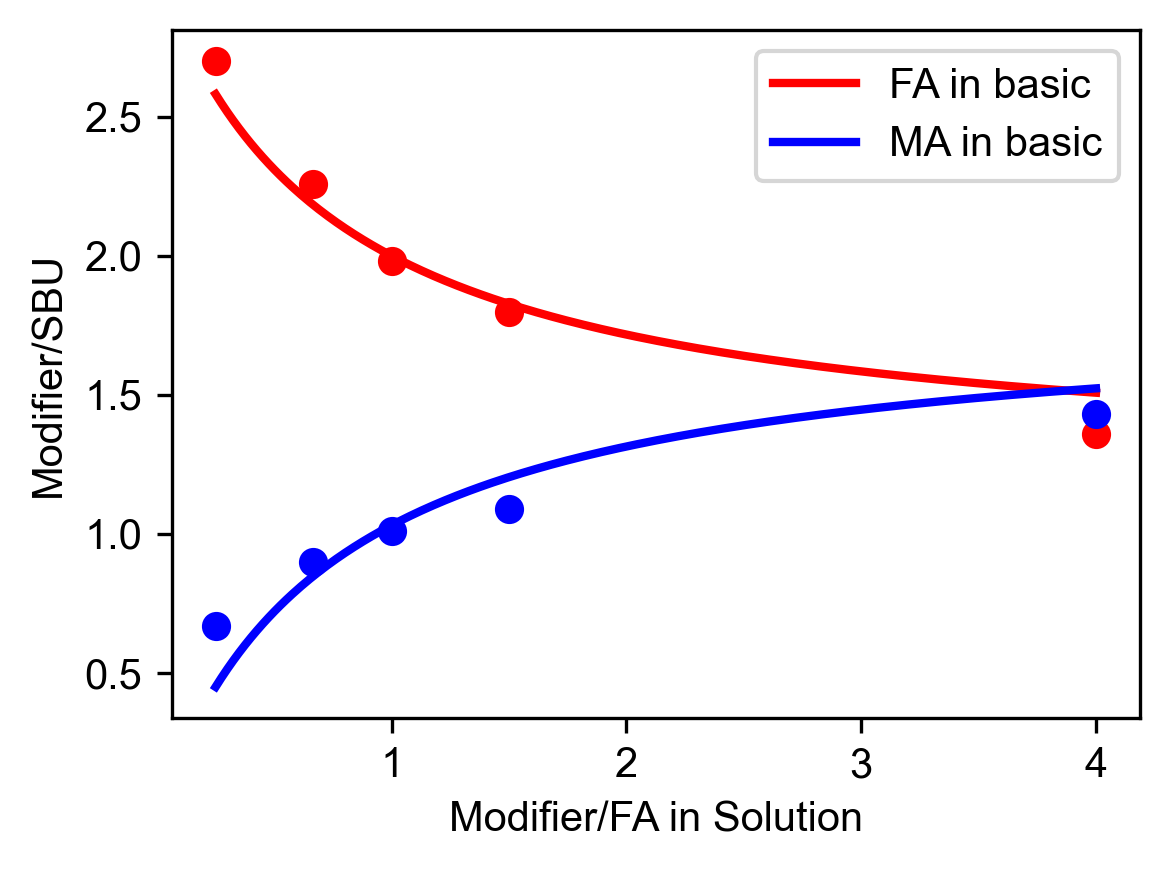

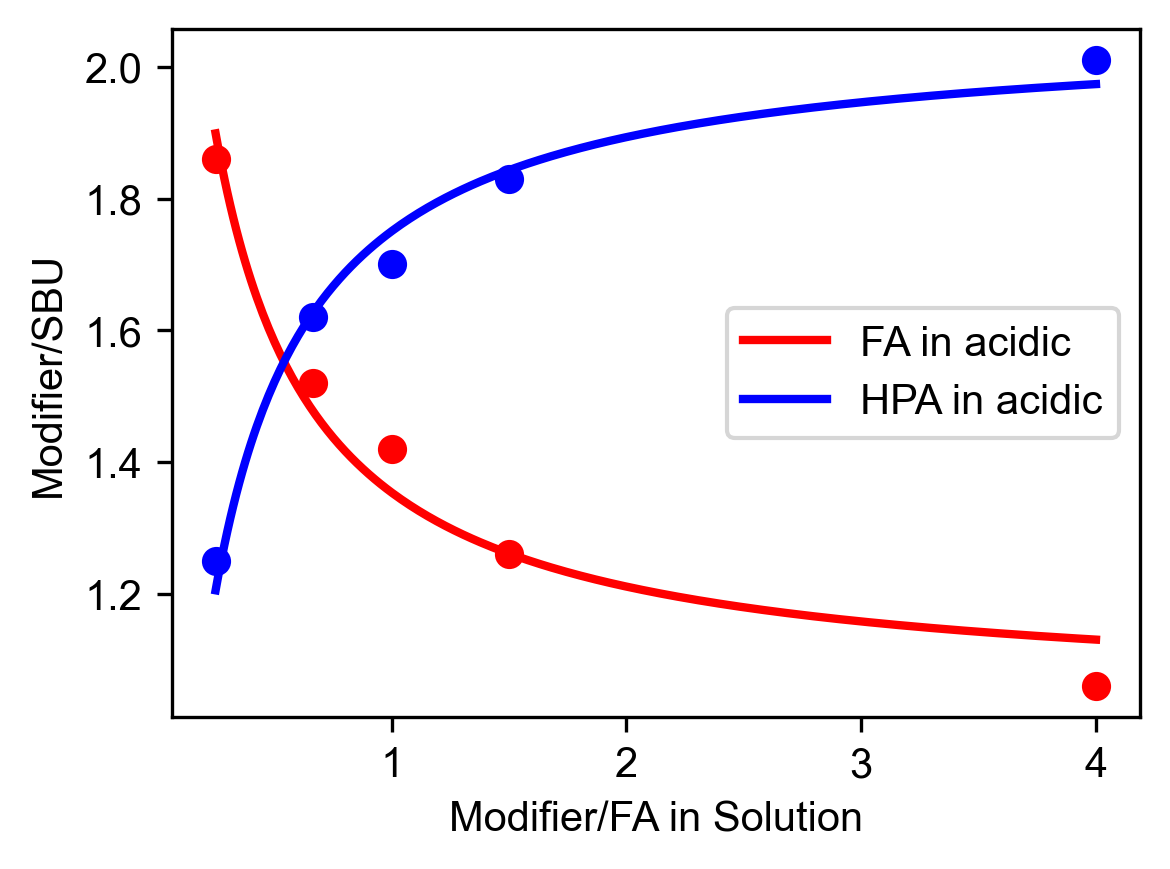

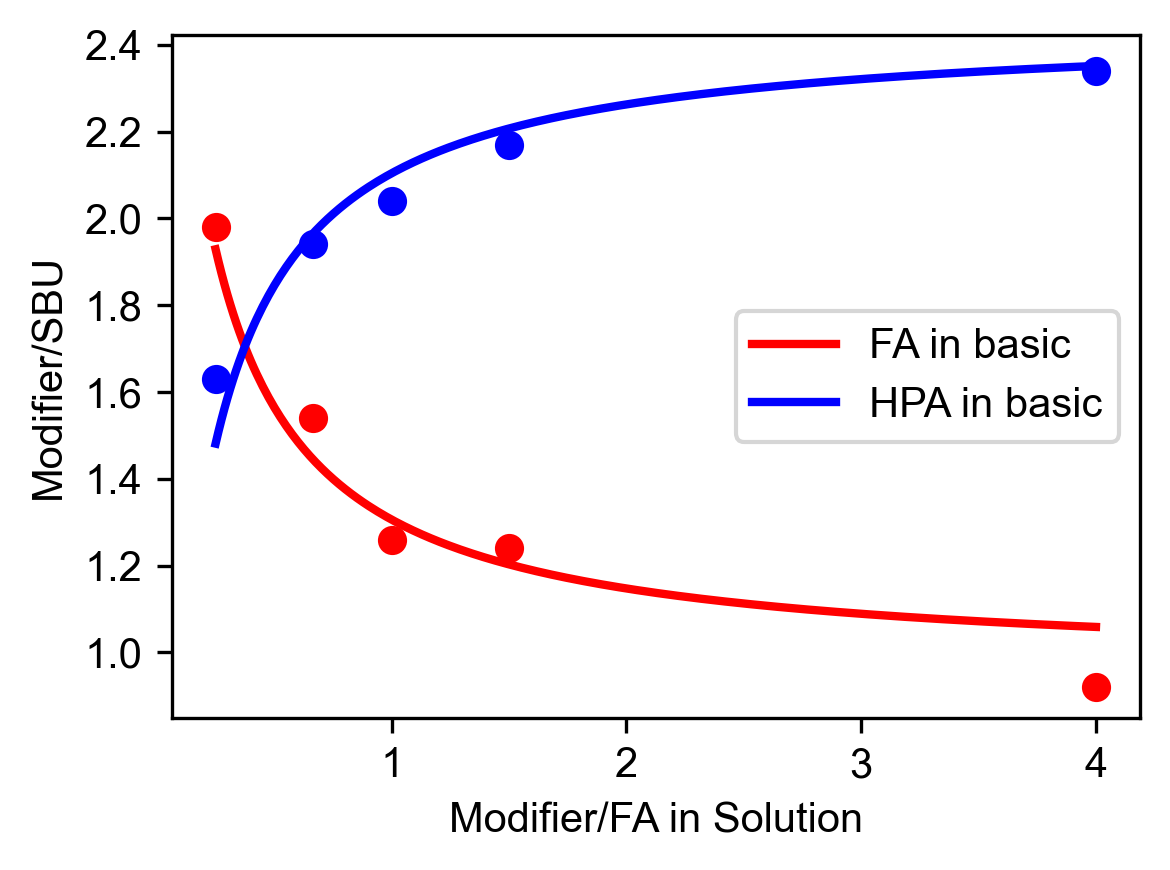

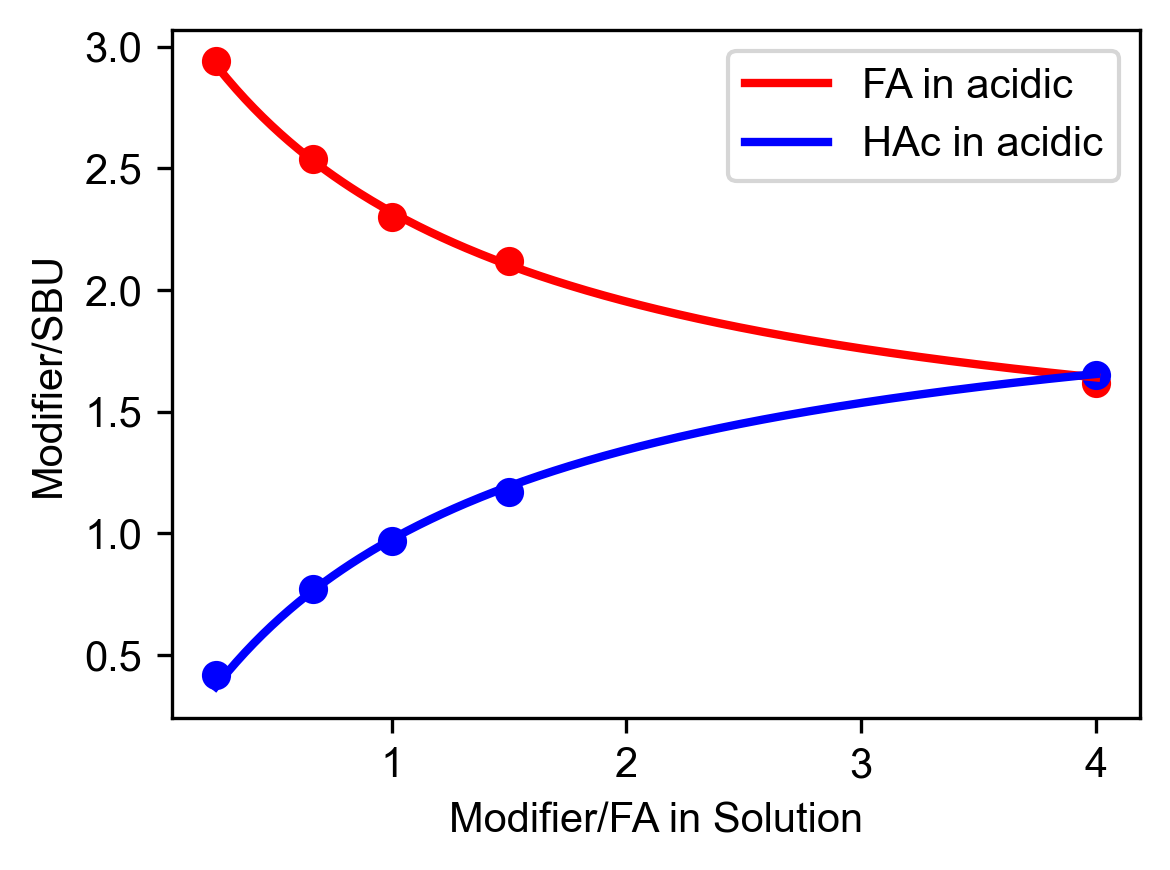

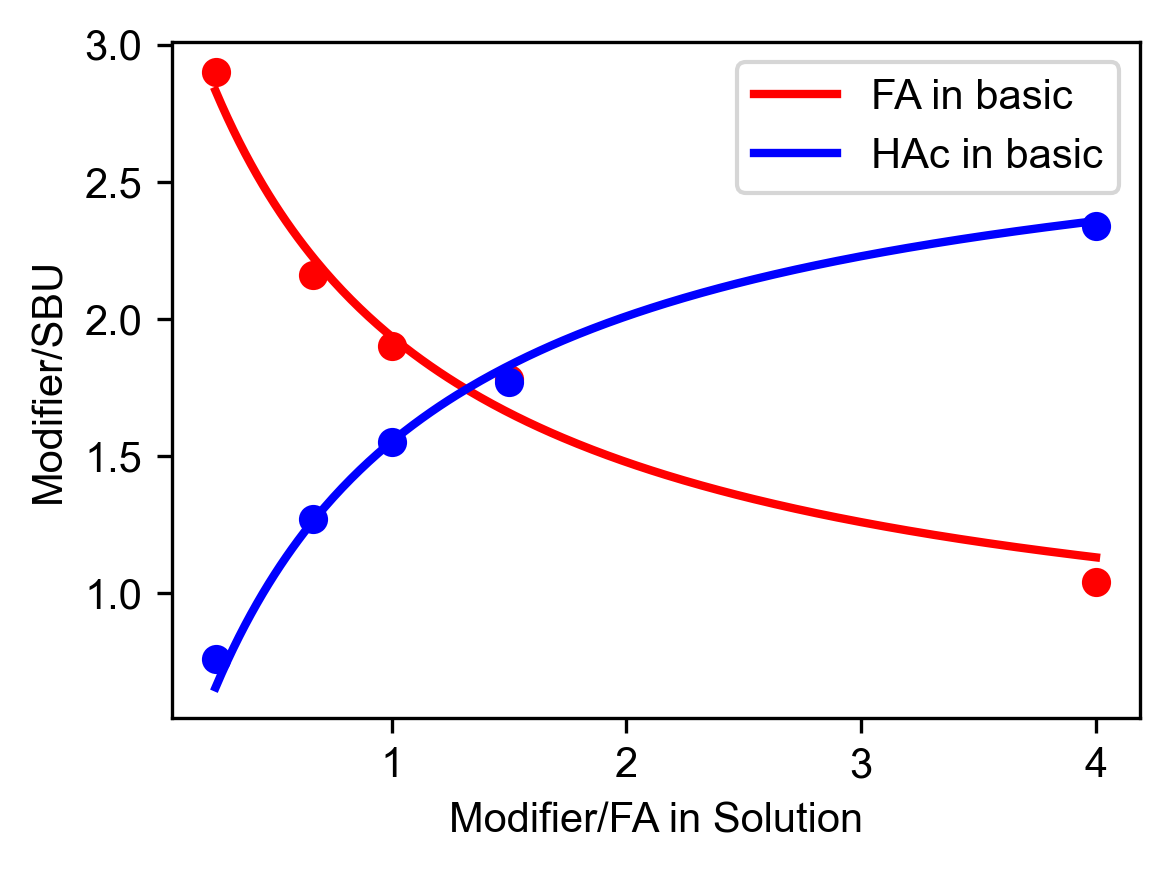

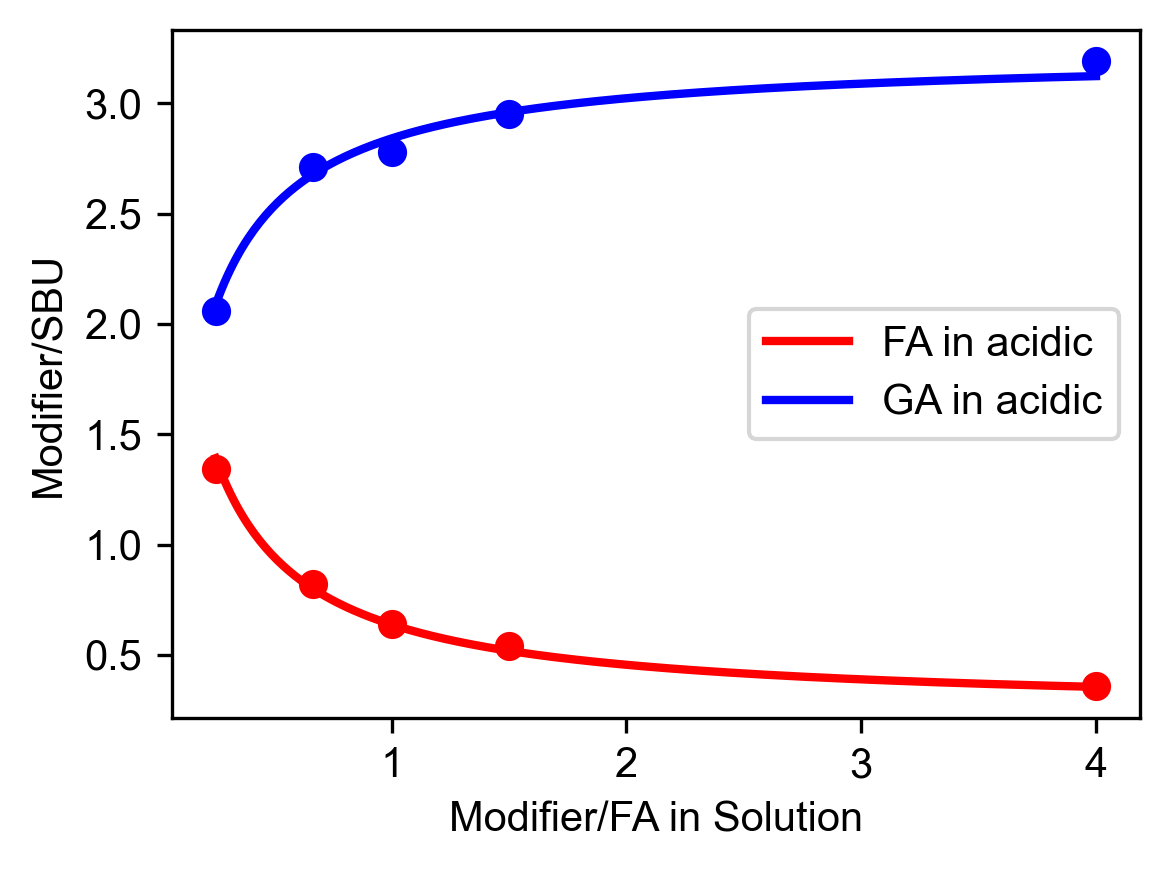

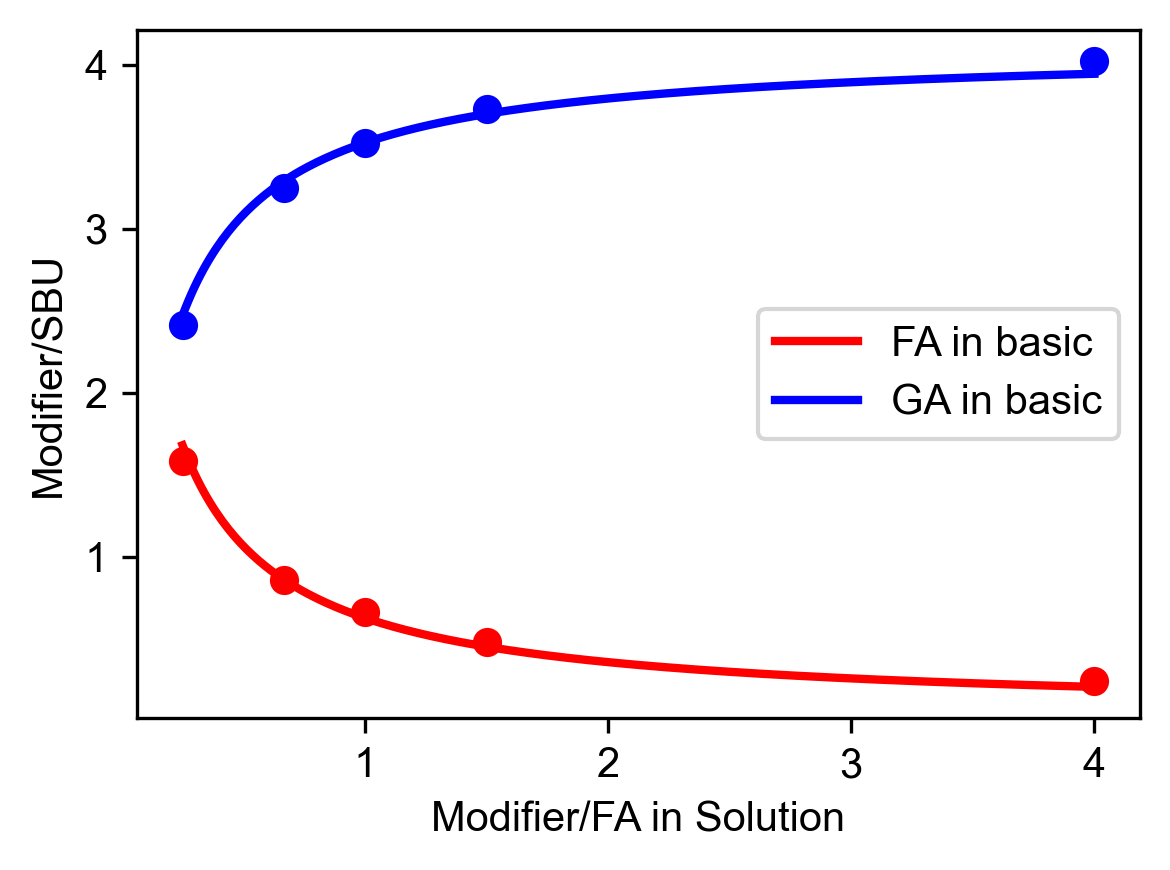

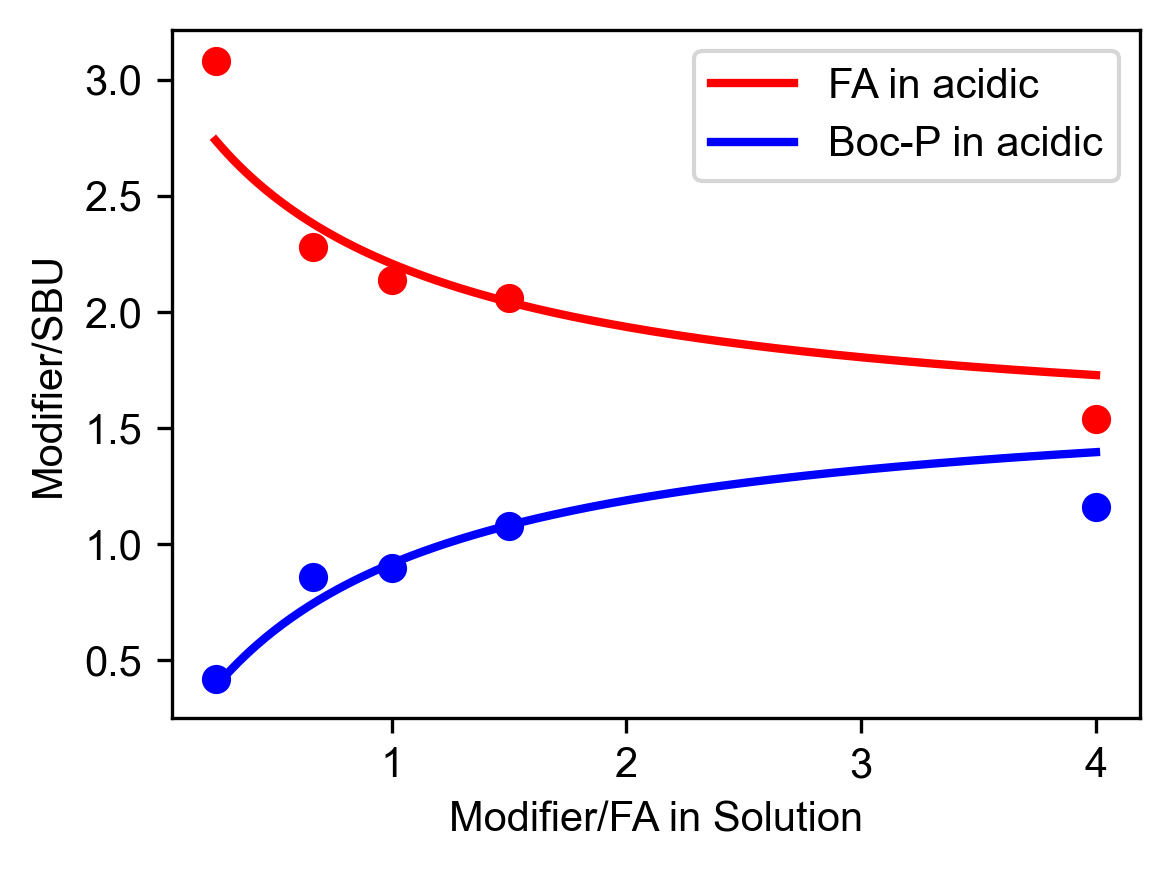

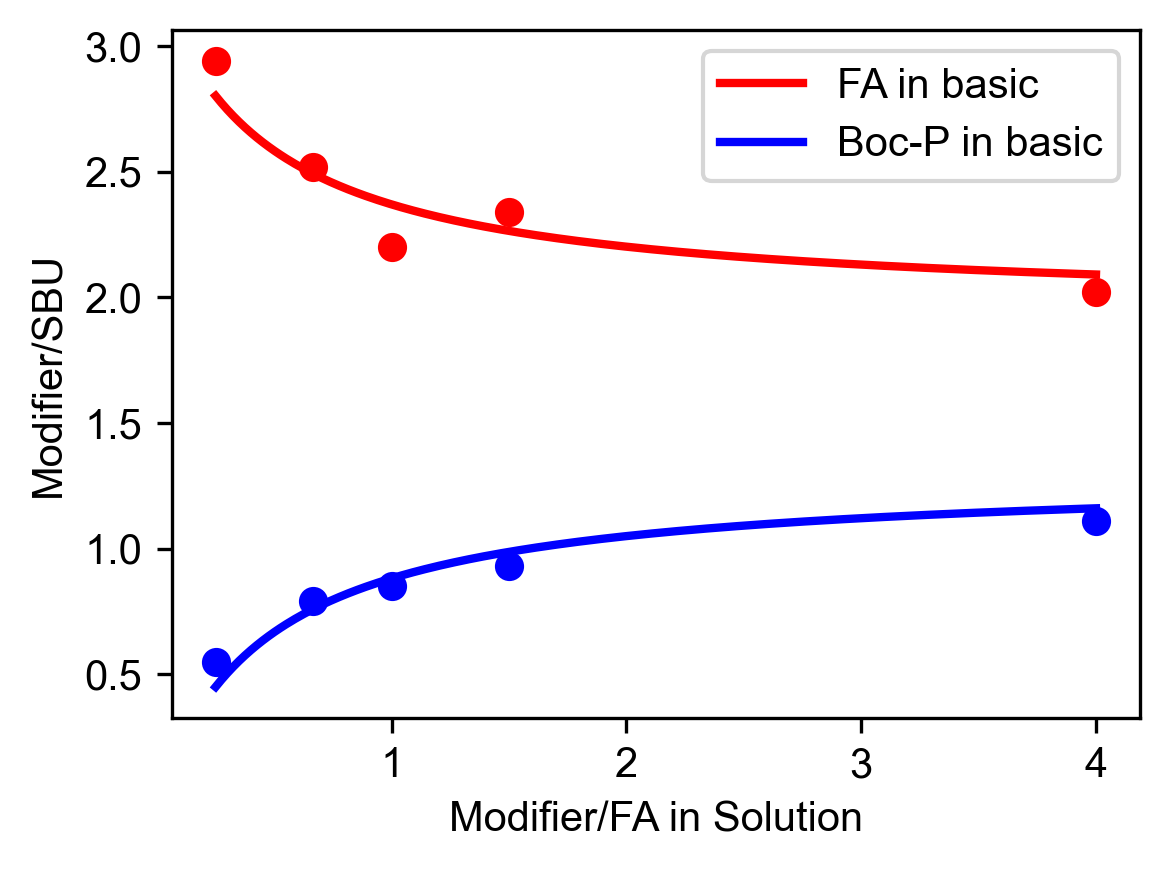

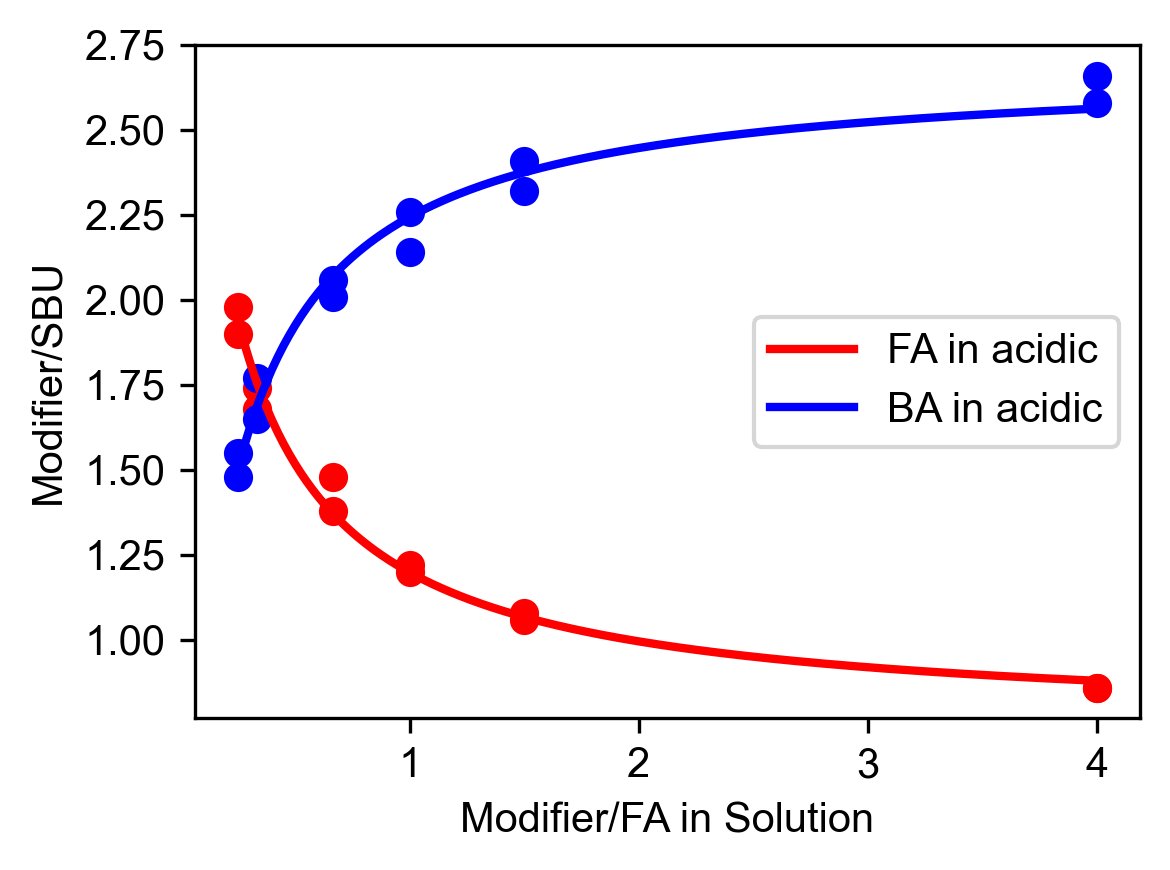

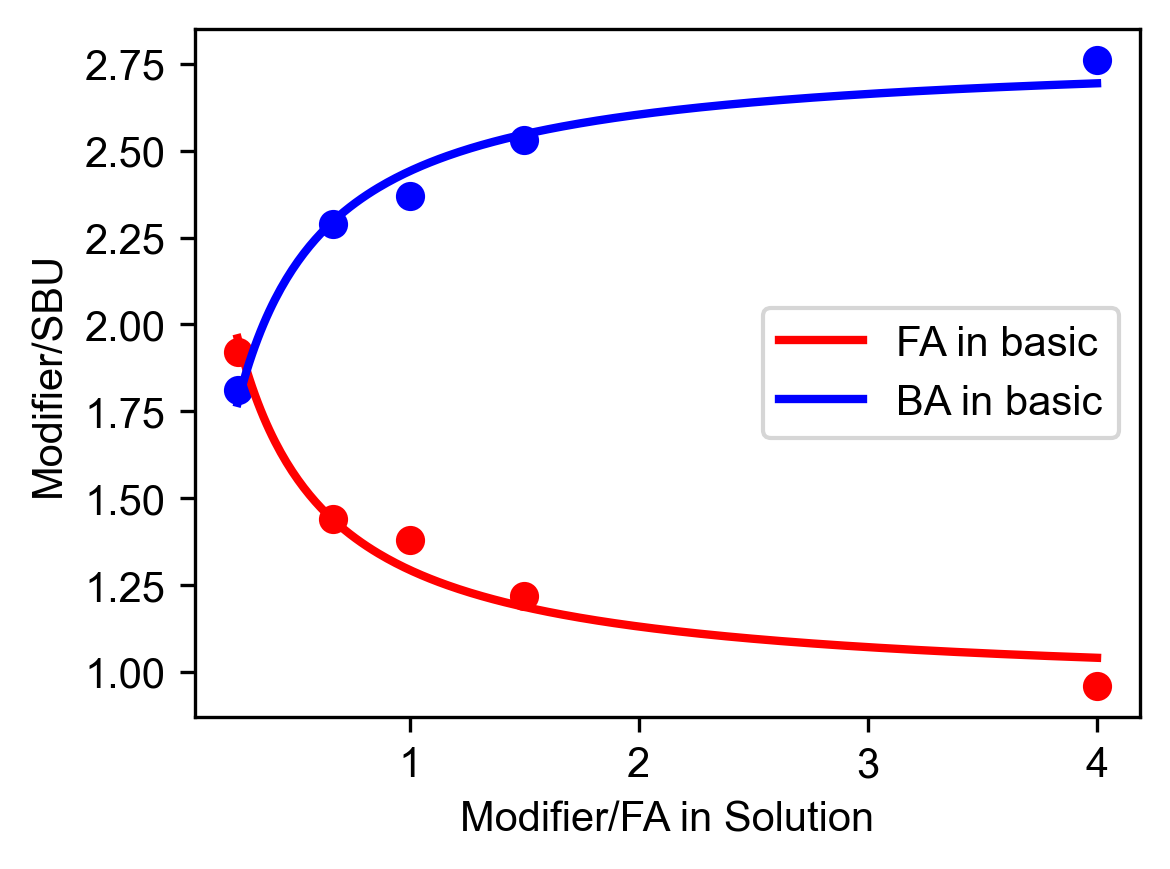

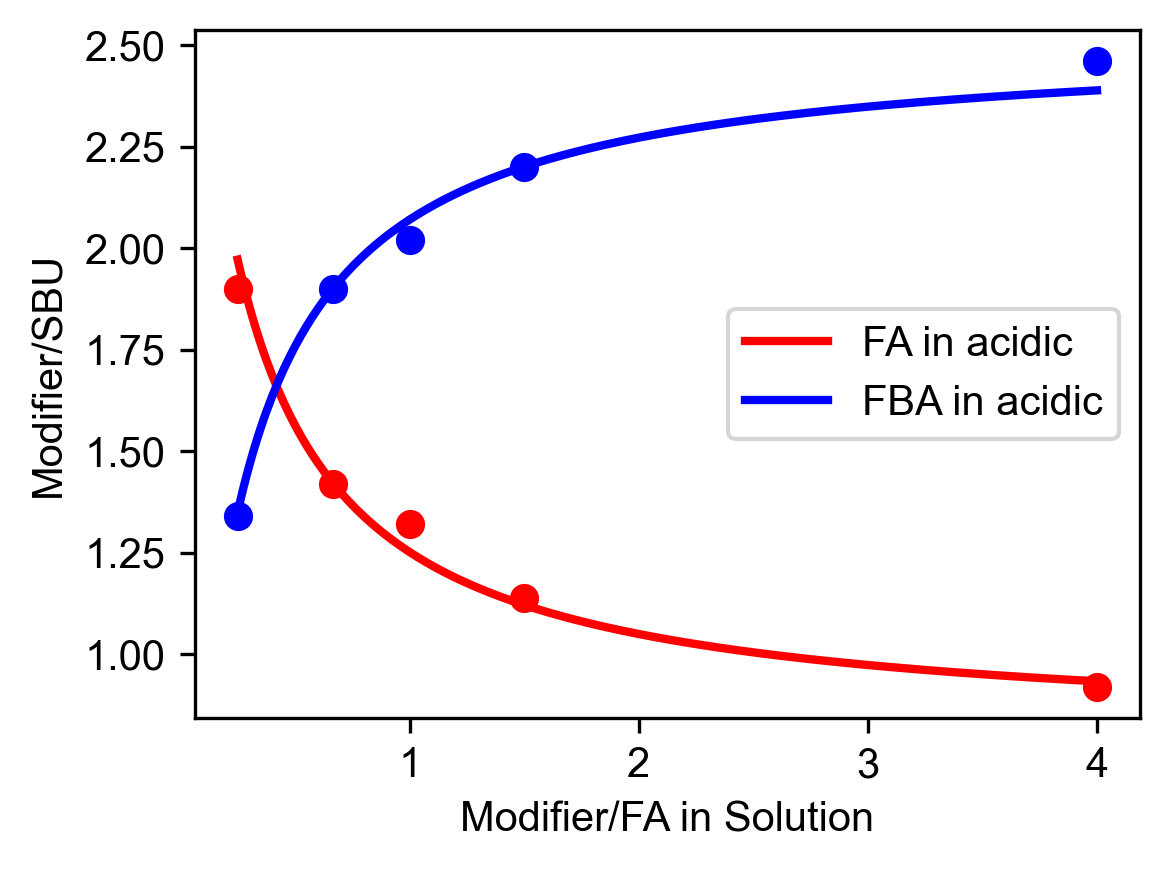

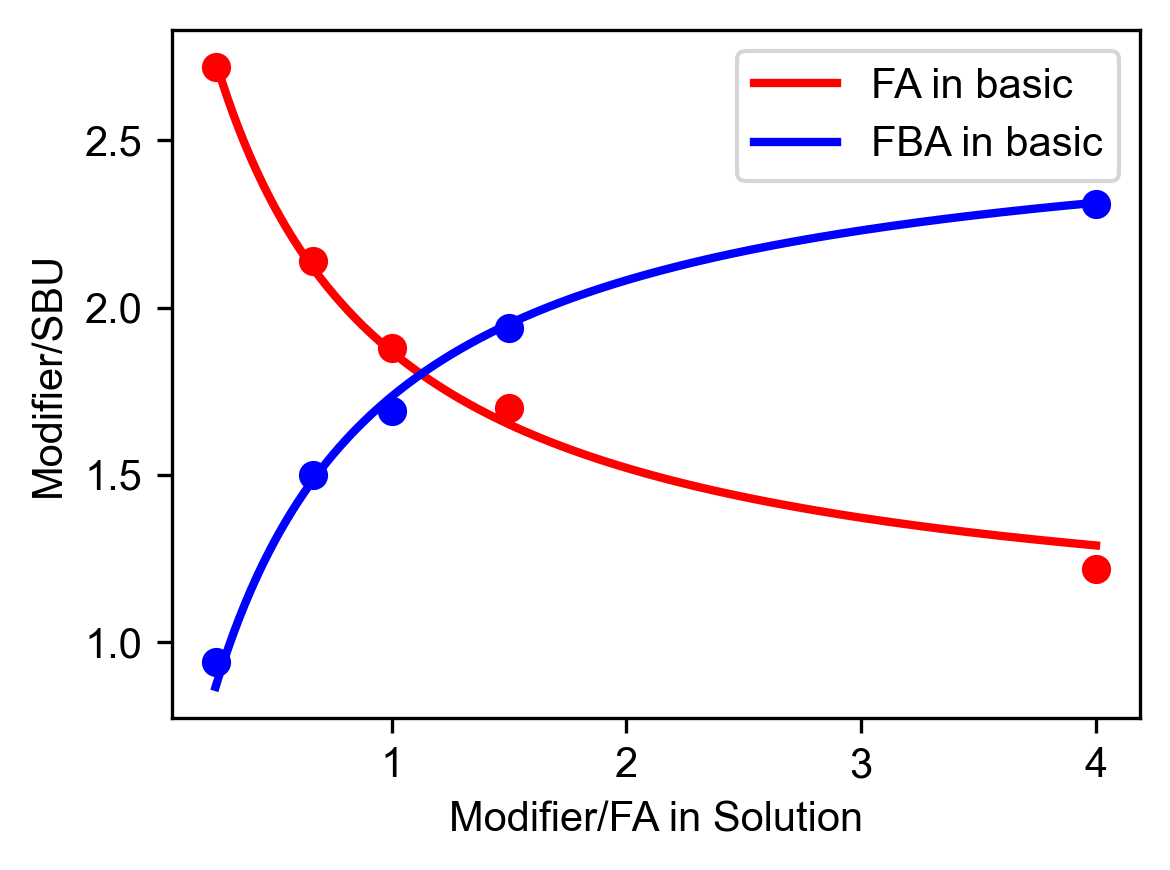

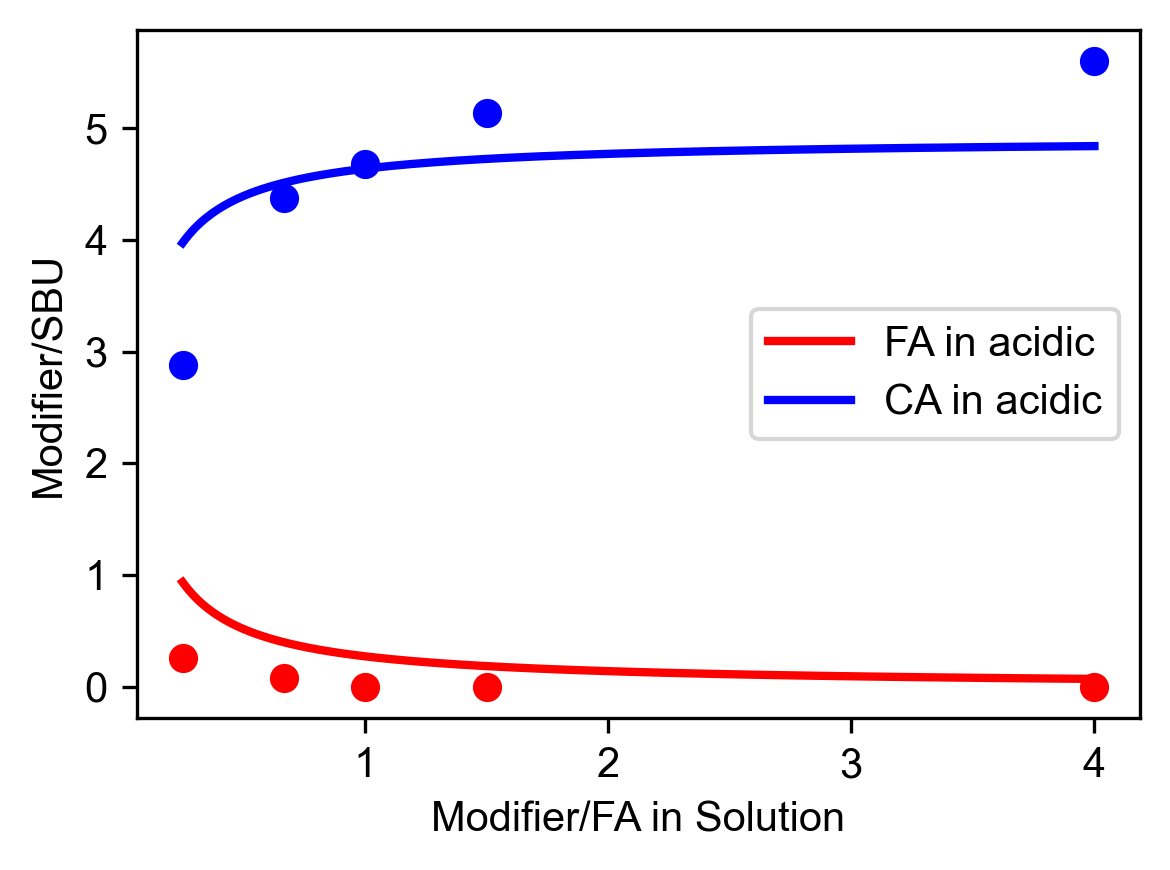

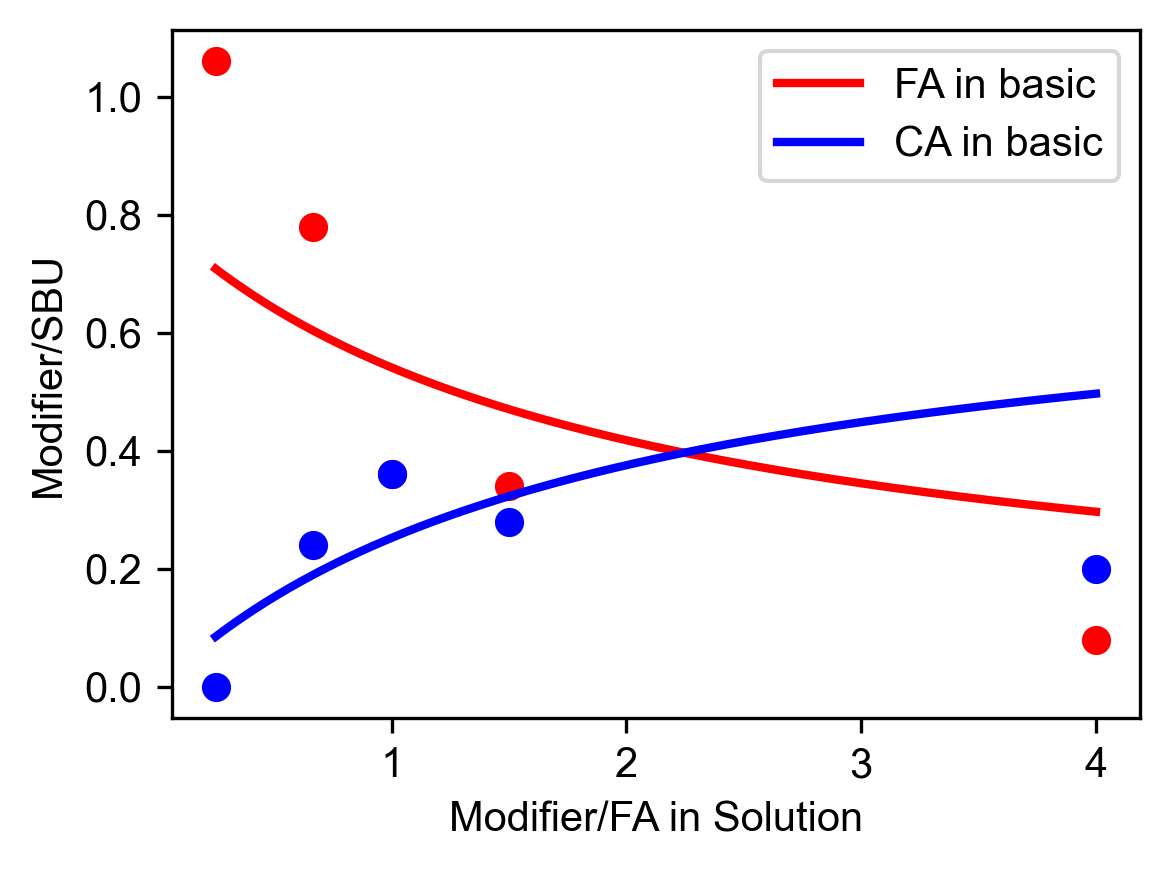

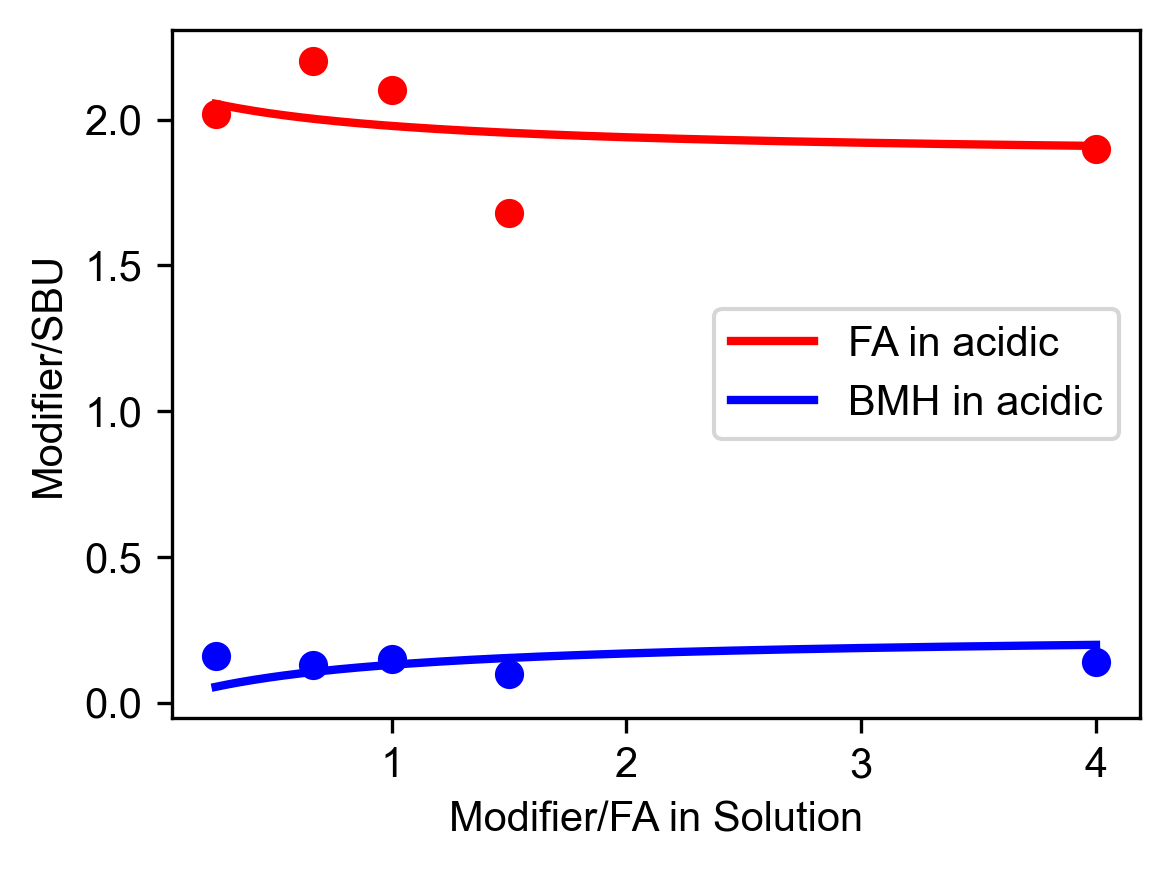

In [10]:
# -----------------------------
# Fit and collect summary
# -----------------------------
summary = []
unique_acid = df["Acid"].unique()

for acid_temp in unique_acid:
    df_by_acid = df[df["Acid"] == acid_temp]
    for experiment_type in df_by_acid["Experiment"].unique():
        try:
            this_curve = df_by_acid[df_by_acid["Experiment"] == experiment_type]
            x = this_curve["Acid conc (mM)"] / this_curve["FA conc (mM)"]
            y1 = this_curve["FA/SBU"].values
            y2 = this_curve["acid/SBU"].values

            popt, pcov = fit_two_curves_shared(x, y1, x, y2, p0=(3., 3.0, 10.), bounds=([0, 0, 0], [6, 6, np.inf]))

            x_fit = np.linspace(np.nanmin(x), np.nanmax(x), 300)
            y_fit = _two_curve_model(np.concatenate((x_fit, x_fit)), len(x_fit), *popt)

            fig, ax = plt.subplots(figsize=(4, 3), dpi = 300)
            ax.plot(x_fit, y_fit[:len(x_fit)], label=f"FA in {experiment_type}", linewidth=2, color = "red")
            ax.plot(x_fit, y_fit[len(x_fit):], label=f"{acid_temp} in {experiment_type}", linewidth=2, color = "blue")
            
            ax.scatter(x, y1, color = "red")
            ax.scatter(x, y2, color = "blue")
            
            ax.set_xlabel(f'Modifier/FA in Solution')
            ax.set_ylabel(f'Modifier/SBU')
            ax.legend(loc='upper left')
            
            ax.legend()
            plt.tight_layout()
            plt.show()

            summary.append({
                "Acid": acid_temp,
                "Experiment": experiment_type,
                "A": popt[0],
                "B": popt[1],
                "k": popt[2]
            })

        except Exception as e:
            print(acid_temp, experiment_type)
            summary.append({
                "Acid": acid_temp,
                "Experiment": experiment_type,
                "Error": str(e)
            })

summary_df = pd.DataFrame(summary)

In [11]:
display(summary1)

Acid Experiment                                                  A  \
0     TFA     acidic                     [3.03, 2.99, 2.94, 3.13, 3.08]   
1     TFA      basic                          [0.0, 0.0, 0.0, 0.0, 0.0]   
2      TA     acidic                     [2.61, 2.57, 2.59, 2.53, 2.55]   
3      TA      basic                     [2.34, 2.42, 2.49, 2.46, 2.42]   
4      SA     acidic                     [2.88, 2.88, 2.86, 2.94, 2.79]   
5      SA      basic                     [2.08, 2.11, 2.13, 2.07, 2.15]   
6      PA     acidic                      [1.78, 1.8, 1.85, 1.88, 1.69]   
7     NFA     acidic                     [3.72, 3.74, 3.56, 3.56, 3.61]   
8     NFA      basic                          [0.0, 0.0, 0.0, 0.0, 0.0]   
9      MA     acidic                       [2.2, 2.25, 2.05, 2.03, 2.3]   
10     MA      basic                      [1.7, 1.76, 1.82, 1.92, 2.05]   
11    HPA     acidic                      [2.1, 2.12, 2.14, 2.15, 2.13]   
12    HPA      basic                     [2.45, 2.56, 2.48, 2.61, 2.71]   
13    HAc     acidic                     [2.16, 2.17, 2.16, 2.18, 2.22]   
14    HAc      basic                      [2.9, 3.05, 2.96, 2.95, 3.14]   
15     GA     acidic                      [3.3, 3.25, 3.18, 3.29, 3.16]   
16     GA      basic                     [4.18, 4.14, 4.11, 4.04, 3.92]   
17  Boc-P     acidic                     [1.34, 1.56, 1.51, 1.56, 1.74]   
18  Boc-P      basic                      [1.2, 1.25, 1.17, 1.27, 1.34]   
19     BA     acidic  [2.79, 2.75, 2.74, 2.72, 2.73, 2.73, 2.72, 2.6...   
20     BA      basic                     [2.86, 2.89, 2.89, 2.87, 2.87]   
21    FBA     acidic                       [2.6, 2.57, 2.57, 2.56, 2.5]   
22    FBA      basic                     [2.63, 2.71, 2.66, 2.71, 2.73]   
23     CA     acidic                      [5.74, 5.27, 4.8, 4.57, 3.22]   
24     CA      basic                       [0.27, 0.6, 0.7, 0.99, 1.03]   
25    BMH     acidic                     [0.13, 0.11, 0.14, 0.15, 0.14]   

    mean_A  std_A                                                  B  mean_B  \
0     3.03   0.07                     [0.37, 0.37, 0.36, 0.39, 0.38]    0.38   
1     0.00   0.00                      [3.46, 3.6, 3.58, 3.64, 3.74]    3.60   
2     2.57   0.03                     [0.19, 0.19, 0.19, 0.19, 0.19]    0.19   
3     2.43   0.05                     [0.46, 0.48, 0.49, 0.48, 0.48]    0.48   
4     2.87   0.05                     [0.56, 0.56, 0.56, 0.58, 0.55]    0.56   
5     2.11   0.03                      [1.67, 1.69, 1.7, 1.66, 1.72]    1.69   
6     1.80   0.06                      [0.48, 0.48, 0.49, 0.5, 0.45]    0.48   
7     3.64   0.08                       [0.4, 0.4, 0.38, 0.38, 0.39]    0.39   
8     0.00   0.00                        [3.42, 3.6, 3.5, 3.58, 3.6]    3.54   
9     2.16   0.11                     [0.09, 0.09, 0.08, 0.08, 0.09]    0.09   
10    1.85   0.12                     [1.09, 1.13, 1.17, 1.24, 1.32]    1.19   
11    2.13   0.02                     [0.97, 0.97, 0.98, 0.99, 0.98]    0.98   
12    2.56   0.09                      [0.81, 0.85, 0.82, 0.87, 0.9]    0.85   
13    2.18   0.02                     [1.11, 1.12, 1.11, 1.13, 1.14]    1.12   
14    3.00   0.09                      [0.48, 0.5, 0.49, 0.48, 0.52]    0.49   
15    3.24   0.06                     [0.25, 0.24, 0.24, 0.24, 0.24]    0.24   
16    4.08   0.09                     [0.08, 0.07, 0.07, 0.07, 0.07]    0.07   
17    1.55   0.13                     [1.36, 1.58, 1.53, 1.58, 1.76]    1.56   
18    1.24   0.06                     [1.93, 2.02, 1.88, 2.04, 2.15]    2.01   
19    2.73   0.03  [0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.7...    0.72   
20    2.88   0.01                     [0.86, 0.86, 0.86, 0.86, 0.86]    0.86   
21    2.56   0.04                     [0.78, 0.77, 0.77, 0.76, 0.74]    0.76   
22    2.69   0.04                      [0.9, 0.93, 0.91, 0.93, 0.93]    0.92   
23    4.72   0.85                [-0.14, -0.13, -0.12, -0.1

In [12]:
display(summary_df)

Acid Experiment         A             B          k
0     TFA     acidic  2.999279  4.087069e-01  40.457770
1     TFA      basic  3.632548  3.008171e-08   0.005373
2      TA     acidic  2.558390  2.015369e-01  25.636687
3      TA      basic  2.264213  6.347594e-01   3.280415
4      SA     acidic  2.810547  6.211158e-01  16.158399
5      SA      basic  2.045675  1.737817e+00   1.001525
6      PA     acidic  1.721864  5.568682e-01   3.960420
7     NFA     acidic  3.635948  3.919866e-01  39.518878
8     NFA      basic  3.560157  1.703961e-10   0.003856
9      MA     acidic  2.161628  9.011571e-02  18.831399
10     MA      basic  1.811833  1.219893e+00   1.322078
11    HPA     acidic  2.061486  1.042598e+00   5.629201
12    HPA      basic  2.447286  9.627896e-01   6.132335
13    HAc     acidic  2.154912  1.141143e+00   0.827734
14    HAc      basic  2.850119  6.382662e-01   1.196755
15     GA     acidic  3.229689  2.478370e-01   7.297228
16     GA      basic  4.107251  4.197356e-02   6.036039
17  Boc-P     acidic  1.692154  1.433684e+00   1.183433
18  Boc-P      basic  1.297312  1.954441e+00   2.121178
19     BA     acidic  2.690409  7.524434e-01   5.026003
20     BA      basic  2.790146  9.444301e-01   6.986317
21    FBA     acidic  2.517390  8.047397e-01   4.628662
22    FBA      basic  2.602636  9.996699e-01   1.997042
23     CA     acidic  4.912068  2.872875e-18  16.947334
24     CA      basic  0.733207  6.034903e-02   0.525360
25    BMH     acidic  0.241376  1.867783e+00   1.182190

In [13]:
# get rid of the last two messy points 

# summary_df = summary_df.iloc[:-2]
# summary1 = summary1.iloc[:-2]

In [14]:
# Save the summary dataframe to a CSV file
summary_df.to_csv('summary_data.csv', index=False)
print(f"Summary data saved to 'summary_data.csv'")


Summary data saved to 'summary_data.csv'


In [15]:
df[(df['Acid'] == "TFA") & (df['Experiment'] == "basic")]

Acid Experiment  Acid conc (mM)  FA conc (mM)  acid/SBU  FA/SBU
5  TFA      basic           180.0          45.0       0.0    3.46
6  TFA      basic           135.0          90.0       0.0    3.60
7  TFA      basic           112.5         112.5       0.0    3.58
8  TFA      basic            90.0         135.0       0.0    3.64
9  TFA      basic            45.0         180.0       0.0    3.74

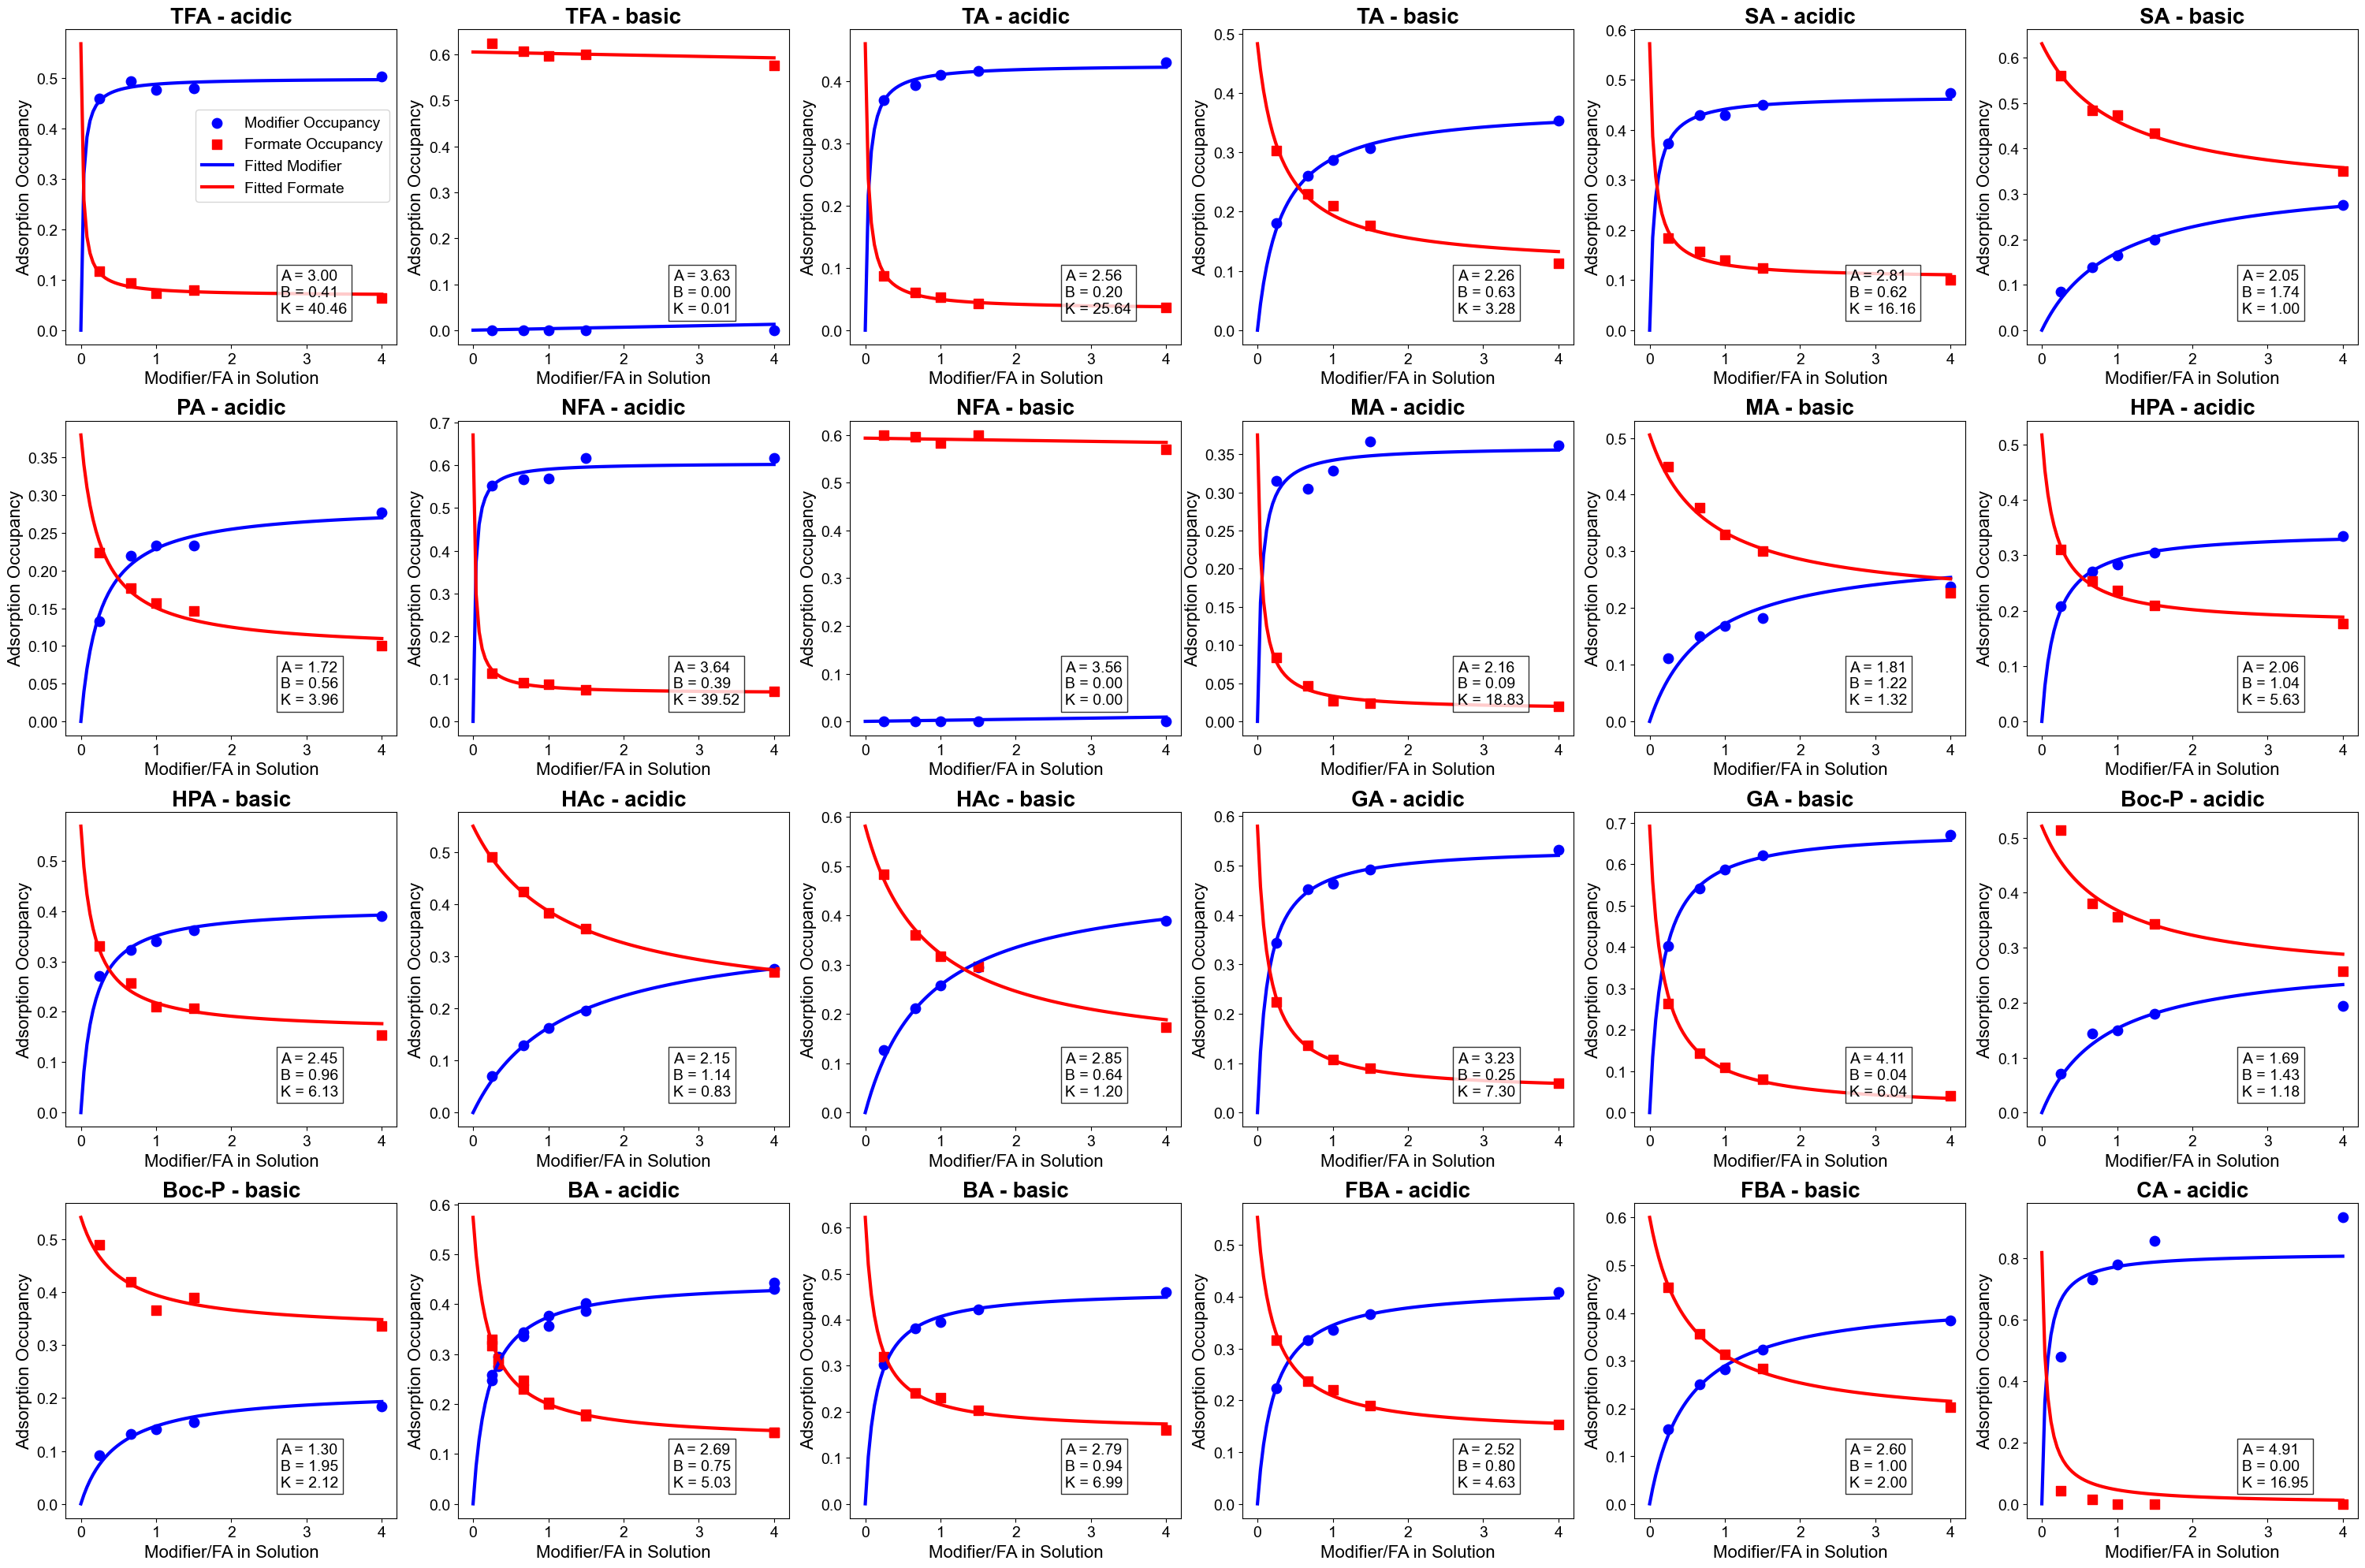

In [16]:
# Create a large plot of the two-curve fitting results for ratio fitting
fig, axes = plt.subplots(4, 6, figsize=(30, 20))
axes = axes.flatten()

# Get the data from summary_df
acids = summary_df['Acid'].unique()

# Counter for subplot position
plot_idx = 0

for acid in acids:
    acid_data = summary_df[summary_df['Acid'] == acid]
    
    # Skip BMH acid
    if acid == 'BMH':
        continue
        
    for _, row in acid_data.iterrows():
        if plot_idx >= len(axes):
            break
            
        ax = axes[plot_idx]
        
        try:
            # Extract parameters
            A = row['A']
            B = row['B']
            k = row['k']
            experiment_type = row['Experiment']
            
            # Get the experimental data for this acid and experiment type
            exp_data = df[(df['Acid'] == acid) & (df['Experiment'] == experiment_type)]
            
            if not exp_data.empty:
                # Plot the experimental data points
                ax.scatter(exp_data['Acid conc (mM)'].values/ exp_data['FA conc (mM)'].values, exp_data['acid/SBU'].values/6, 
                          color='blue', marker='o', s=80)
                ax.scatter(exp_data['Acid conc (mM)'].values/ exp_data['FA conc (mM)'].values, exp_data['FA/SBU'].values/6, 
                          color='red', marker='s', s=80)
                
                # Calculate the total concentration (fixed sum)
                total_conc = exp_data['Acid conc (mM)'].values[0] + exp_data['FA conc (mM)'].values[0]
                
                # Generate modifier ratio for plotting the fitted curve
                x_fit = np.linspace(0, 4, 100)
                xcat = np.concatenate((x_fit, x_fit))
                n1 = len(x_fit)
                # Calculate y values using the fitted parameters for modifier curve
                y_fit  = _two_curve_model(xcat, n1, A, B, k)/6
                y_fit_formate, y_fit_modifier = y_fit[:n1], y_fit[n1:]
                # Plot the fitted curves
                ax.plot(x_fit, y_fit_modifier, 'b-', linewidth=3.0)
                ax.plot(x_fit, y_fit_formate, 'r-', linewidth=3.0)
                
                # Only add legend to the first subplot
                if plot_idx == 0:
                    ax.scatter([], [], color='blue', marker='o', s=80, label='Modifier Occupancy')
                    ax.scatter([], [], color='red', marker='s', s=80, label='Formate Occupancy')
                    ax.plot([], [], 'b-', linewidth=3.0, label='Fitted Modifier')
                    ax.plot([], [], 'r-', linewidth=3.0, label='Fitted Formate')
                    ax.legend(loc='center right', bbox_to_anchor=(1.0, 0.6), fontsize=14)
            
            # Set title and labels
            ax.set_title(f"{acid} - {experiment_type}", fontsize=20, fontweight='bold')
            ax.set_xlabel('Modifier/FA in Solution', fontsize=16)
            ax.set_ylabel('Adsorption Occupancy', fontsize=16)
            ax.tick_params(axis='both', which='major', labelsize=14)
            
            # Add parameters as text
            # Format k with scientific notation if it's over 1000
            k_text = f"{k:.2e}" if k > 1000 else f"{k:.2f}"
            param_text = f"A = {A:.2f}\nB = {B:.2f}\nK = {k_text}"
            ax.text(0.65, 0.10, param_text, transform=ax.transAxes, 
                   bbox=dict(facecolor='white', alpha=0.8), fontsize=14)
            
            plot_idx += 1
            
        except Exception as e:
            ax.text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center', transform=ax.transAxes, fontsize=14)
            plot_idx += 1

# Hide any unused subplots
for i in range(plot_idx, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [17]:
summary1 = summary1[summary1["Acid"] != "BMH"].reindex()
summary_df = summary_df[summary_df["Acid"] != "BMH"].reindex()

In [18]:
display(summary1)
display(summary_df)

Acid Experiment                                                  A  \
0     TFA     acidic                     [3.03, 2.99, 2.94, 3.13, 3.08]   
1     TFA      basic                          [0.0, 0.0, 0.0, 0.0, 0.0]   
2      TA     acidic                     [2.61, 2.57, 2.59, 2.53, 2.55]   
3      TA      basic                     [2.34, 2.42, 2.49, 2.46, 2.42]   
4      SA     acidic                     [2.88, 2.88, 2.86, 2.94, 2.79]   
5      SA      basic                     [2.08, 2.11, 2.13, 2.07, 2.15]   
6      PA     acidic                      [1.78, 1.8, 1.85, 1.88, 1.69]   
7     NFA     acidic                     [3.72, 3.74, 3.56, 3.56, 3.61]   
8     NFA      basic                          [0.0, 0.0, 0.0, 0.0, 0.0]   
9      MA     acidic                       [2.2, 2.25, 2.05, 2.03, 2.3]   
10     MA      basic                      [1.7, 1.76, 1.82, 1.92, 2.05]   
11    HPA     acidic                      [2.1, 2.12, 2.14, 2.15, 2.13]   
12    HPA      basic                     [2.45, 2.56, 2.48, 2.61, 2.71]   
13    HAc     acidic                     [2.16, 2.17, 2.16, 2.18, 2.22]   
14    HAc      basic                      [2.9, 3.05, 2.96, 2.95, 3.14]   
15     GA     acidic                      [3.3, 3.25, 3.18, 3.29, 3.16]   
16     GA      basic                     [4.18, 4.14, 4.11, 4.04, 3.92]   
17  Boc-P     acidic                     [1.34, 1.56, 1.51, 1.56, 1.74]   
18  Boc-P      basic                      [1.2, 1.25, 1.17, 1.27, 1.34]   
19     BA     acidic  [2.79, 2.75, 2.74, 2.72, 2.73, 2.73, 2.72, 2.6...   
20     BA      basic                     [2.86, 2.89, 2.89, 2.87, 2.87]   
21    FBA     acidic                       [2.6, 2.57, 2.57, 2.56, 2.5]   
22    FBA      basic                     [2.63, 2.71, 2.66, 2.71, 2.73]   
23     CA     acidic                      [5.74, 5.27, 4.8, 4.57, 3.22]   
24     CA      basic                       [0.27, 0.6, 0.7, 0.99, 1.03]   

    mean_A  std_A                                                  B  mean_B  \
0     3.03   0.07                     [0.37, 0.37, 0.36, 0.39, 0.38]    0.38   
1     0.00   0.00                      [3.46, 3.6, 3.58, 3.64, 3.74]    3.60   
2     2.57   0.03                     [0.19, 0.19, 0.19, 0.19, 0.19]    0.19   
3     2.43   0.05                     [0.46, 0.48, 0.49, 0.48, 0.48]    0.48   
4     2.87   0.05                     [0.56, 0.56, 0.56, 0.58, 0.55]    0.56   
5     2.11   0.03                      [1.67, 1.69, 1.7, 1.66, 1.72]    1.69   
6     1.80   0.06                      [0.48, 0.48, 0.49, 0.5, 0.45]    0.48   
7     3.64   0.08                       [0.4, 0.4, 0.38, 0.38, 0.39]    0.39   
8     0.00   0.00                        [3.42, 3.6, 3.5, 3.58, 3.6]    3.54   
9     2.16   0.11                     [0.09, 0.09, 0.08, 0.08, 0.09]    0.09   
10    1.85   0.12                     [1.09, 1.13, 1.17, 1.24, 1.32]    1.19   
11    2.13   0.02                     [0.97, 0.97, 0.98, 0.99, 0.98]    0.98   
12    2.56   0.09                      [0.81, 0.85, 0.82, 0.87, 0.9]    0.85   
13    2.18   0.02                     [1.11, 1.12, 1.11, 1.13, 1.14]    1.12   
14    3.00   0.09                      [0.48, 0.5, 0.49, 0.48, 0.52]    0.49   
15    3.24   0.06                     [0.25, 0.24, 0.24, 0.24, 0.24]    0.24   
16    4.08   0.09                     [0.08, 0.07, 0.07, 0.07, 0.07]    0.07   
17    1.55   0.13                     [1.36, 1.58, 1.53, 1.58, 1.76]    1.56   
18    1.24   0.06                     [1.93, 2.02, 1.88, 2.04, 2.15]    2.01   
19    2.73   0.03  [0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.7...    0.72   
20    2.88   0.01                     [0.86, 0.86, 0.86, 0.86, 0.86]    0.86   
21    2.56   0.04                     [0.78, 0.77, 0.77, 0.76, 0.74]    0.76   
22    2.69   0.04                      [0.9, 0.93, 0.91, 0.93, 0.93]    0.92   
23    4.72   0.85                [-0.14, -0.13, -0.12, -0.11, -0.08]   -0.12   
24    0.72   0.28                     [0.01, 0.02, 0.0

Acid Experiment         A             B          k
0     TFA     acidic  2.999279  4.087069e-01  40.457770
1     TFA      basic  3.632548  3.008171e-08   0.005373
2      TA     acidic  2.558390  2.015369e-01  25.636687
3      TA      basic  2.264213  6.347594e-01   3.280415
4      SA     acidic  2.810547  6.211158e-01  16.158399
5      SA      basic  2.045675  1.737817e+00   1.001525
6      PA     acidic  1.721864  5.568682e-01   3.960420
7     NFA     acidic  3.635948  3.919866e-01  39.518878
8     NFA      basic  3.560157  1.703961e-10   0.003856
9      MA     acidic  2.161628  9.011571e-02  18.831399
10     MA      basic  1.811833  1.219893e+00   1.322078
11    HPA     acidic  2.061486  1.042598e+00   5.629201
12    HPA      basic  2.447286  9.627896e-01   6.132335
13    HAc     acidic  2.154912  1.141143e+00   0.827734
14    HAc      basic  2.850119  6.382662e-01   1.196755
15     GA     acidic  3.229689  2.478370e-01   7.297228
16     GA      basic  4.107251  4.197356e-02   6.036039
17  Boc-P     acidic  1.692154  1.433684e+00   1.183433
18  Boc-P      basic  1.297312  1.954441e+00   2.121178
19     BA     acidic  2.690409  7.524434e-01   5.026003
20     BA      basic  2.790146  9.444301e-01   6.986317
21    FBA     acidic  2.517390  8.047397e-01   4.628662
22    FBA      basic  2.602636  9.996699e-01   1.997042
23     CA     acidic  4.912068  2.872875e-18  16.947334
24     CA      basic  0.733207  6.034903e-02   0.525360

3. plot comparison of these two models

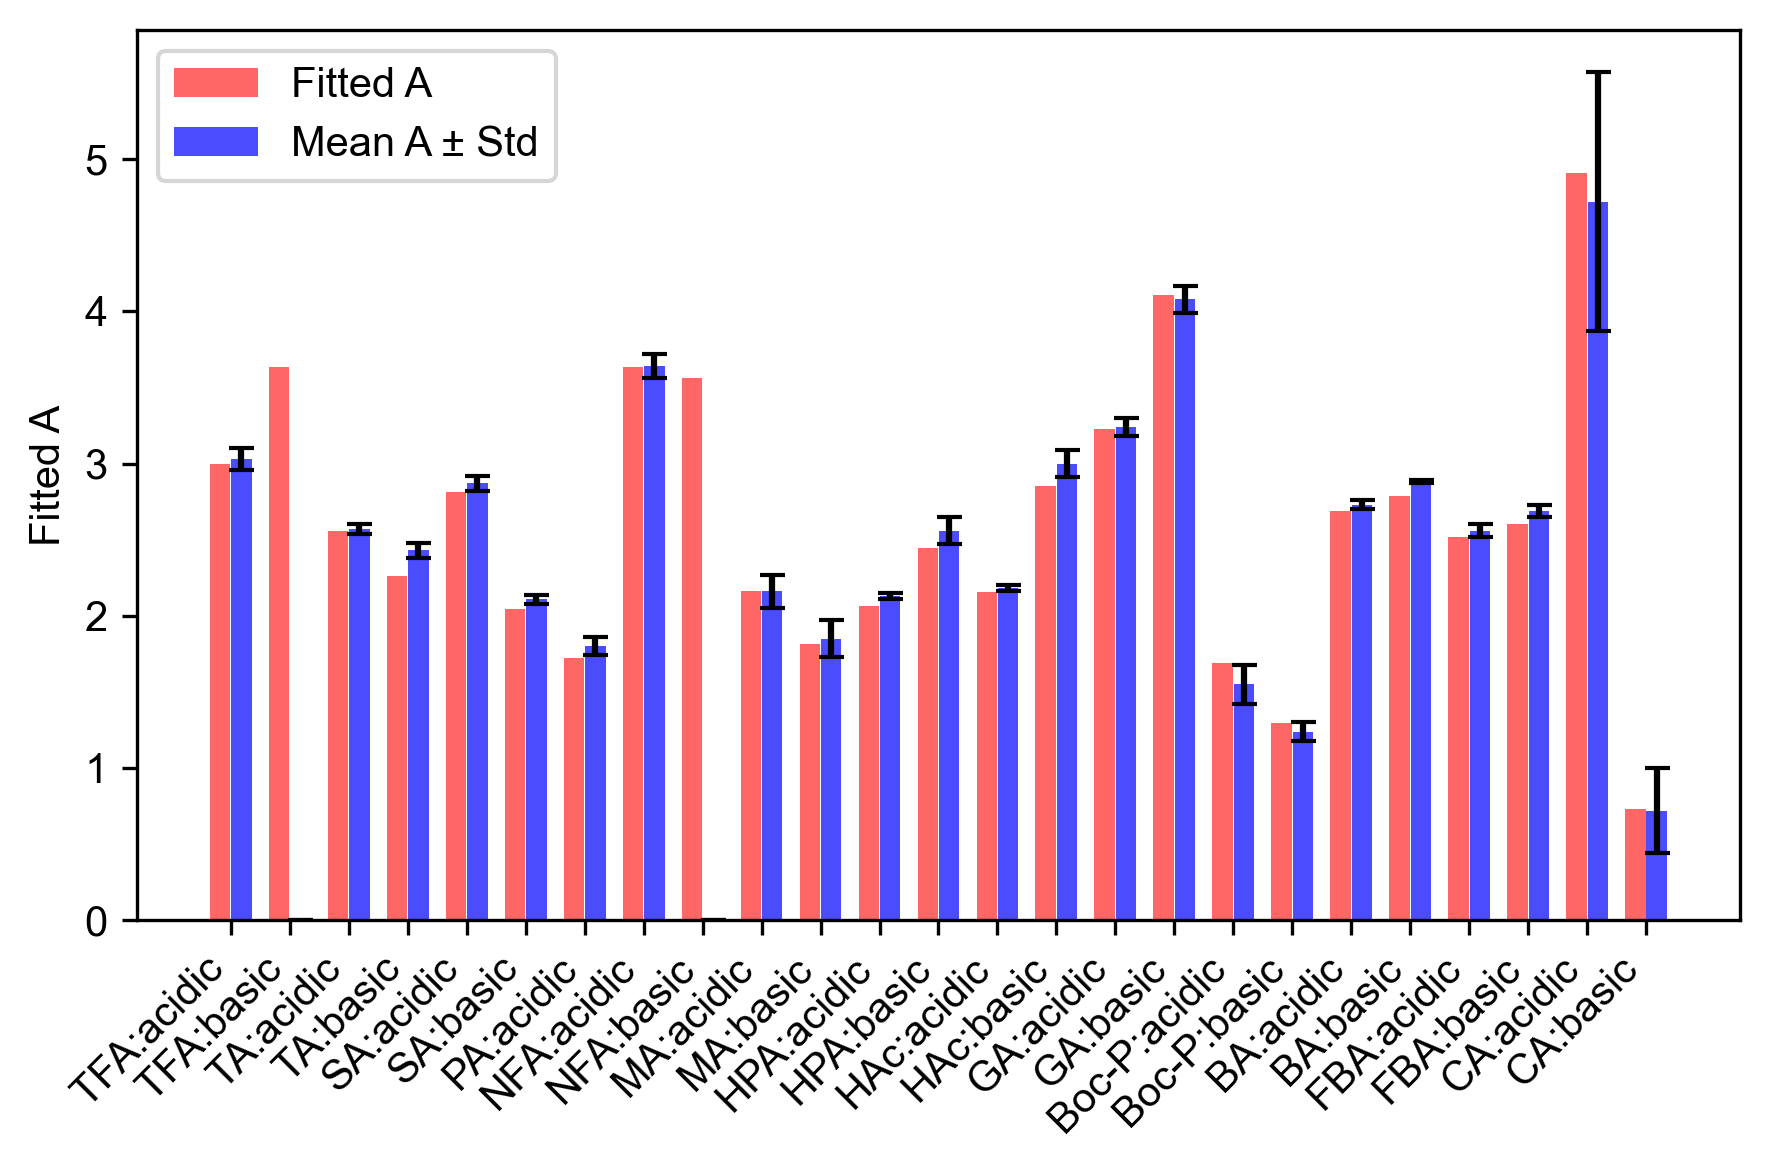

In [19]:
plt.figure(figsize=(6, 4), dpi=300)

# Filter summary_df to only include entries that are in summary1
filtered_df = summary_df[summary_df.index.isin(summary1.index)]

x_pos = np.arange(len(filtered_df))

# Set small offset
offset = 0.18
bar_width = 0.35

# Plot individual A values (red bars) slightly to the left
for i, (idx, row) in enumerate(filtered_df.iterrows()):
    if i < len(filtered_df) - 1:
        plt.bar(x=i - offset, height=row['A'], width=bar_width, color="red", alpha=0.6)
    else:
        plt.bar(x=i - offset, height=row['A'], width=bar_width, color="red", alpha=0.6, label="Fitted A")

# Plot mean A with std (blue bars) slightly to the right
plt.bar(
    x=x_pos + offset,
    height=summary1["mean_A"],
    yerr=summary1["std_A"],
    width=bar_width,
    color="blue",
    alpha=0.7,
    capsize=3,
    label="Mean A ± Std"
)

# Set x-axis labels
xtick_labels = filtered_df["Acid"] + ":" + filtered_df["Experiment"]
plt.xticks(ticks=x_pos, labels=xtick_labels, rotation=45, ha='right')
plt.ylabel("Fitted A")
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

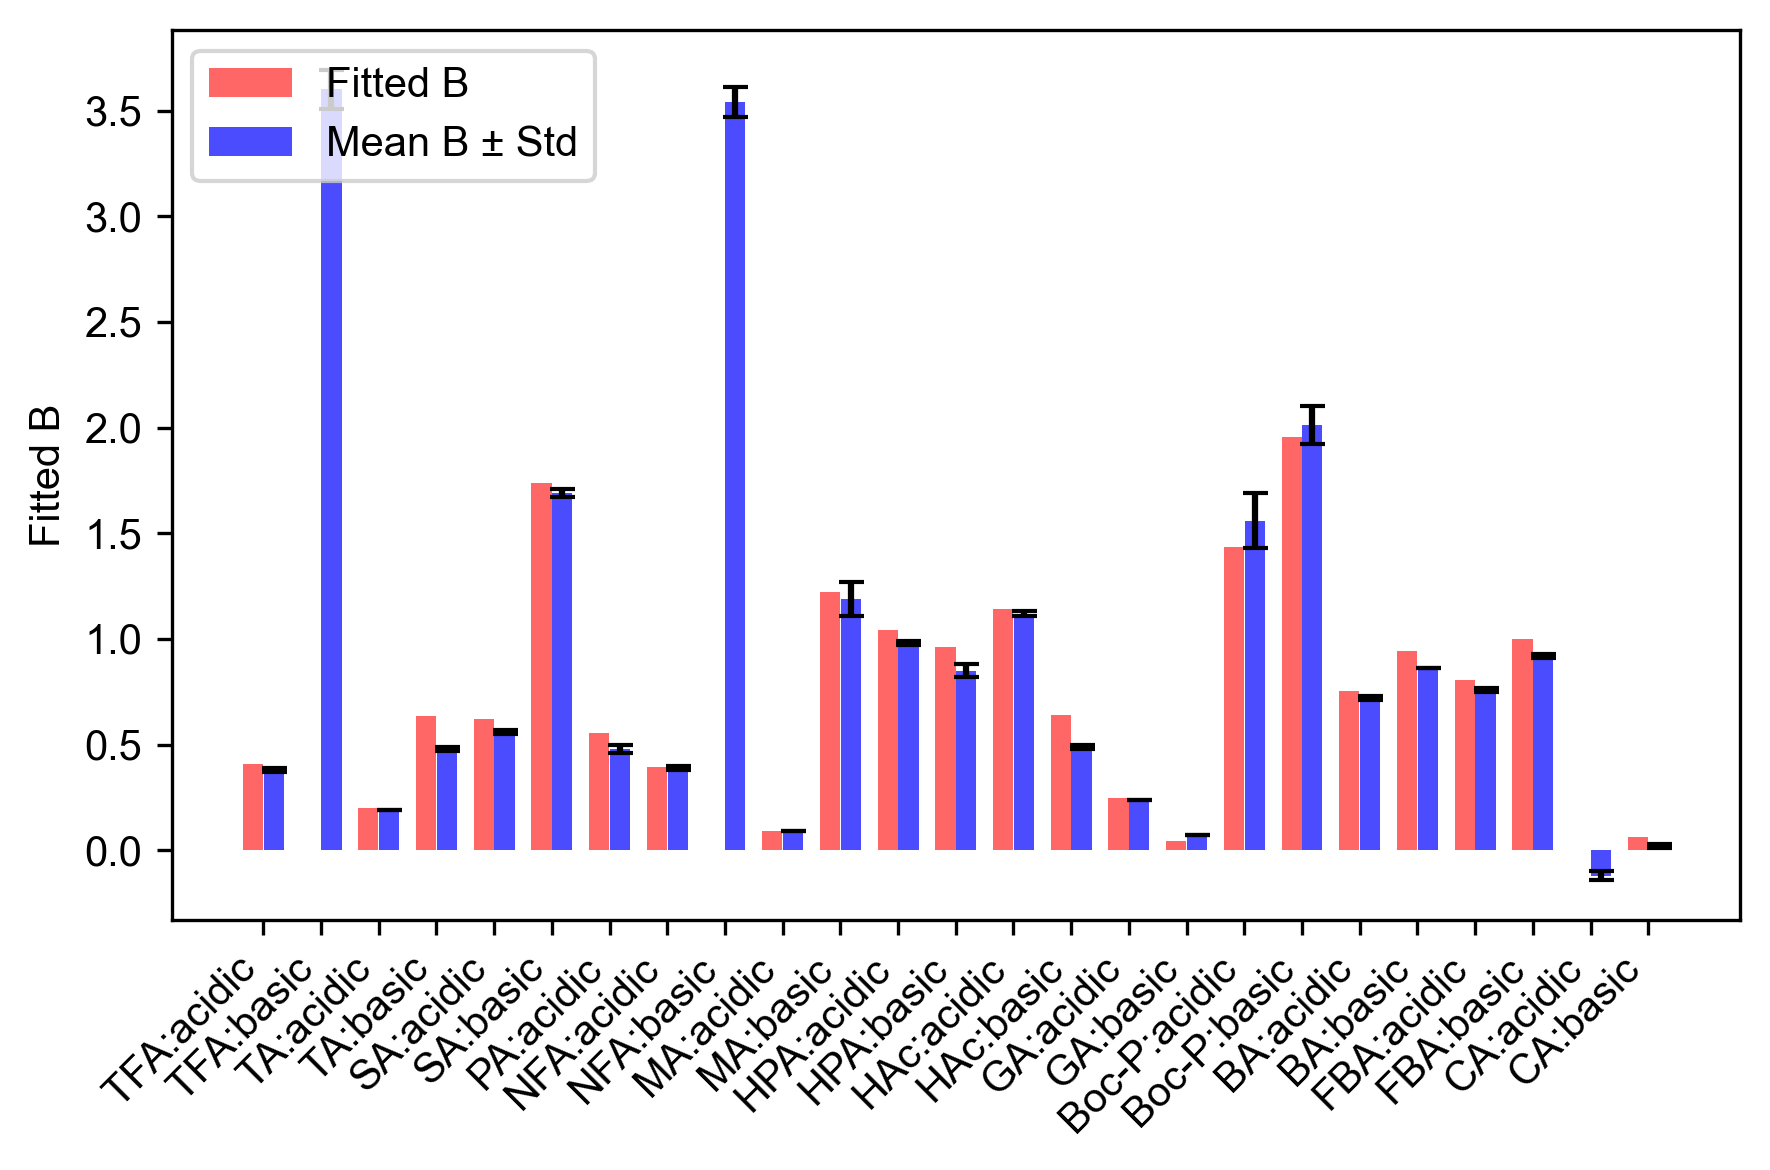

In [20]:
plt.figure(figsize=(6, 4), dpi=300)

# Filter summary_df to only include entries that are in summary1
filtered_df = summary_df[summary_df.index.isin(summary1.index)]

x_pos = np.arange(len(filtered_df))

# Set small offset
offset = 0.18
bar_width = 0.35

# Plot individual A values (red bars) slightly to the left
for i, (idx, row) in enumerate(filtered_df.iterrows()):
    if i < len(filtered_df) - 1:
        plt.bar(x=i - offset, height=row['B'], width=bar_width, color="red", alpha=0.6)
    else:
        plt.bar(x=i - offset, height=row['B'], width=bar_width, color="red", alpha=0.6, label="Fitted B")

# Plot mean A with std (blue bars) slightly to the right
plt.bar(
    x=x_pos + offset,
    height=summary1["mean_B"],
    yerr=summary1["std_B"],
    width=bar_width,
    color="blue",
    alpha=0.7,
    capsize=3,
    label="Mean B ± Std"
)

# Set x-axis labels
xtick_labels = filtered_df["Acid"] + ":" + filtered_df["Experiment"]
plt.xticks(ticks=x_pos, labels=xtick_labels, rotation=45, ha='right')
plt.ylabel("Fitted B")
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

In [21]:
summary_df

Acid Experiment         A             B          k
0     TFA     acidic  2.999279  4.087069e-01  40.457770
1     TFA      basic  3.632548  3.008171e-08   0.005373
2      TA     acidic  2.558390  2.015369e-01  25.636687
3      TA      basic  2.264213  6.347594e-01   3.280415
4      SA     acidic  2.810547  6.211158e-01  16.158399
5      SA      basic  2.045675  1.737817e+00   1.001525
6      PA     acidic  1.721864  5.568682e-01   3.960420
7     NFA     acidic  3.635948  3.919866e-01  39.518878
8     NFA      basic  3.560157  1.703961e-10   0.003856
9      MA     acidic  2.161628  9.011571e-02  18.831399
10     MA      basic  1.811833  1.219893e+00   1.322078
11    HPA     acidic  2.061486  1.042598e+00   5.629201
12    HPA      basic  2.447286  9.627896e-01   6.132335
13    HAc     acidic  2.154912  1.141143e+00   0.827734
14    HAc      basic  2.850119  6.382662e-01   1.196755
15     GA     acidic  3.229689  2.478370e-01   7.297228
16     GA      basic  4.107251  4.197356e-02   6.036039
17  Boc-P     acidic  1.692154  1.433684e+00   1.183433
18  Boc-P      basic  1.297312  1.954441e+00   2.121178
19     BA     acidic  2.690409  7.524434e-01   5.026003
20     BA      basic  2.790146  9.444301e-01   6.986317
21    FBA     acidic  2.517390  8.047397e-01   4.628662
22    FBA      basic  2.602636  9.996699e-01   1.997042
23     CA     acidic  4.912068  2.872875e-18  16.947334
24     CA      basic  0.733207  6.034903e-02   0.525360

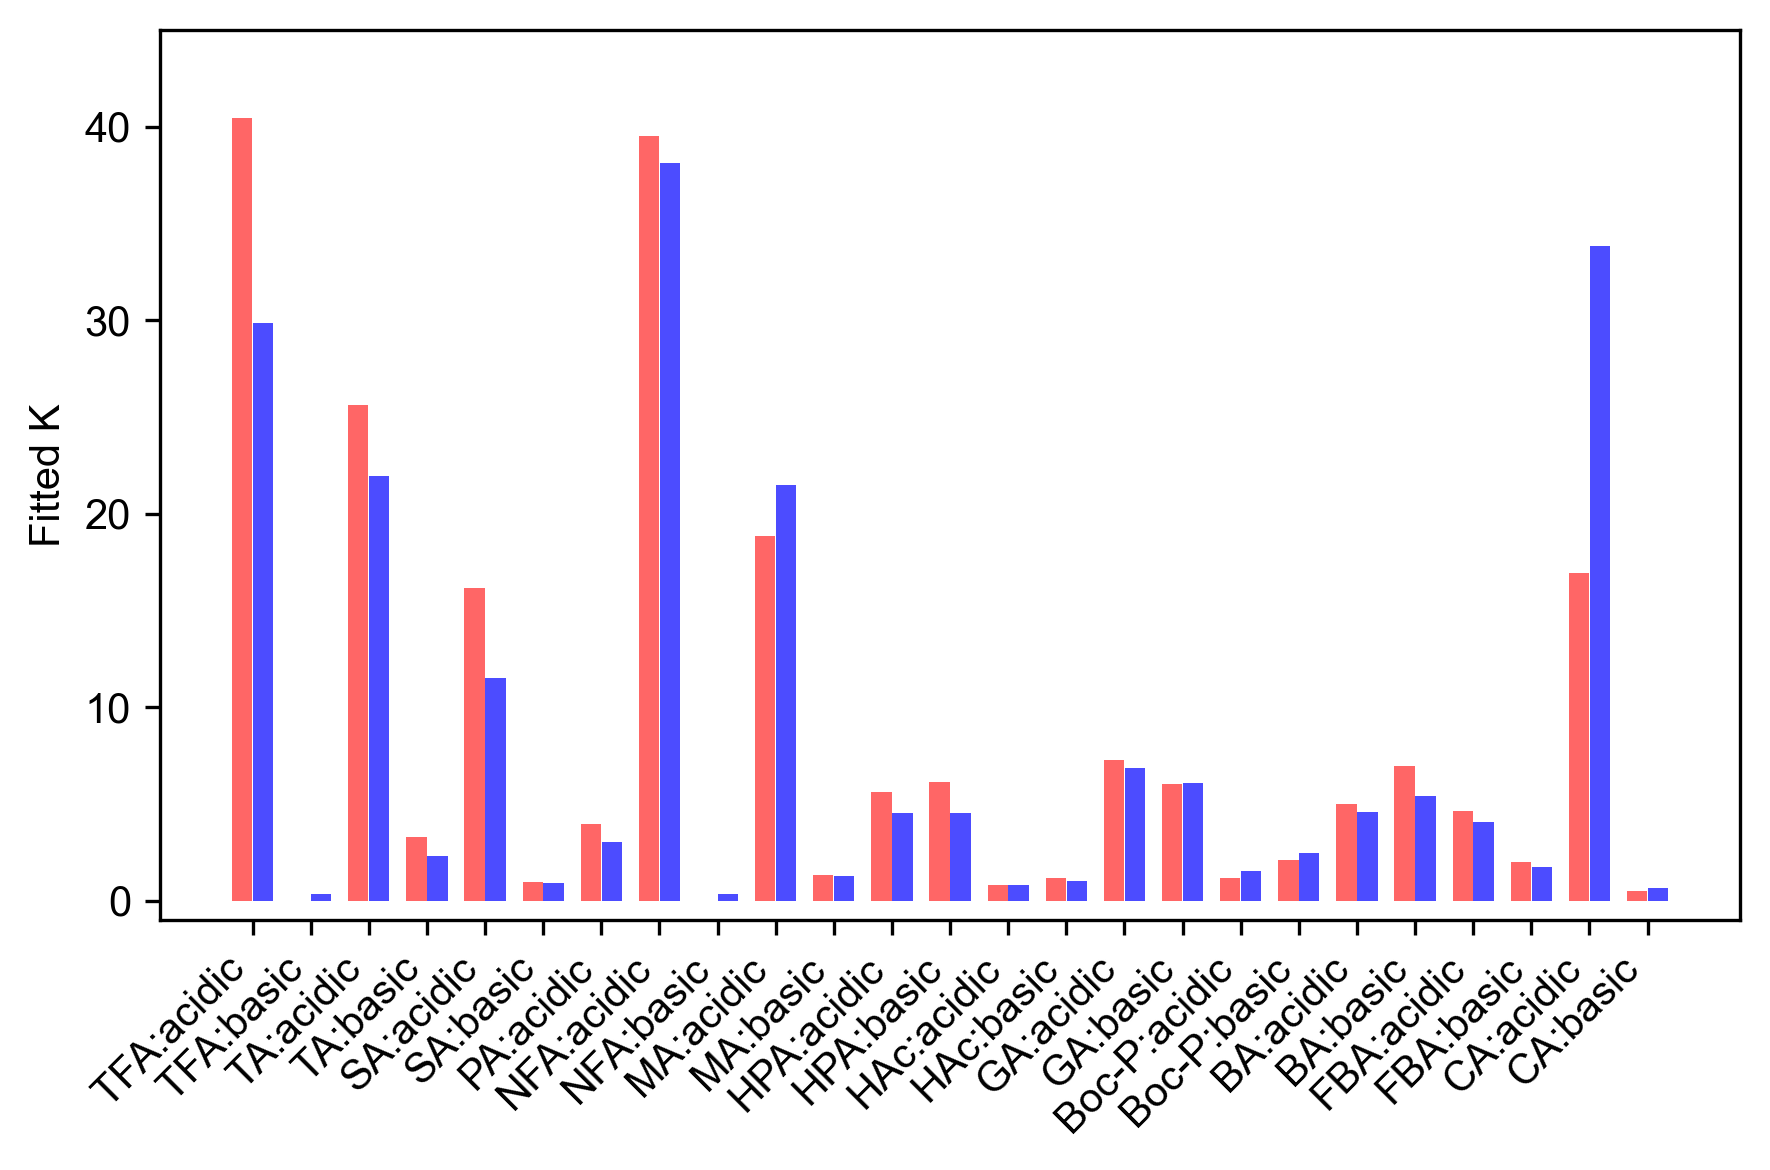

In [22]:
plt.figure(figsize=(6, 4), dpi=300)

x_pos = np.arange(len(summary_df))

# Set small offset
offset = 0.18
bar_width = 0.35

# Plot individual A values (red bars) slightly to the left
for i, A_list in enumerate(summary_df["k"].iloc[:-1]):
    a = A_list
    plt.bar(x= i - offset, height=a, width=bar_width, color="red", alpha=0.6)
    
for i, A_list in enumerate(summary_df["k"].iloc[-1:]):
    a = A_list
    i = len(summary_df["k"]) - 1
    plt.bar(x= i - offset, height=a, width=bar_width, color="red", alpha=0.6)

# Plot mean A with std (blue bars) slightly to the right
plt.bar(
    x=x_pos + offset,
    height=summary1["k"],
    width=bar_width,
    color="blue",
    alpha=0.7,
    capsize=3,
)

# Set x-axis labels
xtick_labels = summary_df["Acid"] + ":" + summary_df["Experiment"]
plt.xticks(ticks=x_pos, labels=xtick_labels, rotation=45, ha='right')

plt.ylabel("Fitted K")
plt.ylim(-1, 45)
plt.tight_layout()
plt.show()

In [23]:
modifiers = pd.read_excel("modifier.xlsx")

acids, cas = modifiers["Unnamed: 2"], modifiers["CAS"]

In [24]:
from rdkit import Chem
from rdkit.Chem import Draw

# cas_to_smile = {}
# import cirpy
# for acid_temp in acids:
#     cas_num_temp = cas[acids == acid_temp].item()
#     smiles_temp = cirpy.resolve(cas_num_temp, 'smiles')
#     cas_to_smile[cas_num_temp] = smiles_temp

cas_to_smile = {
  '65-85-0': 'OC(=O)c1ccccc1',
 '445-29-4': 'OC(=O)c1ccccc1F',
 '79-14-1': 'OCC(O)=O',
 '64-19-7': 'CC(O)=O',
 '2706-90-3': 'OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F',
 '99-50-3': 'OC(=O)c1ccc(O)c(O)c1',
 '69-72-7': 'OC(=O)c1ccccc1O',
 '70-49-5': 'OC(=O)CC(S)C(O)=O',
 '76-05-1': 'OC(=O)C(F)(F)F',
 '4654-08-4': None,
 '59433-50-0': None,
 '141-82-2': 'OC(=O)CC(O)=O',
 '590-47-6': '[OH-].C[N+](C)(C)CC(O)=O',
 '498-40-8': 'NC(C[S](O)(=O)=O)C(O)=O'
 }

cas_to_smile["59433-50-0"] = 'CC(C)(C)OC(=O)N1CCCC1C(O)=O'
cas_to_smile["4654-08-4"]= 'OC(=O)CCCCc1ccc(O)cc1'

In [25]:
cas_to_smile

{'65-85-0': 'OC(=O)c1ccccc1',
 '445-29-4': 'OC(=O)c1ccccc1F',
 '79-14-1': 'OCC(O)=O',
 '64-19-7': 'CC(O)=O',
 '2706-90-3': 'OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F',
 '99-50-3': 'OC(=O)c1ccc(O)c(O)c1',
 '69-72-7': 'OC(=O)c1ccccc1O',
 '70-49-5': 'OC(=O)CC(S)C(O)=O',
 '76-05-1': 'OC(=O)C(F)(F)F',
 '4654-08-4': 'OC(=O)CCCCc1ccc(O)cc1',
 '59433-50-0': 'CC(C)(C)OC(=O)N1CCCC1C(O)=O',
 '141-82-2': 'OC(=O)CC(O)=O',
 '590-47-6': '[OH-].C[N+](C)(C)CC(O)=O',
 '498-40-8': 'NC(C[S](O)(=O)=O)C(O)=O'}

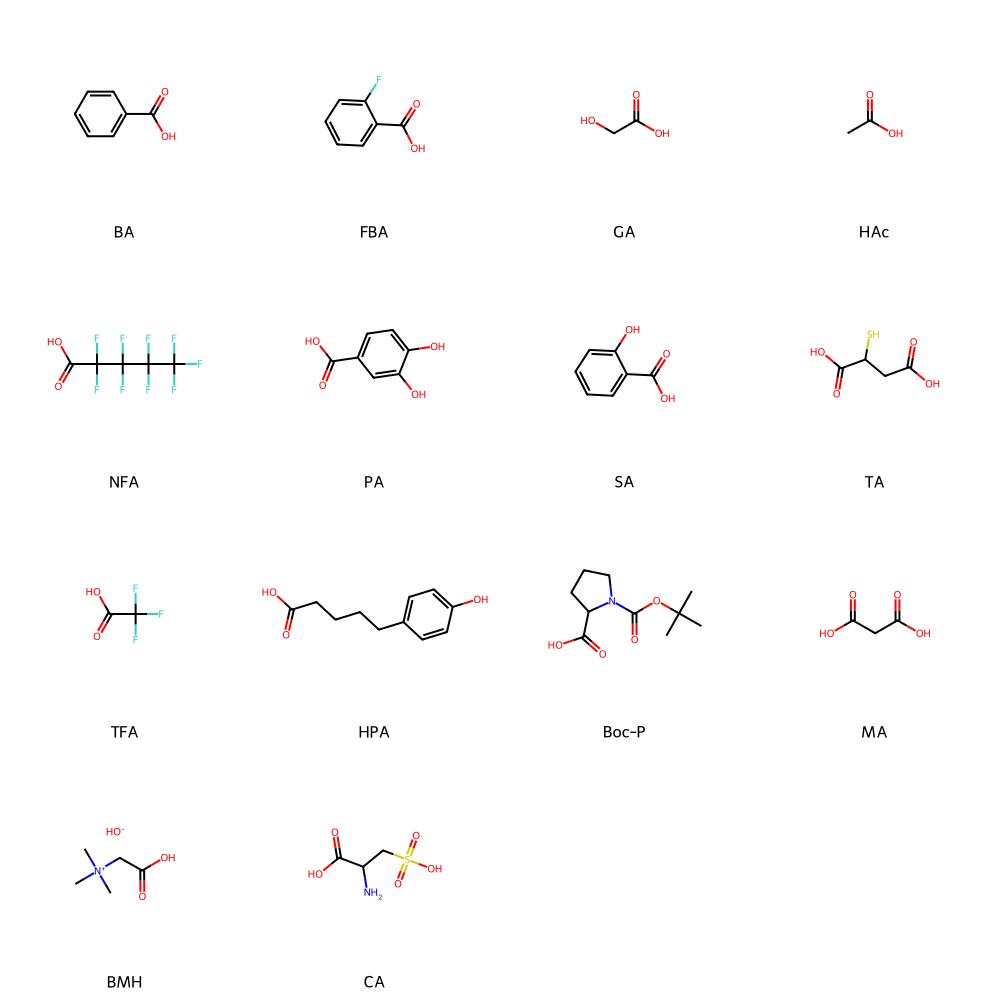

In [26]:
# --- build a list of RDKit molecules ---
mols = []
labels = []           # optional, if you want captions
for acid in acids:    # your `acids` list
    smiles = cas_to_smile[cas[acids == acid].item()]
    if smiles is not None:
        mol = Chem.MolFromSmiles(smiles)
        Chem.rdDepictor.Compute2DCoords(mol)
        mols.append(mol)
        labels.append(acid)          # e.g. use the acid name as a label
        # img = Draw.MolToImage(mol, size=(300, 300), dpi=300)
        # display(img)  # dpi is already set inside MolToImage
        
# --- make one big image (4 × 4 grid here) ---
img = Draw.MolsToGridImage(
    mols,
    molsPerRow=4,        # change grid layout as you like
    subImgSize=(250, 250),
    legends=labels       # omit if you don’t need captions
)

display(img)
# img.show()              # displays inline / opens default viewer
# img.save("all_acids.png")

In [27]:
# searched pKa values 

cas_to_pKa = {
 '65-85-0': 4.20,
 '445-29-4': 3.27,
 '79-14-1': 3.83,
 '64-19-7': 4.76,
 '2706-90-3': 0.40,
 '99-50-3': 4.48,
 '69-72-7': 2.97,
 '70-49-5': 3.49,
 '76-05-1': 0.23,
 '4654-08-4': 4.75,
 '59433-50-0': 4.01,
 '141-82-2': 2.83,
 '590-47-6': 1.83,
 '498-40-8': 1.3
 }

In [28]:
pKa_total = []
for acid_temp in summary_df["Acid"]:
    cas_temp = cas[acids == acid_temp].item()
    pKa_total.append((cas_to_pKa[cas_temp]))
summary_df["pKa"] = pKa_total

In [29]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Descriptors3D import PMI1  # any 3‑D descriptor import sets up 3‑D code

cas_to_volume = {}
cas_to_heavy_atoms = {}
volume_total = [] 
heavy_atom_total = []

for cas_temp, smile_temp in cas_to_smile.items():
    mol = Chem.MolFromSmiles(smile_temp)
    mol = Chem.AddHs(mol)

    # 1. Build a low‑energy conformer
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    AllChem.UFFOptimizeMolecule(mol)

    # 2. Compute van der Waals volume (Å³)
    vol = AllChem.ComputeMolVolume(mol)   # defaults: vdW radii of Alvarez (2008), grid=0.2 Å
    heavy_atom_count = mol.GetNumHeavyAtoms()
    
    cas_to_volume[cas_temp] = vol
    cas_to_heavy_atoms[cas_temp] = heavy_atom_count

for acid_temp in summary_df["Acid"]:
    cas_temp = cas[acids == acid_temp].item()
    volume_total.append(cas_to_volume[cas_temp])
    heavy_atom_total.append(cas_to_heavy_atoms[cas_temp])
    
summary_df["volume"] = volume_total
summary_df["heavy_atom"] = heavy_atom_total
summary_df["f"] = summary_df["A"]/(summary_df["A"] + summary_df["B"])

summary_df["L"] = None
summary_df["B1"] = None
summary_df["B5"] = None

In [30]:
summary_df

Acid Experiment         A             B          k   pKa   volume  \
0     TFA     acidic  2.999279  4.087069e-01  40.457770  0.23   74.016   
1     TFA      basic  3.632548  3.008171e-08   0.005373  0.23   74.016   
2      TA     acidic  2.558390  2.015369e-01  25.636687  3.49  122.528   
3      TA      basic  2.264213  6.347594e-01   3.280415  3.49  122.528   
4      SA     acidic  2.810547  6.211158e-01  16.158399  2.97  121.536   
5      SA      basic  2.045675  1.737817e+00   1.001525  2.97  121.536   
6      PA     acidic  1.721864  5.568682e-01   3.960420  4.48  130.672   
7     NFA     acidic  3.635948  3.919866e-01  39.518878  0.40  156.632   
8     NFA      basic  3.560157  1.703961e-10   0.003856  0.40  156.632   
9      MA     acidic  2.161628  9.011571e-02  18.831399  2.83   86.840   
10     MA      basic  1.811833  1.219893e+00   1.322078  2.83   86.840   
11    HPA     acidic  2.061486  1.042598e+00   5.629201  4.75  189.648   
12    HPA      basic  2.447286  9.627896e-01   6.132335  4.75  189.648   
13    HAc     acidic  2.154912  1.141143e+00   0.827734  4.76   57.728   
14    HAc      basic  2.850119  6.382662e-01   1.196755  4.76   57.728   
15     GA     acidic  3.229689  2.478370e-01   7.297228  3.83   66.624   
16     GA      basic  4.107251  4.197356e-02   6.036039  3.83   66.624   
17  Boc-P     acidic  1.692154  1.433684e+00   1.183433  4.01  207.376   
18  Boc-P      basic  1.297312  1.954441e+00   2.121178  4.01  207.376   
19     BA     acidic  2.690409  7.524434e-01   5.026003  4.20  112.648   
20     BA      basic  2.790146  9.444301e-01   6.986317  4.20  112.648   
21    FBA     acidic  2.517390  8.047397e-01   4.628662  3.27  117.992   
22    FBA      basic  2.602636  9.996699e-01   1.997042  3.27  117.992   
23     CA     acidic  4.912068  2.872875e-18  16.947334  1.30  131.088   
24     CA      basic  0.733207  6.034903e-02   0.525360  1.30  131.088   

    heavy_atom         f     L    B1    B5  
0            7  0.880074  None  None  None  
1            7  1.000000  None  None  None  
2            9  0.926977  None  None  None  
3            9  0.781040  None  None  None  
4           10  0.819004  None  None  None  
5           10  0.540684  None  None  None  
6           11  0.755624  None  None  None  
7           16  0.902683  None  None  None  
8           16  1.000000  None  None  None  
9            7  0.959980  None  None  None  
10           7  0.597624  None  None  None  
11          14  0.664121  None  None  None  
12          14  0.717663  None  None  None  
13           4  0.653785  None  None  None  
14           4  0.817031  None  None  None  
15           5  0.928732  None  None  None  
16           5  0.989884  None  None  None  
17          15  0.541344  None  None  None  
18          15  0.398958  None  None  None  
19           9  0.781448  None  None  None  
20           9  0.747112  None  None  None  
21          10  0.757764  None  None  None  
22          10  0.722492  None  None  None  
23          10  1.000000  None  None  None  
24          10  0.923951  None  None  None

  COOH 1:  L=6.87  B1=1.70  B5=3.26


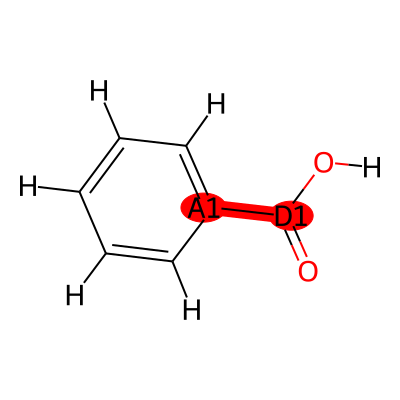

  COOH 1:  L=6.88  B1=1.70  B5=3.88


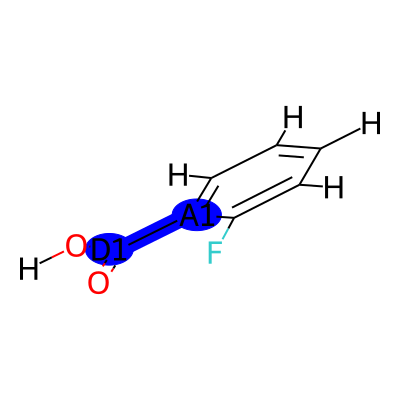

  COOH 1:  L=3.89  B1=1.70  B5=3.00


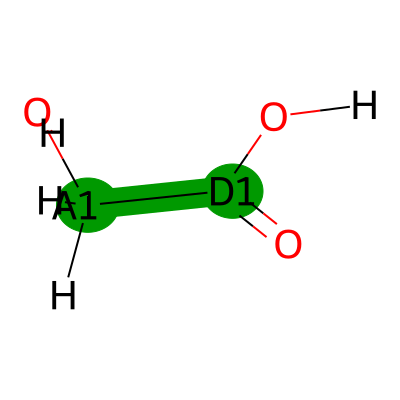

  COOH 1:  L=3.59  B1=1.70  B5=2.73


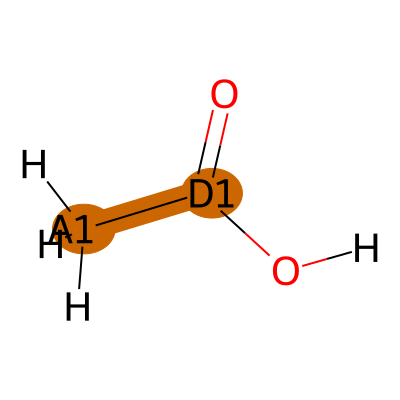

  COOH 1:  L=5.66  B1=2.15  B5=6.43


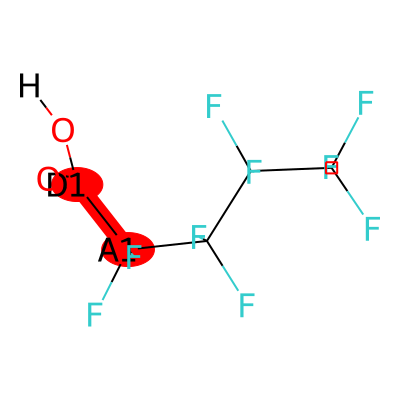

  COOH 1:  L=7.72  B1=1.70  B5=4.40


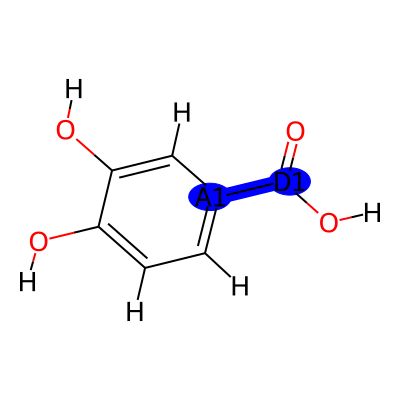

  COOH 1:  L=6.87  B1=1.98  B5=3.98


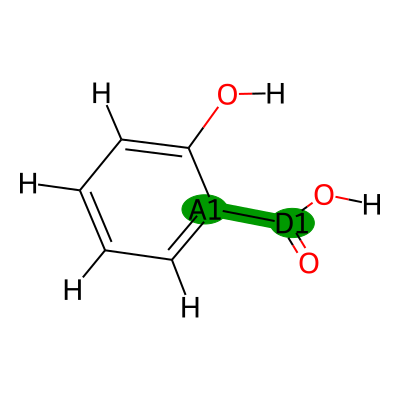

  COOH 1:  L=6.62  B1=1.70  B5=4.58
  COOH 2:  L=6.88  B1=2.40  B5=3.52


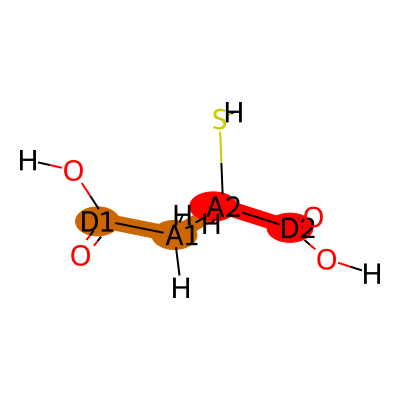

  COOH 1:  L=3.84  B1=2.12  B5=2.77


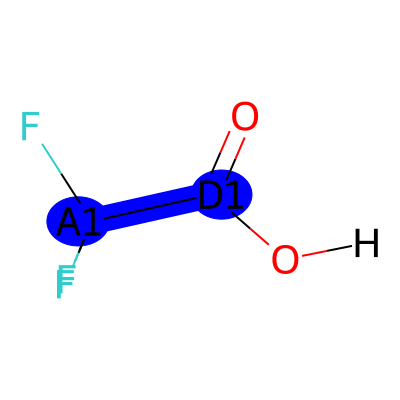

  COOH 1:  L=5.33  B1=1.70  B5=10.17


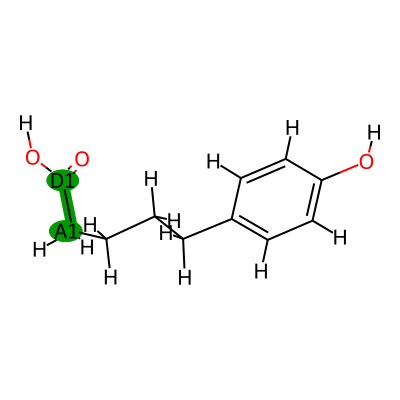

  COOH 1:  L=5.78  B1=2.36  B5=8.06


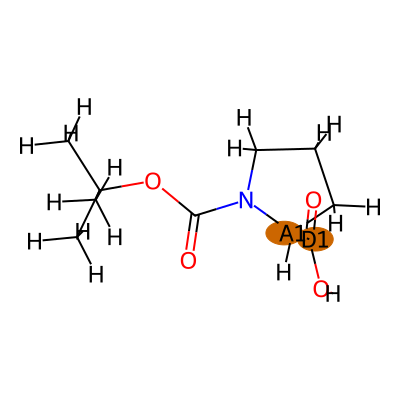

  COOH 1:  L=4.14  B1=1.70  B5=4.37
  COOH 2:  L=4.14  B1=1.70  B5=4.37


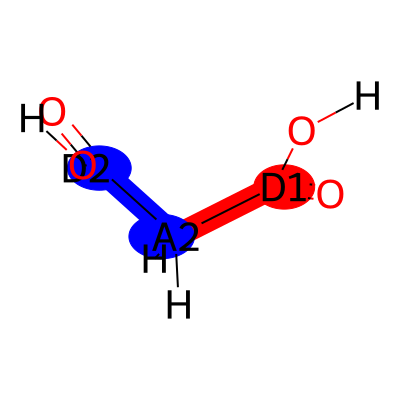

  COOH 1:  L=5.69  B1=1.70  B5=4.45


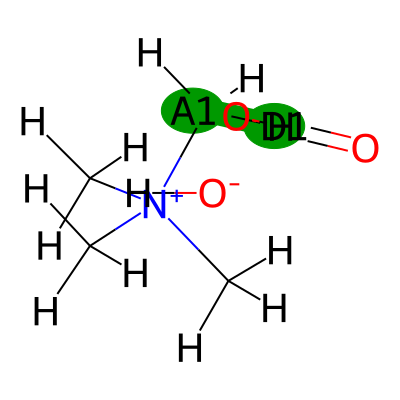

  COOH 1:  L=4.67  B1=2.02  B5=5.47


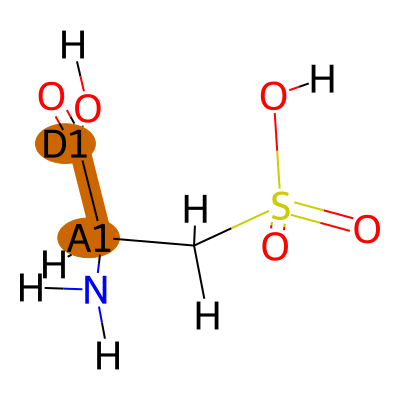

In [31]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import numpy as np
from morfeus import Sterimol
from IPython.display import Image, display
import itertools

acid_smarts = Chem.MolFromSmarts("C(=O)[O;H1]")          # –COOH pattern
color_cycle = itertools.cycle([(1,0,0), (0,0,1), (0,0.6,0), (0.8,0.4,0)])  # red, blue, green, orange
sterimol_records = {}

for cas_temp, smile_temp in cas_to_smile.items():
    mol = Chem.AddHs(Chem.MolFromSmiles(smile_temp))
    matches = mol.GetSubstructMatches(acid_smarts)
    if not matches:
        print(f"{cas_temp}: no COOH found, skipping\n")
        continue

    # build 3-D coordinates once
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    AllChem.UFFOptimizeMolecule(mol)
    conf     = mol.GetConformer()
    elements = [a.GetAtomicNum() for a in mol.GetAtoms()]
    coords   = np.array([conf.GetAtomPosition(i) for i in range(mol.GetNumAtoms())])

    # containers for drawing and printing
    highlight_atoms, atom_colors, atom_labels = [], {}, {}
    sterimol_records[cas_temp] = None 
    
    for idx, match in enumerate(matches, start=1):
        carbonyl_c = match[0]                               # C in C(=O)
        alpha_c = next(nbr.GetIdx() for nbr in mol.GetAtomWithIdx(carbonyl_c).GetNeighbors()
                       if nbr.GetAtomicNum() == 6 and nbr.GetIdx() != carbonyl_c)

        ster = Sterimol(elements, coords,
                        dummy_index    = carbonyl_c + 1,   # 1-based for Morfeus
                        attached_index = alpha_c    + 1)

        if sterimol_records[cas_temp]:
            sterimol_records[cas_temp].append([ster.L_value, ster.B_1_value, ster.B_5_value])
        else:
            sterimol_records[cas_temp] = [[ster.L_value, ster.B_1_value, ster.B_5_value]]

        print(           
             f"  COOH {idx}:  L={ster.L_value:.2f}  "
            f"B1={ster.B_1_value:.2f}  B5={ster.B_5_value:.2f}")
        # drawing helpers
        col = next(color_cycle)
        for at, tag in ((carbonyl_c, f"D{idx}"), (alpha_c, f"A{idx}")):
            highlight_atoms.append(at)
            atom_colors[at] = col
            atom_labels[at] = tag

    # ---- draw once per molecule ----
    drawer = Draw.MolDraw2DCairo(400, 400)
    opts = drawer.drawOptions()
    for at, lbl in atom_labels.items():      # assign labels individually
        opts.atomLabels[at] = lbl
    drawer.DrawMolecule(mol,
                        highlightAtoms=highlight_atoms,
                        highlightAtomColors=atom_colors)
    drawer.FinishDrawing()
    display(Image(data=drawer.GetDrawingText()))

In [32]:
for key_,value_ in sterimol_records.items():
    sterimol_records[key_] = np.array(value_).mean(axis = 0)
display(summary_df)

Acid Experiment         A             B          k   pKa   volume  \
0     TFA     acidic  2.999279  4.087069e-01  40.457770  0.23   74.016   
1     TFA      basic  3.632548  3.008171e-08   0.005373  0.23   74.016   
2      TA     acidic  2.558390  2.015369e-01  25.636687  3.49  122.528   
3      TA      basic  2.264213  6.347594e-01   3.280415  3.49  122.528   
4      SA     acidic  2.810547  6.211158e-01  16.158399  2.97  121.536   
5      SA      basic  2.045675  1.737817e+00   1.001525  2.97  121.536   
6      PA     acidic  1.721864  5.568682e-01   3.960420  4.48  130.672   
7     NFA     acidic  3.635948  3.919866e-01  39.518878  0.40  156.632   
8     NFA      basic  3.560157  1.703961e-10   0.003856  0.40  156.632   
9      MA     acidic  2.161628  9.011571e-02  18.831399  2.83   86.840   
10     MA      basic  1.811833  1.219893e+00   1.322078  2.83   86.840   
11    HPA     acidic  2.061486  1.042598e+00   5.629201  4.75  189.648   
12    HPA      basic  2.447286  9.627896e-01   6.132335  4.75  189.648   
13    HAc     acidic  2.154912  1.141143e+00   0.827734  4.76   57.728   
14    HAc      basic  2.850119  6.382662e-01   1.196755  4.76   57.728   
15     GA     acidic  3.229689  2.478370e-01   7.297228  3.83   66.624   
16     GA      basic  4.107251  4.197356e-02   6.036039  3.83   66.624   
17  Boc-P     acidic  1.692154  1.433684e+00   1.183433  4.01  207.376   
18  Boc-P      basic  1.297312  1.954441e+00   2.121178  4.01  207.376   
19     BA     acidic  2.690409  7.524434e-01   5.026003  4.20  112.648   
20     BA      basic  2.790146  9.444301e-01   6.986317  4.20  112.648   
21    FBA     acidic  2.517390  8.047397e-01   4.628662  3.27  117.992   
22    FBA      basic  2.602636  9.996699e-01   1.997042  3.27  117.992   
23     CA     acidic  4.912068  2.872875e-18  16.947334  1.30  131.088   
24     CA      basic  0.733207  6.034903e-02   0.525360  1.30  131.088   

    heavy_atom         f     L    B1    B5  
0            7  0.880074  None  None  None  
1            7  1.000000  None  None  None  
2            9  0.926977  None  None  None  
3            9  0.781040  None  None  None  
4           10  0.819004  None  None  None  
5           10  0.540684  None  None  None  
6           11  0.755624  None  None  None  
7           16  0.902683  None  None  None  
8           16  1.000000  None  None  None  
9            7  0.959980  None  None  None  
10           7  0.597624  None  None  None  
11          14  0.664121  None  None  None  
12          14  0.717663  None  None  None  
13           4  0.653785  None  None  None  
14           4  0.817031  None  None  None  
15           5  0.928732  None  None  None  
16           5  0.989884  None  None  None  
17          15  0.541344  None  None  None  
18          15  0.398958  None  None  None  
19           9  0.781448  None  None  None  
20           9  0.747112  None  None  None  
21          10  0.757764  None  None  None  
22          10  0.722492  None  None  None  
23          10  1.000000  None  None  None  
24          10  0.923951  None  None  None

In [33]:
# add the sterimol parameters to the dataframe
Ls = []
B1s = []
B5s = []

for acid_temp in summary_df["Acid"]:
    cas_temp = cas[acids == acid_temp].item()
    # assign the sterimol parameters to the dataframe
    Ls.append(sterimol_records[cas_temp][0])
    B1s.append(sterimol_records[cas_temp][1])
    B5s.append(sterimol_records[cas_temp][2])

# assign the sterimol parameters to the dataframe
summary_df["L"] = Ls
summary_df["B1"] = B1s
summary_df["B5"] = B5s
summary_df["A+B"] = summary_df["A"] + summary_df["B"]

display(summary_df)

Acid Experiment         A             B          k   pKa   volume  \
0     TFA     acidic  2.999279  4.087069e-01  40.457770  0.23   74.016   
1     TFA      basic  3.632548  3.008171e-08   0.005373  0.23   74.016   
2      TA     acidic  2.558390  2.015369e-01  25.636687  3.49  122.528   
3      TA      basic  2.264213  6.347594e-01   3.280415  3.49  122.528   
4      SA     acidic  2.810547  6.211158e-01  16.158399  2.97  121.536   
5      SA      basic  2.045675  1.737817e+00   1.001525  2.97  121.536   
6      PA     acidic  1.721864  5.568682e-01   3.960420  4.48  130.672   
7     NFA     acidic  3.635948  3.919866e-01  39.518878  0.40  156.632   
8     NFA      basic  3.560157  1.703961e-10   0.003856  0.40  156.632   
9      MA     acidic  2.161628  9.011571e-02  18.831399  2.83   86.840   
10     MA      basic  1.811833  1.219893e+00   1.322078  2.83   86.840   
11    HPA     acidic  2.061486  1.042598e+00   5.629201  4.75  189.648   
12    HPA      basic  2.447286  9.627896e-01   6.132335  4.75  189.648   
13    HAc     acidic  2.154912  1.141143e+00   0.827734  4.76   57.728   
14    HAc      basic  2.850119  6.382662e-01   1.196755  4.76   57.728   
15     GA     acidic  3.229689  2.478370e-01   7.297228  3.83   66.624   
16     GA      basic  4.107251  4.197356e-02   6.036039  3.83   66.624   
17  Boc-P     acidic  1.692154  1.433684e+00   1.183433  4.01  207.376   
18  Boc-P      basic  1.297312  1.954441e+00   2.121178  4.01  207.376   
19     BA     acidic  2.690409  7.524434e-01   5.026003  4.20  112.648   
20     BA      basic  2.790146  9.444301e-01   6.986317  4.20  112.648   
21    FBA     acidic  2.517390  8.047397e-01   4.628662  3.27  117.992   
22    FBA      basic  2.602636  9.996699e-01   1.997042  3.27  117.992   
23     CA     acidic  4.912068  2.872875e-18  16.947334  1.30  131.088   
24     CA      basic  0.733207  6.034903e-02   0.525360  1.30  131.088   

    heavy_atom         f         L        B1         B5       A+B  
0            7  0.880074  3.837161  2.119826   2.773729  3.407986  
1            7  1.000000  3.837161  2.119826   2.773729  3.632548  
2            9  0.926977  6.750535  2.050676   4.053448  2.759927  
3            9  0.781040  6.750535  2.050676   4.053448  2.898973  
4           10  0.819004  6.865941  1.976705   3.982123  3.431663  
5           10  0.540684  6.865941  1.976705   3.982123  3.783492  
6           11  0.755624  7.719435  1.700061   4.401963  2.278732  
7           16  0.902683  5.662479  2.153604   6.426410  4.027935  
8           16  1.000000  5.662479  2.153604   6.426410  3.560157  
9            7  0.959980  4.138747  1.700000   4.365556  2.251744  
10           7  0.597624  4.138747  1.700000   4.365556  3.031726  
11          14  0.664121  5.328644  1.700000  10.166941  3.104084  
12          14  0.717663  5.328644  1.700000  10.166941  3.410076  
13           4  0.653785  3.591054  1.700000   2.725687  3.296055  
14           4  0.817031  3.591054  1.700000   2.725687  3.488385  
15           5  0.928732  3.894526  1.700000   2.998439  3.477526  
16           5  0.989884  3.894526  1.700000   2.998439  4.149225  
17          15  0.541344  5.783335  2.360542   8.064018  3.125838  
18          15  0.398958  5.783335  2.360542   8.064018  3.251752  
19           9  0.781448  6.873292  1.700428   3.262468  3.442852  
20           9  0.747112  6.873292  1.700428   3.262468  3.734576  
21          10  0.757764  6.879204  1.700134   3.880429  3.322129  
22          10  0.722492  6.879204  1.700134   3.880429  3.602306  
23          10  1.000000  4.674520  2.020445   5.472956  4.912068  
24          10  0.923951  4.674520  2.020445   5.472956  0.793556

### Deal with acid conditions

Acid Experiment         A             B          k   pKa   volume  \
0     TFA     acidic  2.999279  4.087069e-01  40.457770  0.23   74.016   
2      TA     acidic  2.558390  2.015369e-01  25.636687  3.49  122.528   
4      SA     acidic  2.810547  6.211158e-01  16.158399  2.97  121.536   
6      PA     acidic  1.721864  5.568682e-01   3.960420  4.48  130.672   
7     NFA     acidic  3.635948  3.919866e-01  39.518878  0.40  156.632   
9      MA     acidic  2.161628  9.011571e-02  18.831399  2.83   86.840   
11    HPA     acidic  2.061486  1.042598e+00   5.629201  4.75  189.648   
13    HAc     acidic  2.154912  1.141143e+00   0.827734  4.76   57.728   
15     GA     acidic  3.229689  2.478370e-01   7.297228  3.83   66.624   
17  Boc-P     acidic  1.692154  1.433684e+00   1.183433  4.01  207.376   
19     BA     acidic  2.690409  7.524434e-01   5.026003  4.20  112.648   
21    FBA     acidic  2.517390  8.047397e-01   4.628662  3.27  117.992   
23     CA     acidic  4.912068  2.872875e-18  16.947334  1.30  131.088   

    heavy_atom         f         L        B1         B5       A+B  
0            7  0.880074  3.837161  2.119826   2.773729  3.407986  
2            9  0.926977  6.750535  2.050676   4.053448  2.759927  
4           10  0.819004  6.865941  1.976705   3.982123  3.431663  
6           11  0.755624  7.719435  1.700061   4.401963  2.278732  
7           16  0.902683  5.662479  2.153604   6.426410  4.027935  
9            7  0.959980  4.138747  1.700000   4.365556  2.251744  
11          14  0.664121  5.328644  1.700000  10.166941  3.104084  
13           4  0.653785  3.591054  1.700000   2.725687  3.296055  
15           5  0.928732  3.894526  1.700000   2.998439  3.477526  
17          15  0.541344  5.783335  2.360542   8.064018  3.125838  
19           9  0.781448  6.873292  1.700428   3.262468  3.442852  
21          10  0.757764  6.879204  1.700134   3.880429  3.322129  
23          10  1.000000  4.674520  2.020445   5.472956  4.912068

pKa    volume  heavy_atom         L            B1        B5  \
pKa         0.000000  0.752618    0.654725  0.383489  5.574507e-02  0.704964   
volume      0.752618  0.000000    0.000002  0.109828  1.166251e-01  0.000038   
heavy_atom  0.654725  0.000002    0.000000  0.090340  8.699575e-02  0.000782   
L           0.383489  0.109828    0.090340  0.000000  9.865606e-01  0.714921   
B1          0.055745  0.116625    0.086996  0.986561  8.559986e-86  0.352021   
B5          0.704964  0.000038    0.000782  0.714921  3.520209e-01  0.000000   
A+B         0.066752  0.839324    0.662339  0.430632  2.694781e-01  0.854607   
k           0.000068  0.680718    0.733269  0.520472  8.175217e-02  0.696052   
f           0.025829  0.124154    0.309952  0.494674  9.351360e-01  0.173947   

                     A+B         k         f  
pKa         6.675238e-02  0.000068  0.025829  
volume      8.393236e-01  0.680718  0.124154  
heavy_atom  6.623386e-01  0.733269  0.309952  
L           4.306317e-01  0.520472  0.494674  
B1          2.694781e-01  0.081752  0.935136  
B5          8.546069e-01  0.696052  0.173947  
A+B         8.559986e-86  0.439056  0.365612  
k           4.390560e-01  0.000000  0.021498  
f           3.656121e-01  0.021498  0.000000

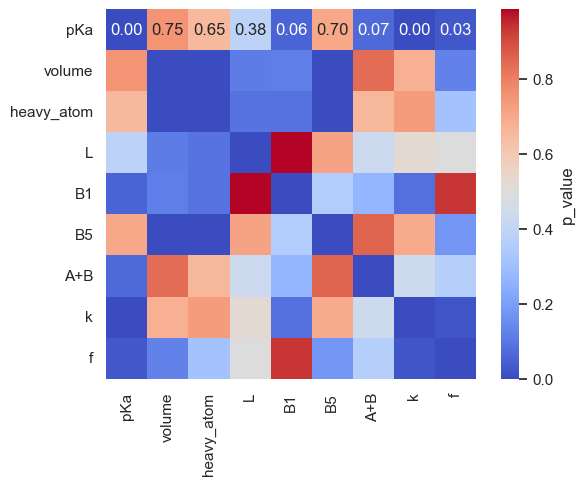

In [34]:
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import seaborn as sns

sns.set(font="Arial")

mask = (summary_df["Experiment"] == "acidic")

cols = ["pKa", "volume", "heavy_atom", "L", "B1", "B5", "A+B", "k", "f"]
corr_P  = (summary_df.loc[mask])[cols].corr(method="pearson")    # linear    (–1 … +1)
corr_S  =  (summary_df.loc[mask])[cols].corr(method="spearman")   # monotonic (–1 … +1)

display(summary_df.loc[mask])

# Optional: p‑values for the Pearson coefficients
pvals = pd.DataFrame(
    [[stats.pearsonr((summary_df.loc[mask])[a],  (summary_df.loc[mask])[b]).pvalue for b in cols] for a in cols],
    columns=cols, index=cols
)

sns.heatmap(pvals, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"label": "p_value"})
display(pvals)
plt.show()

### deal with A + B

[[3.40798637]
 [2.75992663]
 [3.431663  ]
 [2.27873207]
 [4.02793458]
 [2.25174357]
 [3.10408412]
 [3.29605522]
 [3.47752647]
 [3.12583834]
 [3.44285206]
 [3.32212931]
 [4.91206751]]


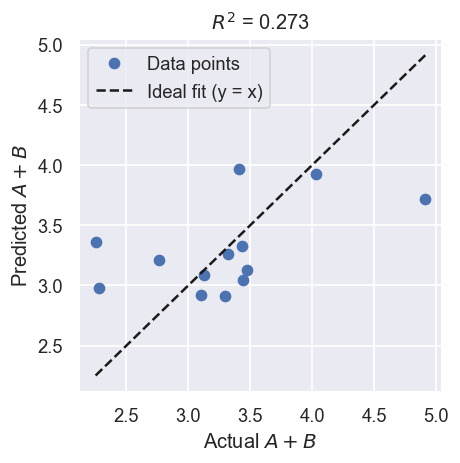

In [35]:
X = (summary_df.loc[mask])[["pKa"]].values
y = (summary_df.loc[mask])[["A+B"]].values

print(y)
# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)

# Plot: predicted vs actual
r2 = r2_score(y, y_pred)
plt.figure(figsize=(4, 4), dpi=120)
plt.plot(y, y_pred, 'o', label="Data points")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label="Ideal fit (y = x)")
plt.xlabel("Actual $A+B$")
plt.ylabel("Predicted $A+B$")
plt.title("Prediction vs Actual")
plt.legend()
plt.tight_layout()
plt.title(f"$R^2$ = {r2:.3f}")
plt.show()

### deal with K vs pKa, or B1

[[40.45776999]
 [25.63668728]
 [16.15839855]
 [ 3.96042016]
 [39.51887831]
 [18.83139934]
 [ 5.62920138]
 [ 0.82773358]
 [ 7.29722799]
 [ 1.18343333]
 [ 5.0260026 ]
 [ 4.62866233]
 [16.94733388]]


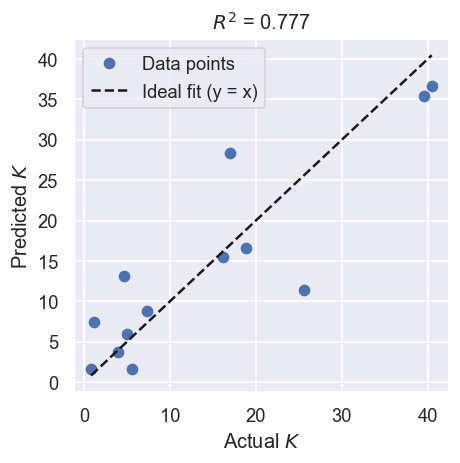

In [36]:
X = (summary_df.loc[mask])[["pKa"]].values
y = (summary_df.loc[mask])[["k"]].values

print(y)
# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)

# Plot: predicted vs actual
r2 = r2_score(y, y_pred)
plt.figure(figsize=(4, 4), dpi=120)
plt.plot(y, y_pred, 'o', label="Data points")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label="Ideal fit (y = x)")
plt.xlabel("Actual $K$")
plt.ylabel("Predicted $K$")
plt.title("Prediction vs Actual")
plt.legend()
plt.tight_layout()
plt.title(f"$R^2$ = {r2:.3f}")
plt.show()

### deal with f

[[0.88007378]
 [0.92697745]
 [0.81900443]
 [0.75562368]
 [0.90268298]
 [0.95997959]
 [0.66412053]
 [0.65378512]
 [0.92873181]
 [0.54134404]
 [0.78144765]
 [0.75776389]
 [1.        ]]


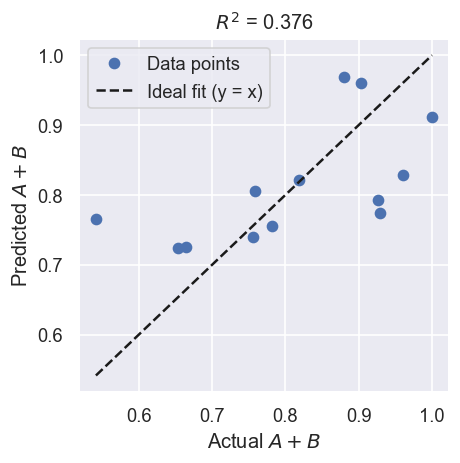

In [37]:
X = (summary_df.loc[mask])[["pKa"]].values
y = (summary_df.loc[mask])[["f"]].values

print(y)
# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)

# Plot: predicted vs actual
r2 = r2_score(y, y_pred)
plt.figure(figsize=(4, 4), dpi=120)
plt.plot(y, y_pred, 'o', label="Data points")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label="Ideal fit (y = x)")
plt.xlabel("Actual $A+B$")
plt.ylabel("Predicted $A+B$")
plt.title("Prediction vs Actual")
plt.legend()
plt.tight_layout()
plt.title(f"$R^2$ = {r2:.3f}")
plt.show()

### Deal with basic conditions

Acid Experiment         A             B         k   pKa   volume  \
1     TFA      basic  3.632548  3.008171e-08  0.005373  0.23   74.016   
3      TA      basic  2.264213  6.347594e-01  3.280415  3.49  122.528   
5      SA      basic  2.045675  1.737817e+00  1.001525  2.97  121.536   
8     NFA      basic  3.560157  1.703961e-10  0.003856  0.40  156.632   
10     MA      basic  1.811833  1.219893e+00  1.322078  2.83   86.840   
12    HPA      basic  2.447286  9.627896e-01  6.132335  4.75  189.648   
14    HAc      basic  2.850119  6.382662e-01  1.196755  4.76   57.728   
16     GA      basic  4.107251  4.197356e-02  6.036039  3.83   66.624   
18  Boc-P      basic  1.297312  1.954441e+00  2.121178  4.01  207.376   
20     BA      basic  2.790146  9.444301e-01  6.986317  4.20  112.648   
22    FBA      basic  2.602636  9.996699e-01  1.997042  3.27  117.992   
24     CA      basic  0.733207  6.034903e-02  0.525360  1.30  131.088   

    heavy_atom         f         L        B1         B5       A+B  
1            7  1.000000  3.837161  2.119826   2.773729  3.632548  
3            9  0.781040  6.750535  2.050676   4.053448  2.898973  
5           10  0.540684  6.865941  1.976705   3.982123  3.783492  
8           16  1.000000  5.662479  2.153604   6.426410  3.560157  
10           7  0.597624  4.138747  1.700000   4.365556  3.031726  
12          14  0.717663  5.328644  1.700000  10.166941  3.410076  
14           4  0.817031  3.591054  1.700000   2.725687  3.488385  
16           5  0.989884  3.894526  1.700000   2.998439  4.149225  
18          15  0.398958  5.783335  2.360542   8.064018  3.251752  
20           9  0.747112  6.873292  1.700428   3.262468  3.734576  
22          10  0.722492  6.879204  1.700134   3.880429  3.602306  
24          10  0.923951  4.674520  2.020445   5.472956  0.793556

pKa    volume  heavy_atom         L        B1        B5  \
pKa         0.000000  0.796880    0.595150  0.607196  0.090212  0.673231   
volume      0.796880  0.000000    0.000006  0.103995  0.106979  0.000065   
heavy_atom  0.595150  0.000006    0.000000  0.097123  0.071533  0.001047   
L           0.607196  0.103995    0.097123  0.000000  0.663886  0.627271   
B1          0.090212  0.106979    0.071533  0.663886  0.000000  0.384482   
B5          0.673231  0.000065    0.001047  0.627271  0.384482  0.000000   
A+B         0.357065  0.558098    0.730771  0.740872  0.451030  0.532425   
k           0.014880  0.771745    0.852259  0.510103  0.085866  0.662062   

                 A+B         k  
pKa         0.357065  0.014880  
volume      0.558098  0.771745  
heavy_atom  0.730771  0.852259  
L           0.740872  0.510103  
B1          0.451030  0.085866  
B5          0.532425  0.662062  
A+B         0.000000  0.293224  
k           0.293224  0.000000

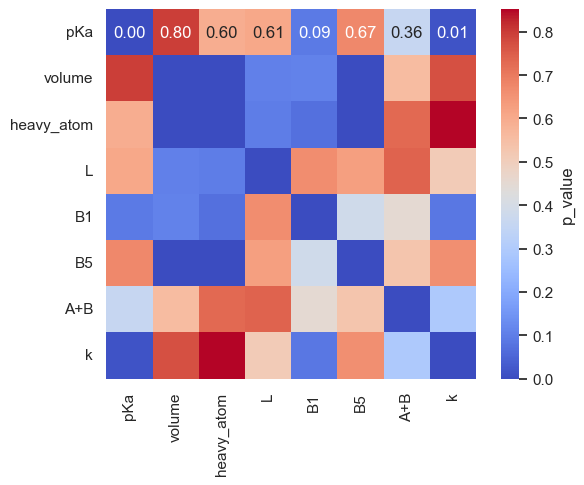

In [38]:
mask = (summary_df["Experiment"] == "basic")
# mask = mask * (summary_df["k"] >0.1) # ensure the f is sensible
cols = ["pKa", "volume", "heavy_atom", "L", "B1", "B5", "A+B", "k"]
corr_P  = (summary_df.loc[mask])[cols].corr(method="pearson")    # linear    (–1 … +1)
corr_S  =  (summary_df.loc[mask])[cols].corr(method="spearman")   # monotonic (–1 … +1)

display(summary_df.loc[mask])

# Optional: p‑values for the Pearson coefficients
pvals = pd.DataFrame(
    [[stats.pearsonr((summary_df.loc[mask])[a],  (summary_df.loc[mask])[b]).pvalue for b in cols] for a in cols],
    columns=cols, index=cols
)

sns.heatmap(pvals, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"label": "p_value"})
display(pvals)
plt.show()

[[5.37335070e-03]
 [3.28041523e+00]
 [1.00152524e+00]
 [3.85588628e-03]
 [1.32207757e+00]
 [6.13233516e+00]
 [1.19675538e+00]
 [6.03603928e+00]
 [2.12117816e+00]
 [6.98631681e+00]
 [1.99704213e+00]
 [5.25359621e-01]]


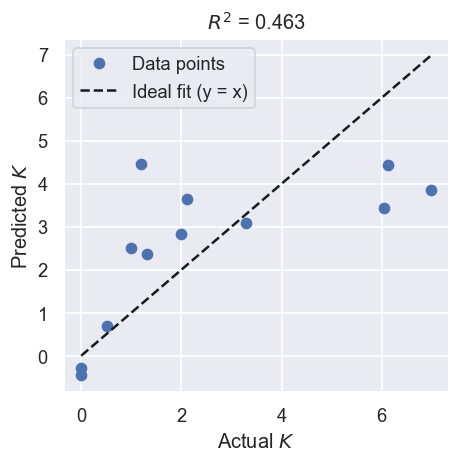

In [39]:
X = (summary_df.loc[mask])[["pKa"]].values
y = (summary_df.loc[mask])[["k"]].values

print(y)
# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)

# Plot: predicted vs actual
r2 = r2_score(y, y_pred)
plt.figure(figsize=(4, 4), dpi=120)
plt.plot(y, y_pred, 'o', label="Data points")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label="Ideal fit (y = x)")
plt.xlabel("Actual $K$")
plt.ylabel("Predicted $K$")
plt.title("Prediction vs Actual")
plt.legend()
plt.tight_layout()
plt.title(f"$R^2$ = {r2:.3f}")
plt.show()

# # Predict using the trained model
# y_pred = model.predict(X)

# # Step 3: Create grid
# pKa_range = np.linspace(X[:,0].min()*0.9, X[:,0].max()*1.1, 100)
# vol_range = np.linspace(X[:,1].min()*0.9, X[:,1].max()*1.1, 100)
# pKa_grid, vol_grid = np.meshgrid(pKa_range, vol_range)
# X_grid = np.c_[pKa_grid.ravel(), vol_grid.ravel()]

# # Step 4: Predict on grid
# f_grid = model.predict(X_grid).reshape(pKa_grid.shape)

# # Step 5: Plot
# plt.figure(figsize=(5, 4), dpi=150)
# contour = plt.contourf(pKa_grid, vol_grid, f_grid, levels=15, cmap='coolwarm')
# plt.colorbar(contour, label="$f$")
# plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha =1, s=50)
# plt.xlabel("pKa")
# plt.ylabel("B1")
# plt.tight_layout()
# plt.show()


### deal with f

Acid Experiment         A         B         k   pKa   volume  heavy_atom  \
3      TA      basic  2.264213  0.634759  3.280415  3.49  122.528           9   
5      SA      basic  2.045675  1.737817  1.001525  2.97  121.536          10   
10     MA      basic  1.811833  1.219893  1.322078  2.83   86.840           7   
12    HPA      basic  2.447286  0.962790  6.132335  4.75  189.648          14   
14    HAc      basic  2.850119  0.638266  1.196755  4.76   57.728           4   
16     GA      basic  4.107251  0.041974  6.036039  3.83   66.624           5   
18  Boc-P      basic  1.297312  1.954441  2.121178  4.01  207.376          15   
20     BA      basic  2.790146  0.944430  6.986317  4.20  112.648           9   
22    FBA      basic  2.602636  0.999670  1.997042  3.27  117.992          10   
24     CA      basic  0.733207  0.060349  0.525360  1.30  131.088          10   

           f         L        B1         B5       A+B  
3   0.781040  6.750535  2.050676   4.053448  2.898973  
5   0.540684  6.865941  1.976705   3.982123  3.783492  
10  0.597624  4.138747  1.700000   4.365556  3.031726  
12  0.717663  5.328644  1.700000  10.166941  3.410076  
14  0.817031  3.591054  1.700000   2.725687  3.488385  
16  0.989884  3.894526  1.700000   2.998439  4.149225  
18  0.398958  5.783335  2.360542   8.064018  3.251752  
20  0.747112  6.873292  1.700428   3.262468  3.734576  
22  0.722492  6.879204  1.700134   3.880429  3.602306  
24  0.923951  4.674520  2.020445   5.472956  0.793556

pKa        volume    heavy_atom             L        B1  \
pKa         0.000000  8.660828e-01  9.964039e-01  9.367146e-01  0.447248   
volume      0.866083  1.701606e-61  9.012838e-08  2.162660e-01  0.061882   
heavy_atom  0.996404  9.012838e-08  0.000000e+00  1.266984e-01  0.087886   
L           0.936715  2.162660e-01  1.266984e-01  1.063504e-62  0.434704   
B1          0.447248  6.188151e-02  8.788612e-02  4.347038e-01  0.000000   
B5          0.664735  6.307406e-04  1.976536e-03  8.880139e-01  0.327852   
A+B         0.015278  6.000816e-01  6.323178e-01  6.499329e-01  0.298774   
f           0.722917  8.827578e-02  7.202465e-02  2.571769e-01  0.146070   

                      B5       A+B         f  
pKa         6.647350e-01  0.015278  0.722917  
volume      6.307406e-04  0.600082  0.088276  
heavy_atom  1.976536e-03  0.632318  0.072025  
L           8.880139e-01  0.649933  0.257177  
B1          3.278521e-01  0.298774  0.146070  
B5          1.063504e-62  0.578809  0.258183  
A+B         5.788092e-01  0.000000  0.556212  
f           2.581831e-01  0.556212  0.000000

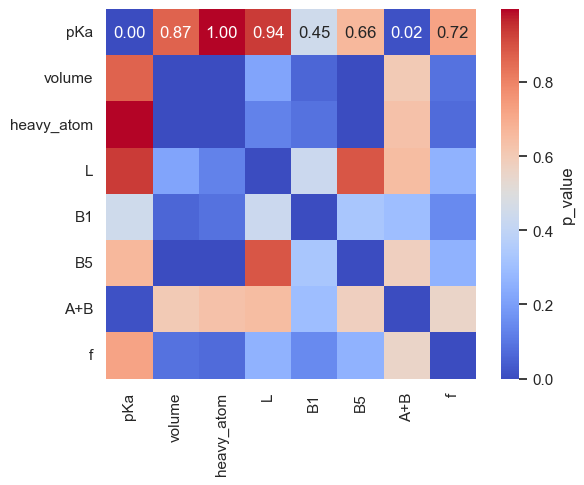

In [40]:
mask = (summary_df["Experiment"] == "basic")
mask = mask * (summary_df["k"] >0.1) # ensure the f is sensible
cols = ["pKa", "volume", "heavy_atom", "L", "B1", "B5", "A+B", "f"]
corr_P  = (summary_df.loc[mask])[cols].corr(method="pearson")    # linear    (–1 … +1)
corr_S  =  (summary_df.loc[mask])[cols].corr(method="spearman")   # monotonic (–1 … +1)

display(summary_df.loc[mask])

# Optional: p‑values for the Pearson coefficients
pvals = pd.DataFrame(
    [[stats.pearsonr((summary_df.loc[mask])[a],  (summary_df.loc[mask])[b]).pvalue for b in cols] for a in cols],
    columns=cols, index=cols
)

sns.heatmap(pvals, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"label": "p_value"})
display(pvals)
plt.show()

[[0.78103989]
 [0.54068431]
 [0.59762423]
 [0.71766328]
 [0.81703104]
 [0.989884  ]
 [0.39895766]
 [0.74711181]
 [0.72249164]
 [0.92395111]]


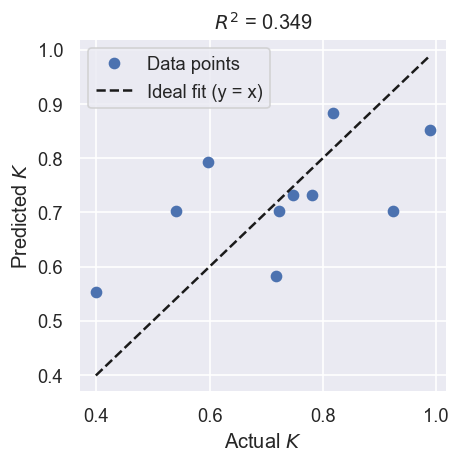

In [41]:
X = (summary_df.loc[mask])[["heavy_atom"]].values
y = (summary_df.loc[mask])[["f"]].values

print(y)
# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred = model.predict(X)

# Plot: predicted vs actual
r2 = r2_score(y, y_pred)
plt.figure(figsize=(4, 4), dpi=120)
plt.plot(y, y_pred, 'o', label="Data points")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label="Ideal fit (y = x)")
plt.xlabel("Actual $K$")
plt.ylabel("Predicted $K$")
plt.title("Prediction vs Actual")
plt.legend()
plt.tight_layout()
plt.title(f"$R^2$ = {r2:.3f}")
plt.show()

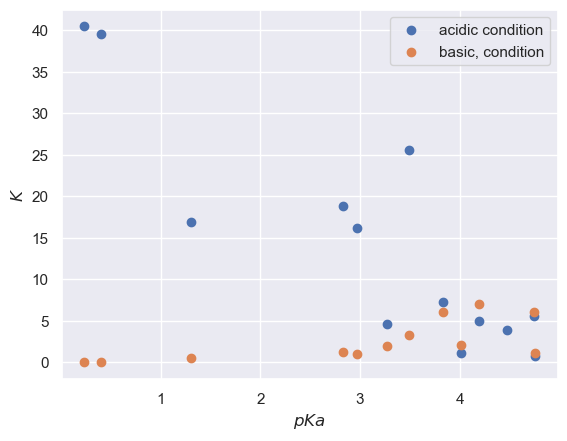

In [42]:
mask = (summary_df["Experiment"] == "acidic")

plt.scatter(summary_df.loc[mask]["pKa"], summary_df.loc[mask]["k"], label = "acidic condition")
plt.scatter(summary_df.loc[~mask]["pKa"], summary_df.loc[~mask]["k"], label = "basic, condition")
plt.xlabel("$pKa$")
plt.ylabel("$K$")
plt.legend()

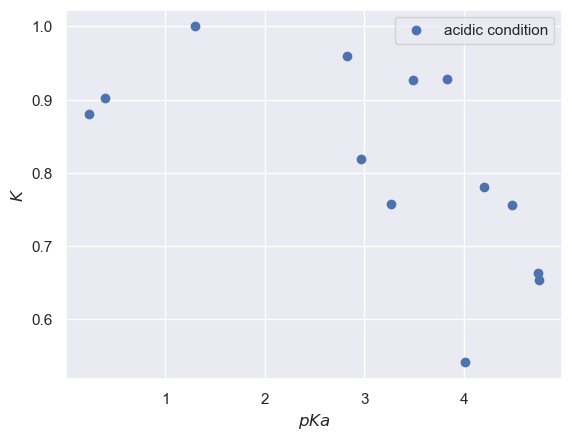

In [43]:
mask = (summary_df["Experiment"] == "acidic")
plt.scatter(summary_df.loc[mask]["pKa"], summary_df.loc[mask]["f"], label = "acidic condition")
plt.xlabel("$pKa$")
plt.ylabel("$K$")
plt.legend()
plt.show()

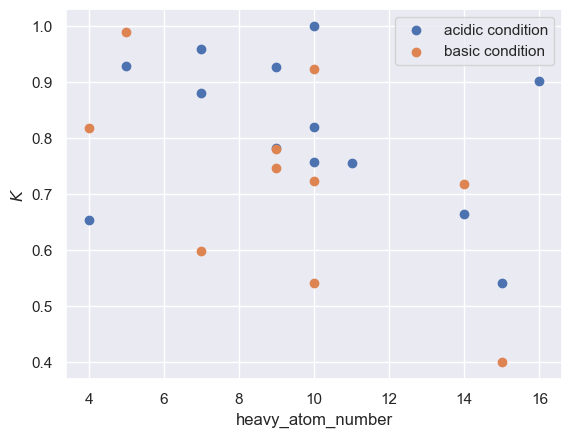

In [44]:

mask = (summary_df["Experiment"] == "acidic")
plt.scatter(summary_df.loc[mask]["heavy_atom"], summary_df.loc[mask]["f"], label = "acidic condition")
plt.xlabel("$pKa$")
plt.ylabel("$K$")
plt.legend()


mask = (summary_df["Experiment"] == "basic")
mask = mask * (summary_df["k"] >0.1) # ensure the f is sensible
plt.scatter(summary_df.loc[mask]["heavy_atom"], summary_df.loc[mask]["f"], label = "basic condition")
plt.xlabel("heavy_atom_number")
plt.ylabel("$K$")
plt.legend()

In [47]:
summary_df.to_csv("summary_df.csv")